<p style="color:#0d4366; font-size:24px">Value for money in world football</p>

## <font color="#2c86c1">Executive Summary</font>

### Background

“Moneyball”: In 2002, the Oakland Athletics built a baseball team of undervalued talent based on statistics (sabermetrics)

This project explores whether this approach be applied to soccer (world football). At the heart of the project is whether a model can be built to predict the market value of footballers. Soccer is a sport with a large amount of leagues spread around the globe, with hundreds of teams, thousands of footballers and incredibly large amounts of statistics collected.

In relation to Australia, the national league (A-League) is one of the few leagues in the world where ‘value for money’ is important due to restrictions on spending.

### Goals

The goals of the project will be to attempt to:

* Predict a footballer’s market value
* Forecast the season end change in market value
* Identify under / over valued footballers

### Success metrics

The success metrics of the project are:

* Whether a model is able to be created that can predict market values. The challenge of this element will be combining existing market value information with player performance data that are made available on different systems (whereby there is no common key to link the players).

* From the model, whether it could be possible to infer if footballers are undervalued or overvalued compared to their existing market value

* Identify the characteristics of footballers that indicate whether future improvement could be expected

### Approach

The project has been built from two core data sources:

* TransferMarkt.com: A website that tracks the market values of footballers, by season, at a club level

* Squawka.com: A website that tracks player performance metrics for each match, by season, at a club level

The following table summarises the data scraped from each of the websites and the highlighted cells represent the fields that have been combined **with the 'Market values' (1st column) data** into a consolidated data file (for the purposes of analysis and model building):

|  |<span style="background-color: yellow">Market values | Career stats (by year) | Career stats (summary) | Match stats | Player details |     
|----|----|----|----|----|----|
| **source** | TransferMarkt | TransferMarkt | TransferMarkt | Squawka | Squawka |
|**filename**|market_values.csv|career_by_year.csv|career_summary.csv|player_stats.csv|player_info.csv|
|**data shape** | 16,530 x 26 | 167,607 x 23 | 8,225 x 22 | 221,081 x 17 | 292,299 x 16 |
|||||||
|**fields ↘**|teamid|<span style="background-color: yellow">MPG (minutes per goal)|<span style="background-color: yellow">MPG (minutes per goal)|idn (player id)|age|
||number|<span style="background-color: yellow">PPM (points per match)|<span style="background-color: yellow">PPM (points per match)|<span style="background-color: yellow">attack|<span style="background-color: yellow">bmi|
||name|<span style="background-color: yellow">apps (appearances)|<span style="background-color: yellow">apps (appearances)|<span style="background-color: yellow">defense|country|
||pid (player id)|<span style="background-color: yellow">assists|<span style="background-color: yellow">assists|<span style="background-color: yellow">possession|dob|
||main_pos|<span style="background-color: yellow">clean_sheets|<span style="background-color: yellow">clean_sheets|<span style="background-color: yellow">goalkeeping|first_name|
||position|club_id|<span style="background-color: yellow">conceded_goals|<span style="background-color: yellow">score|<span style="background-color: yellow">height|
||dob|comp|<span style="background-color: yellow">goals|match_id|last_name|
||age|<span style="background-color: yellow">conceded_goals|<span style="background-color: yellow">intl_caps|start_year|name|
||nat1|<span style="background-color: yellow">goals|intl_country|season_code|position|
||nat2|league_name|intl_country_id|goals|shirt_num|
||height|<span style="background-color: yellow">minutes|<span style="background-color: yellow">intl_goals|assists|state (started on pitch)|
||foot|own_goals|<span style="background-color: yellow">minutes|team_id|surname|
||teamsince|pen_goals|own_goals|state (started on pitch)|team_id|
||prevteam|pid (player id)|pen_goals|age|team_name|
||prevteamid|pname (player name)|pid (player id)|sub|<span style="background-color: yellow">weight|
||transferfee|red|pname|result|idn (player id)|
||contractuntil|season|red|clean_sheet||
||marketval|squad|squad|||
||prevmarketval|sub_off|sub_off|||
||team|sub_on|sub_on|||
||season|yel_red|yel_red|||
||teamurl|yellow|yellow|||
||year|<span style="background-color: yellow">year||||
||current_team|||||
||current_teamid|||||
||country|||||


### Scope

Whilst a large amount of data was scraped from 9 different leagues (England, France, Spain, Italy, Germany, Turkey, Netherlands, Australia and United States) and across a number of seasons; it was decided to limit the analysis to the change in market value from 2016 to 2017. This was to limit any impact of any potential inflation in market values over a number of years.

### Methodology

#### Data scraping

Separate Jupyter Notebooks were created to scrape the data. Due to the long process involved to scrape the data listed above, data scraped was stored locally in SQLite data bases. 

Refer to the following notebooks for the code written to scrape the data:

* Model workbook.ipynb
* Scrape - Transfer Markt - Player pages & load all convert all SQL into CSV.ipynb
* Scrape - Transfer Markt.ipynb
* Scrape data from Squawka - create XML file list.ipynb
* SquawkaReport-Scrape and Load SQLite.ipynb

#### Data combining

In order to combine the datasets from the two separate sources, it was necessary to link the player ids (which are different in each dataset). Due to the large amount of players across the data sources, there are a number of players with the same name, accordingly, it is not possible to link on name alone.

Through creating a combined date of birth and name field, it was possible to match most players. However, a large amount of players' names are stored differently across the data sources. For example:

* some players have 'accents' recorded on one website and not the other (e.g. Jérôme Polenz); and
* players with different names recorded (first, second and surname vs only first name & surname)
* players with different versions of their names (e.g. Nick Fitzgerald vs Nicholas Fitzgerald)
* minor differences in date of birth

In order to manage this matching process, a 'Sequence Matcher' library was used which searched through the data sources to find the closest matches for the players which could not be matched.

Jupyter notebook containing this process:

* Create master database for analysis (match player and team IDs).ipynb

The above process was used to match team names which were also recorded differently across the data sources (e.g. Seattle Sounders FC vs Sounders)

#### Output

After linking fields were created for both the team and player IDs, a master CSV file was created with the fields considered necessary to the scope of this project.

Jupyter notebook containing this process:

* Create master database (combine information).ipynb

### Findings

Some of the **key financial objectives** of player management at a football club relate to:
   1. Value for money (i.e. identifying players that are likely to increase in value, ensuring the club is not over-paying for a footballer relative to their ability, identifying players that may be undervalued relative to their performance)<br><br>
   2. Maximising income for player sales (i.e. ensuring the club is being **fairly** compensated for any player sale)<br><br>
   3. Consider any future expected increase of player market values when negotiating with existing players to extend contracts (i.e. if the club has intentions of making money from the sale of the player in the future, consider factors which indicate whether a player's market value is more likely to increase rather than decrease)

### <font color = "#f48342">1. Value for money</font>

![title](market value prediction 2.png)

a. The market value prediction model is able to predict the market value of players with an accuracy of **70%**.  Accordingly, players which have a predicted value above the published market value _may_ indicate that they are currently under-valued & represent a good opportunity to acquire a player that is 'good value for money'.

b. The market value database on TransferMarkt.com is largely based on actual market values that are updated when a player moves to a new club or during an end of season update.  Accordingly, the prediction model presents an opprotunity to obtain an updated player value ahead of time. This can assist with clubs making timely, better informed, competitive offers for players.

c. In conjuction with the model, an interactive dashboard has been developed that identifies potentially under / over valued players and their associated recent performance. To be delivered separately (i.e. outside of this notebook - _currently in development_)

### <font color = "#f48342">2. Maximising income for player sales</font>

Using the market value prediction model, a club is able to obtain an updated player market value to better inform the club during any player sale negotiation.

The most significant features when determining a players' market value:

![title](features.png)

### <font color = "#f48342">3. Consider potential future movement in existing player market values</font>

Players can be considered a valuable asset for football clubs, whereby they can be acquired and developed relatively cheaply and then sold to another club for a profit. It has been identified that after players reach the age of 28, their market value is more likely to commence decreasing, as identified in this following graph.

![title](mv_change_by_age.png)

A chi-squared test was used to determine whether there is a significant difference between whether players' market values increase pre-28 years old and decrease post-28 years old.

![title](bargraph.png)

The **null hypothesis** was defined as "player market values generally increase after the age of 28".

Results of the chi-squared test: 

**Chi = 313.772434259, p = 3.29185755203e-70**

Since the p-value from the Chi test is less than 0.05, I am able to reject the Null Hypothesis and we can reject the notion that "player market values increase after the age of 28".

### Risks and limitations

The main risk of the models developed is that the scope only covers one year of market value changes. Accordingly, it is possible that the findings are largely based on an isolated set of observations, despite the large sample of players selected.

Another limitation of the model is that it only covers 9 football leagues. Accordingly, the model may not be applicable across leagues not caputred as part of this model.  An example of the difference in the performance of the model is highlighted through the following example league graphs, whereby predicting player values for players in the Spanish league is more accurate than the American league.

Performance of the market value prediction model for players in La-Liga league (Spain):

![title](spain-2.png)

Performance of the market value prediction model for players in MLS league (USA):

![title](usa-2.png)

## <font color="#2c86c1"> Model workbook </font>

### Summary of model workbook

#### Variables of interest

As documented in the following section, the following types of features have been identified as potentially necessary to creating a model that predicts market values:

* Player characteristics: Age, league location, position on field

* Player performance metrics:
    - Career statistics: matches played, goals scored, assists provided, number of times the player has played for their country ('international appearances), international goals scored
    - Season statistics - statistics relating to the 2016 season (i.e. the season completed between the market value amounts): minutes played, matches played, match points won by their team, goals scored, player performance ratings (attack, defense, possession, overall)
    
#### Outliers removed

Per the EDA performed below, it was noted that goalkeepers were providing noise across the dataset (varying performance across age ranges) and accordingly they were removed.

#### Data imputation

As noted below, where there are missing values for player statistics (e.g. international games, international goals), it is assumed that the value is 0 (e.g. the player has not played any international games or scored goals).

However, where there are missing values for player characteristics such as height or weight, the average value across all players has been imputed.

In [1]:
# Load necessary python libraries

import pandas as pd
import numpy as np
import datetime

from sklearn import metrics, preprocessing
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, RandomForestClassifier
from sklearn.externals import joblib 
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_predict, cross_val_score, train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.preprocessing import MinMaxScaler

import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
# Load data

master_data = pd.read_csv("master_table.csv", encoding='utf-8')

In [3]:
master_data.head()

teamid  number             name      pid  main_pos     position  \
0  8054.0     1.0  Andrew Redmayne  51975.0    keeper       Keeper   
1  8054.0     5.0      Jordy Buijs  31111.0  defender  Centre-Back   
2  8054.0     4.0   Alex Wilkinson  43128.0  defender  Centre-Back   
3  8054.0    22.0  Sebastian Ryall  58120.0  defender  Centre-Back   
4  8054.0     7.0    Michael Zullo  55444.0  defender    Left-Back   

          dob   age         nat1   nat2  ...   intl_goals minutes_career  \
0  1989-01-13  28.0    Australia    NaN  ...          0.0         7298.0   
1  1988-12-28  28.0  Netherlands    NaN  ...          3.0        22132.0   
2  1984-08-13  33.0    Australia    NaN  ...          0.0        21819.0   
3  1989-07-18  28.0    Australia    NaN  ...          1.0        12415.0   
4  1988-11-09  28.0    Australia  Italy  ...          0.0         9834.0   

  attack_2016 defense_2016  poss_2016  gk_2016 score_2016  height_s  weight  \
0    0.000000    -9.395556   3.576667      0.0  -5.818889     194.0    84.0   
1    5.535556    17.768889   4.896667      0.0  28.201111     182.0    80.0   
2    2.198077    24.034615   3.050385      0.0  29.283077     187.0    85.0   
3    0.242222     9.186667   1.485556      0.0  10.914444     180.0    75.0   
4    4.073600    23.546400  -9.105600      0.0  18.514400     170.0    63.0   

    bmi  
0  22.3  
1  24.2  
2  24.3  
3  23.1  
4  21.8  

[5 rows x 64 columns]

## Clean data

In [4]:
# Convert date fields to datetime

date_fields = ['dob','teamsince','contractuntil']

for col in date_fields:
    master_data[col] = pd.to_datetime(master_data[col], format="%Y-%m-%d")

In [5]:
master_data.columns

Index([u'teamid', u'number', u'name', u'pid', u'main_pos', u'position', u'dob',
       u'age', u'nat1', u'nat2', u'height', u'foot', u'teamsince', u'prevteam',
       u'prevteamid', u'transferfee', u'contractuntil', u'marketval',
       u'prevmarketval', u'team', u'season', u'teamurl', u'year',
       u'current_team', u'current_teamid', u'country', u'marketval_2016',
       u'country_2016', u'name_dob', u'check', u'squawka_name_dob', u'idn',
       u'mins_2016', u'points_2016', u'apps_2016', u'assists_2016',
       u'goals_2016', u'conceded_2016', u'clean_sheets_2016', u'MPM_2016',
       u'PPM_2016', u'GPM_2016', u'CS_R', u'GAPM', u'league_name',
       u'ucl_2016_apps', u'MPG_career', u'PPM_career', u'apps_career',
       u'assists_career', u'clean_sheets_career', u'conceded_goals_career',
       u'goals_career', u'intl_caps', u'intl_goals', u'minutes_career',
       u'attack_2016', u'defense_2016', u'poss_2016', u'gk_2016',
       u'score_2016', u'height_s', u'weight', u'bmi'],
    

In [6]:
# Select columns to be used in model 

df = master_data[['pid','main_pos','position','age','foot','teamsince','transferfee','marketval','prevmarketval',
                   'year','country','marketval_2016','country_2016','mins_2016','points_2016','apps_2016',
                    'assists_2016','goals_2016','conceded_2016','clean_sheets_2016','MPM_2016','PPM_2016',
                   'GPM_2016','CS_R','GAPM','league_name','ucl_2016_apps','MPG_career','PPM_career',
                    'apps_career','assists_career','clean_sheets_career','conceded_goals_career',
                    'goals_career','intl_caps','intl_goals','minutes_career','attack_2016','defense_2016',
                    'poss_2016','gk_2016','score_2016','height_s','weight','bmi']].copy()

In [7]:
df.shape

(3138, 45)

In [8]:
# Review range of values for each feature (excluding specific columns with high 'uniqueness')

non_unique_cols = [x for x in df.columns if x not in ['pid']]

for col in non_unique_cols:
    if df[col].dtype == 'O':
        print(col)
        print(df[col].value_counts())
        print('Null values: {}'.format(df[col].isnull().sum()))
        #print('0 values: {}'.format(df[df[col] == 0].shape[0]))
        print('=====')

main_pos
defender      1053
midfielder     898
attacker       819
keeper         368
Name: main_pos, dtype: int64
Null values: 0
=====
position
Centre-Back           547
Central Midfield      389
Centre-Forward        376
Keeper                368
Right-Back            270
Defensive Midfield    246
Left-Back             236
Left Wing             208
Right Wing            202
Attacking Midfield    184
Left Midfield          47
Secondary Striker      33
Right Midfield         32
Name: position, dtype: int64
Null values: 0
=====
foot
right    2069
left      718
both      176
Name: foot, dtype: int64
Null values: 175
=====
country
Italy            450
England          393
Germany          378
Spain            368
Turkey           355
France           333
United States    299
Netherlands      294
Australia        145
Canada            58
Wales             25
Monaco            22
New Zealand       18
Name: country, dtype: int64
Null values: 0
=====
country_2016
Italy            462
England  

### Preliminary EDA

#### <font color="#309eb2">Distribution of age of players</font>

In [9]:
df

pid    main_pos            position   age   foot  teamsince  \
0      51975.0      keeper              Keeper  28.0    NaN 2017-01-02   
1      31111.0    defender         Centre-Back  28.0  right 2017-01-13   
2      43128.0    defender         Centre-Back  33.0  right 2016-07-01   
3      58120.0    defender         Centre-Back  28.0  right 2009-07-01   
4      55444.0    defender           Left-Back  28.0   left 2016-07-01   
5     108108.0    defender          Right-Back  26.0  right 2009-01-01   
6     255162.0    defender          Right-Back  21.0  right 2014-07-01   
7     257685.0  midfielder  Defensive Midfield  24.0  right 2017-07-01   
8     171307.0  midfielder    Central Midfield  24.0  right 2016-07-12   
9     218371.0  midfielder    Central Midfield  23.0    NaN 2015-07-01   
10     48740.0  midfielder  Attacking Midfield  32.0  right 2015-07-16   
11     18626.0  midfielder  Attacking Midfield  33.0   left 2014-07-01   
12     10387.0    attacker           Left Wing  33.0   both 2016-02-02   
13     37944.0    attacker      Centre-Forward  32.0  right 2016-08-22   
14     43372.0    attacker      Centre-Forward  31.0  right 2015-08-03   
15     47194.0      keeper              Keeper  30.0    NaN 2016-12-20   
16    215521.0      keeper              Keeper  22.0    NaN 2017-07-01   
17    123129.0      keeper              Keeper  27.0    NaN 2016-07-01   
18     43089.0    defender         Centre-Back  31.0  right 2016-07-14   
19    363689.0    defender         Centre-Back  21.0    NaN 2015-07-01   
20    147600.0    defender         Centre-Back  24.0  right 2014-07-01   
21    256915.0    defender           Left-Back  25.0   left 2016-08-12   
22    174350.0    defender           Left-Back  25.0   both 2015-01-13   
23    160614.0    defender          Right-Back  25.0  right 2017-07-01   
24    181924.0  midfielder  Defensive Midfield  22.0  right 2016-08-12   
25    124885.0  midfielder    Central Midfield  25.0  right 2017-07-01   
26    127910.0  midfielder    Central Midfield  26.0  right 2016-07-01   
27    171419.0  midfielder    Central Midfield  26.0  right 2014-11-06   
28     21202.0    attacker           Left Wing  35.0   left 2013-08-01   
29     72779.0    attacker          Right Wing  33.0  right 2017-07-24   
...        ...         ...                 ...   ...    ...        ...   
3108  156676.0      keeper              Keeper  25.0  right 2011-07-01   
3109   85789.0    defender         Centre-Back  25.0   left 2016-08-31   
3110  106405.0    defender         Centre-Back  26.0  right 2016-01-09   
3111  196231.0    defender         Centre-Back  21.0  right 2016-07-01   
3112    3851.0    defender         Centre-Back  32.0  right 2011-01-01   
3113   14977.0    defender         Centre-Back  32.0  right 2015-01-30   
3114  111277.0    defender         Centre-Back  24.0  right 2014-07-01   
3115  148967.0    defender           Left-Back  23.0   left 2015-08-20   
3116  111275.0    defender           Left-Back  23.0   left 2015-08-04   
3117   65781.0    defender          Right-Back  26.0  right 2015-08-13   
3118   81698.0    defender          Right-Back  26.0  right 2016-07-01   
3119  146163.0    defender          Right-Back  22.0  right 2013-07-01   
3120    4018.0  midfielder  Defensive Midfield  33.0  right 2010-01-31   
3121   28683.0  midfielder  Defensive Midfield  30.0  right 2016-07-19   
3122  124410.0  midfielder  Defensive Midfield  23.0  right 2017-07-01   
3123   82243.0  midfielder    Central Midfield  24.0  right 2017-01-31   
3124   63022.0  midfielder    Central Midfield  27.0  right 2012-07-01   
3125   91841.0  midfielder  Attacking Midfield  28.0  right 2015-08-31   
3126   54137.0    attacker           Left Wing  29.0  right 2014-07-11   
3127  156779.0    attacker           Left Wing  23.0  right 2014-01-29   
3128   70285.0    attacker          Right Wing  27.0  right 2016-08-26   
3129   32207.0    attacker          Right Wing  31.0  right 2017-07-01   
3130   90024.0 

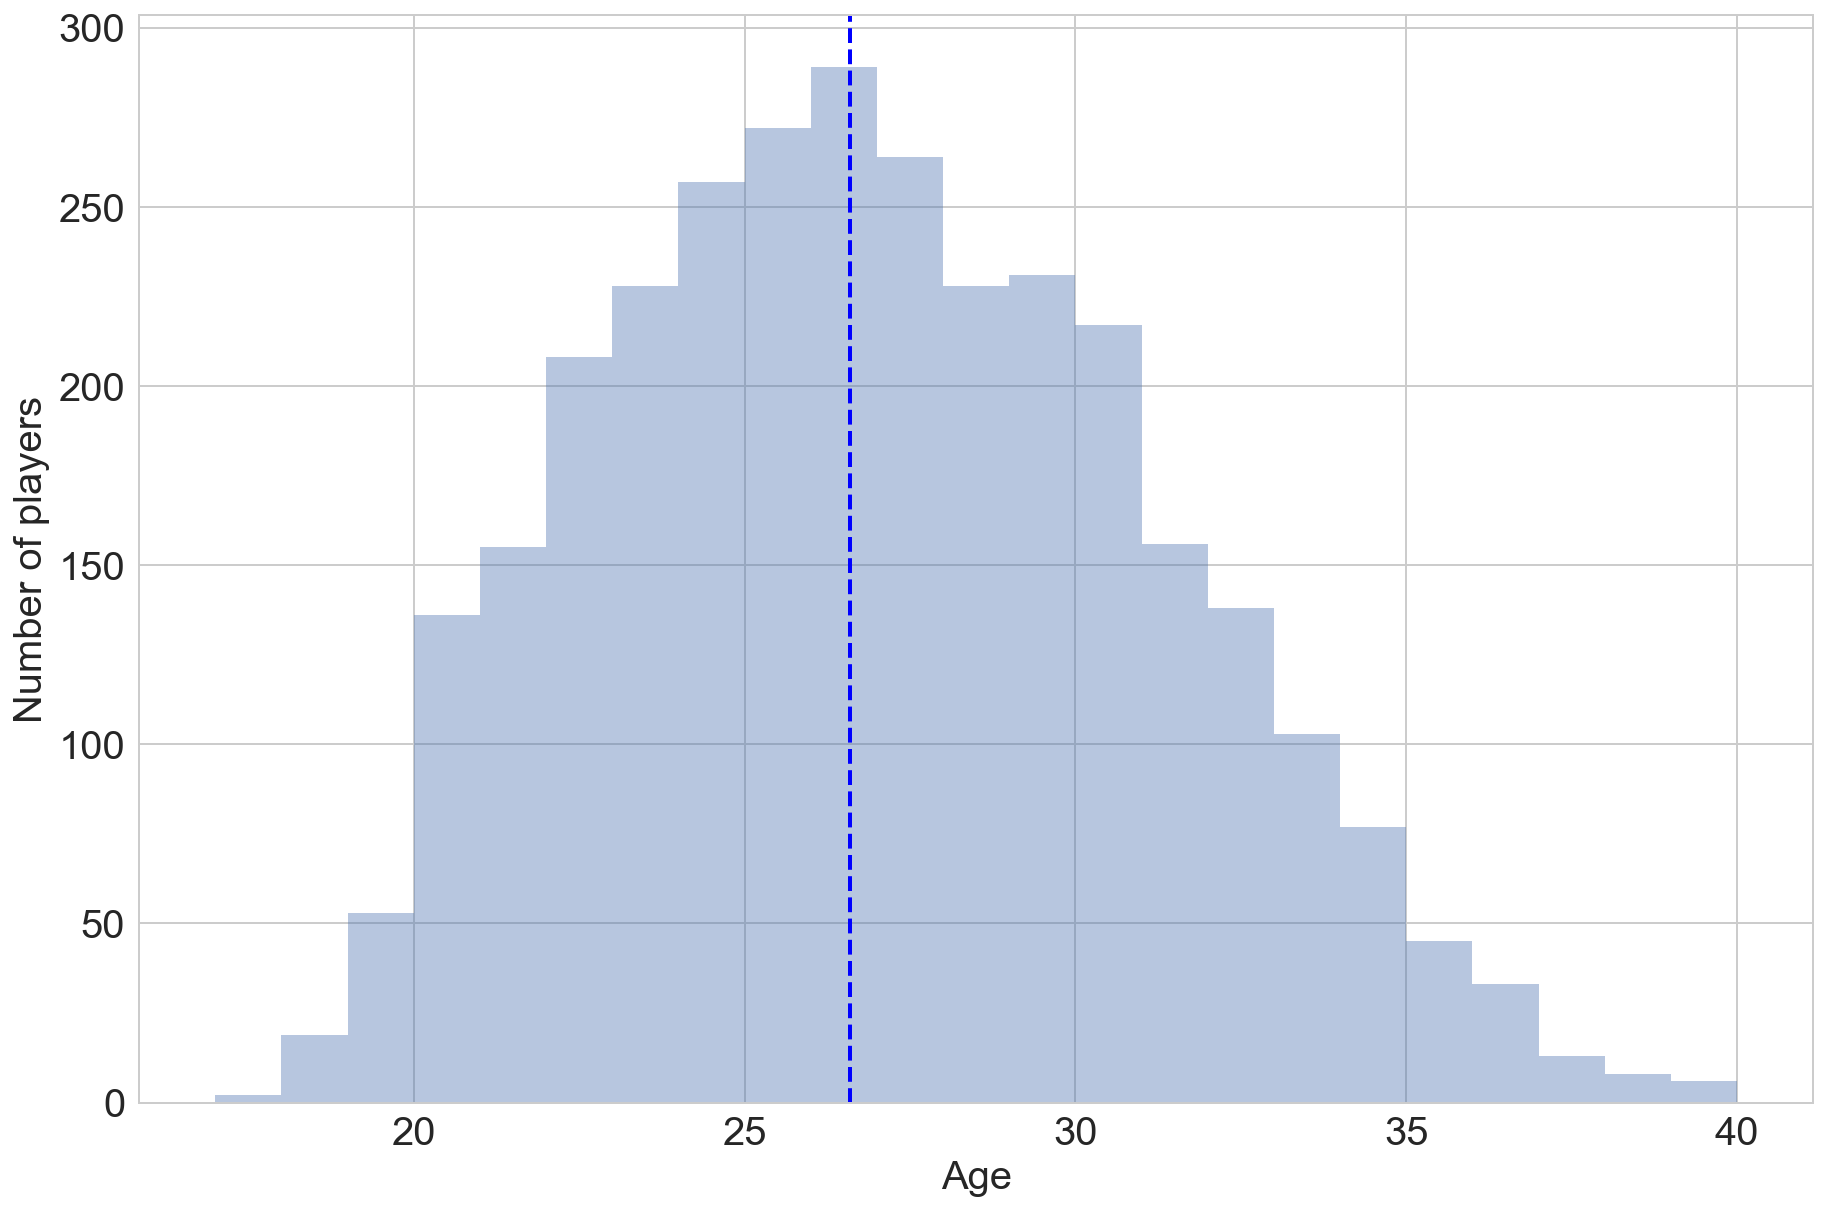

In [10]:
# Mean age

age_mean = df['age'].mean()

# Histogram of ages
plt.figure(figsize=(15,10))
ax = sns.distplot(df['age'], kde=False, bins = 23)
plt.ticklabel_format(style='plain', axis='x')
plt.axvline(age_mean, color='b', linestyle='dashed', linewidth=2)
ax.tick_params(labelsize=20)
ax.set_ylabel('Number of players', fontsize = 20)
ax.set_xlabel('Age', fontsize = 20)
plt.show()

In [11]:
# Drop rows where no player score is available

df = df.drop(df[df['score_2016'].isnull()].index)

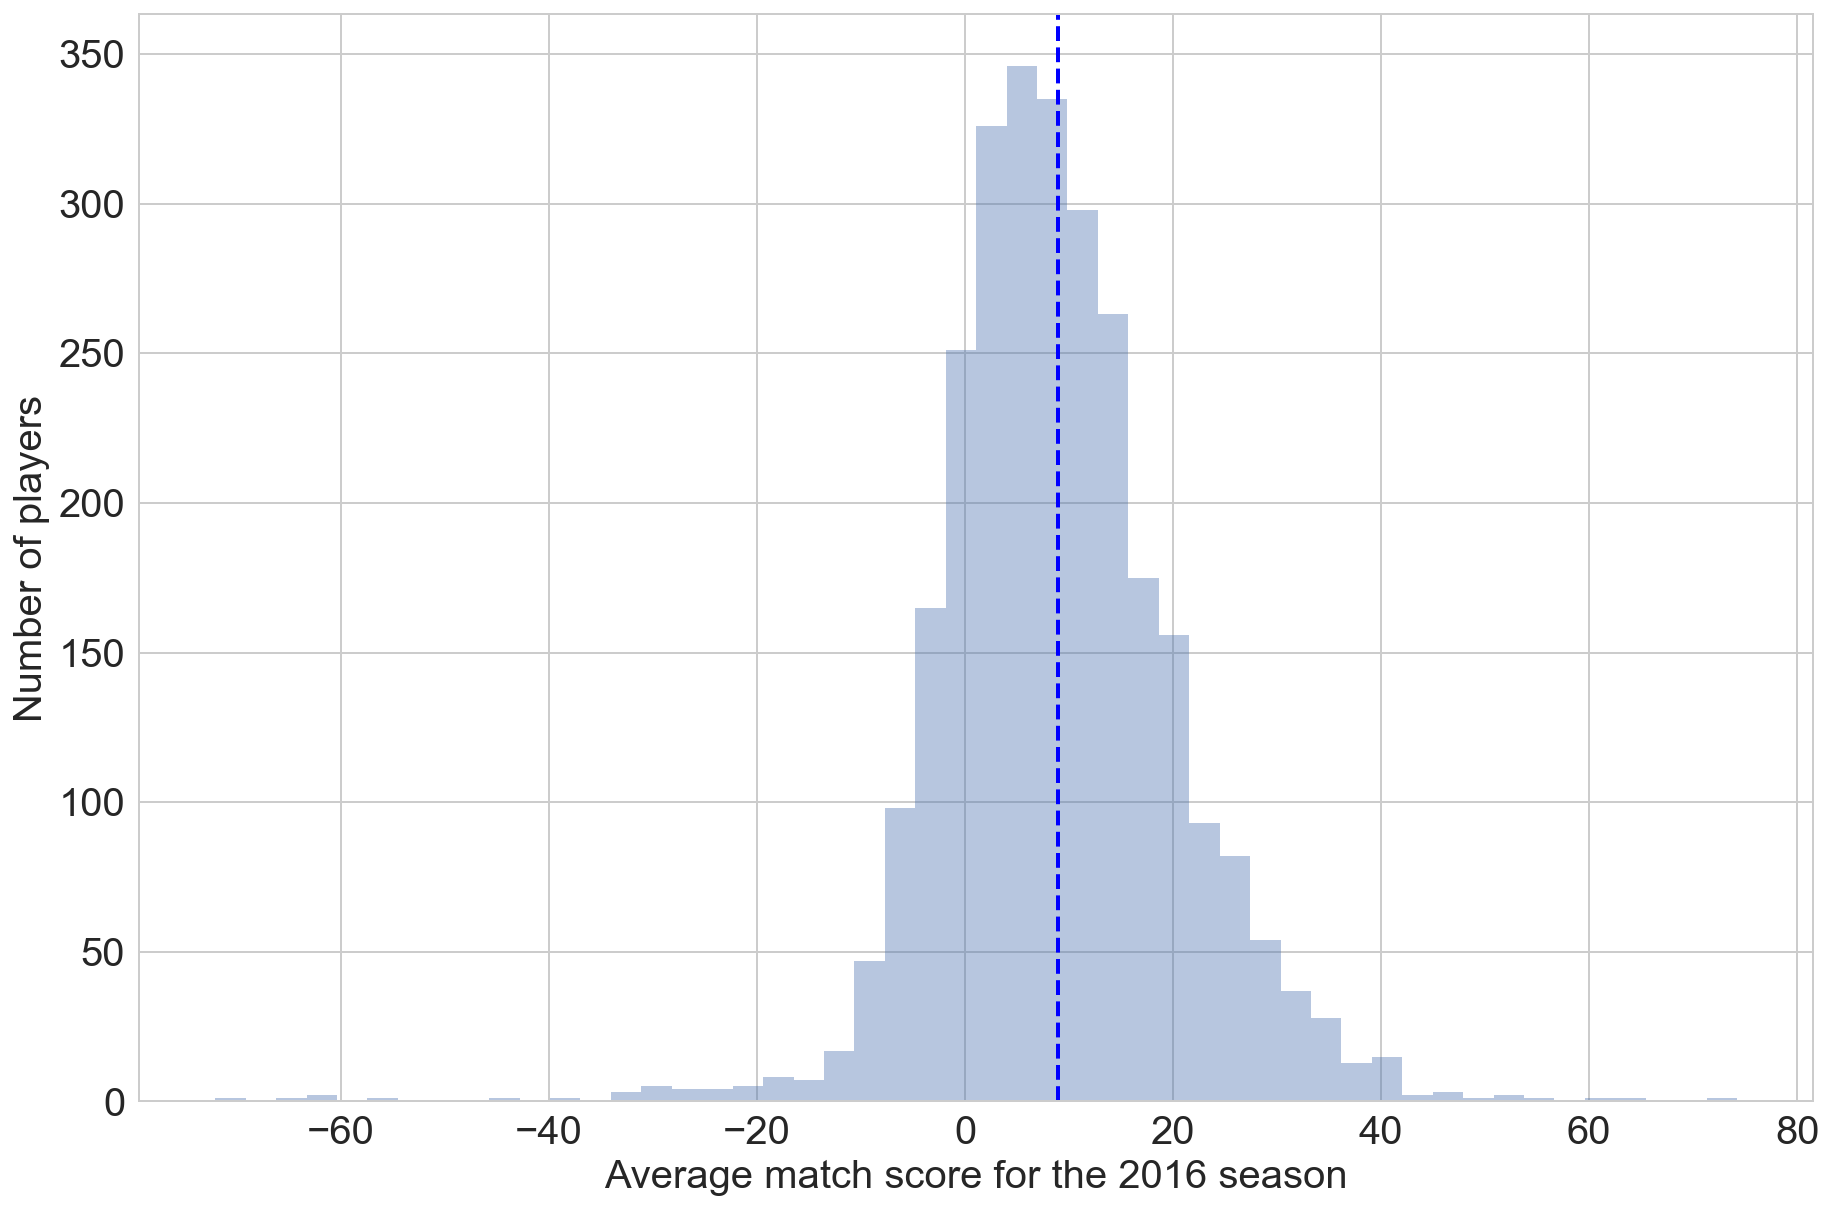

In [12]:
# Score mean

score_mean = df['score_2016'].mean()

# Histogram of all scores
plt.figure(figsize=(15,10))
#histobins = [5000000,10000000,20000000,30000000,40000000,50000000,100000000,120000000]
ax = sns.distplot(df['score_2016'], kde=False)
ax.tick_params(labelsize=20)
ax.set_ylabel('Number of players', fontsize = 20)
ax.set_xlabel('Average match score for the 2016 season', fontsize = 20)
plt.axvline(score_mean, color='b', linestyle='dashed', linewidth=2)
plt.show()

#### <font color="#309eb2">Distribution of number of matches played in 2016</font>

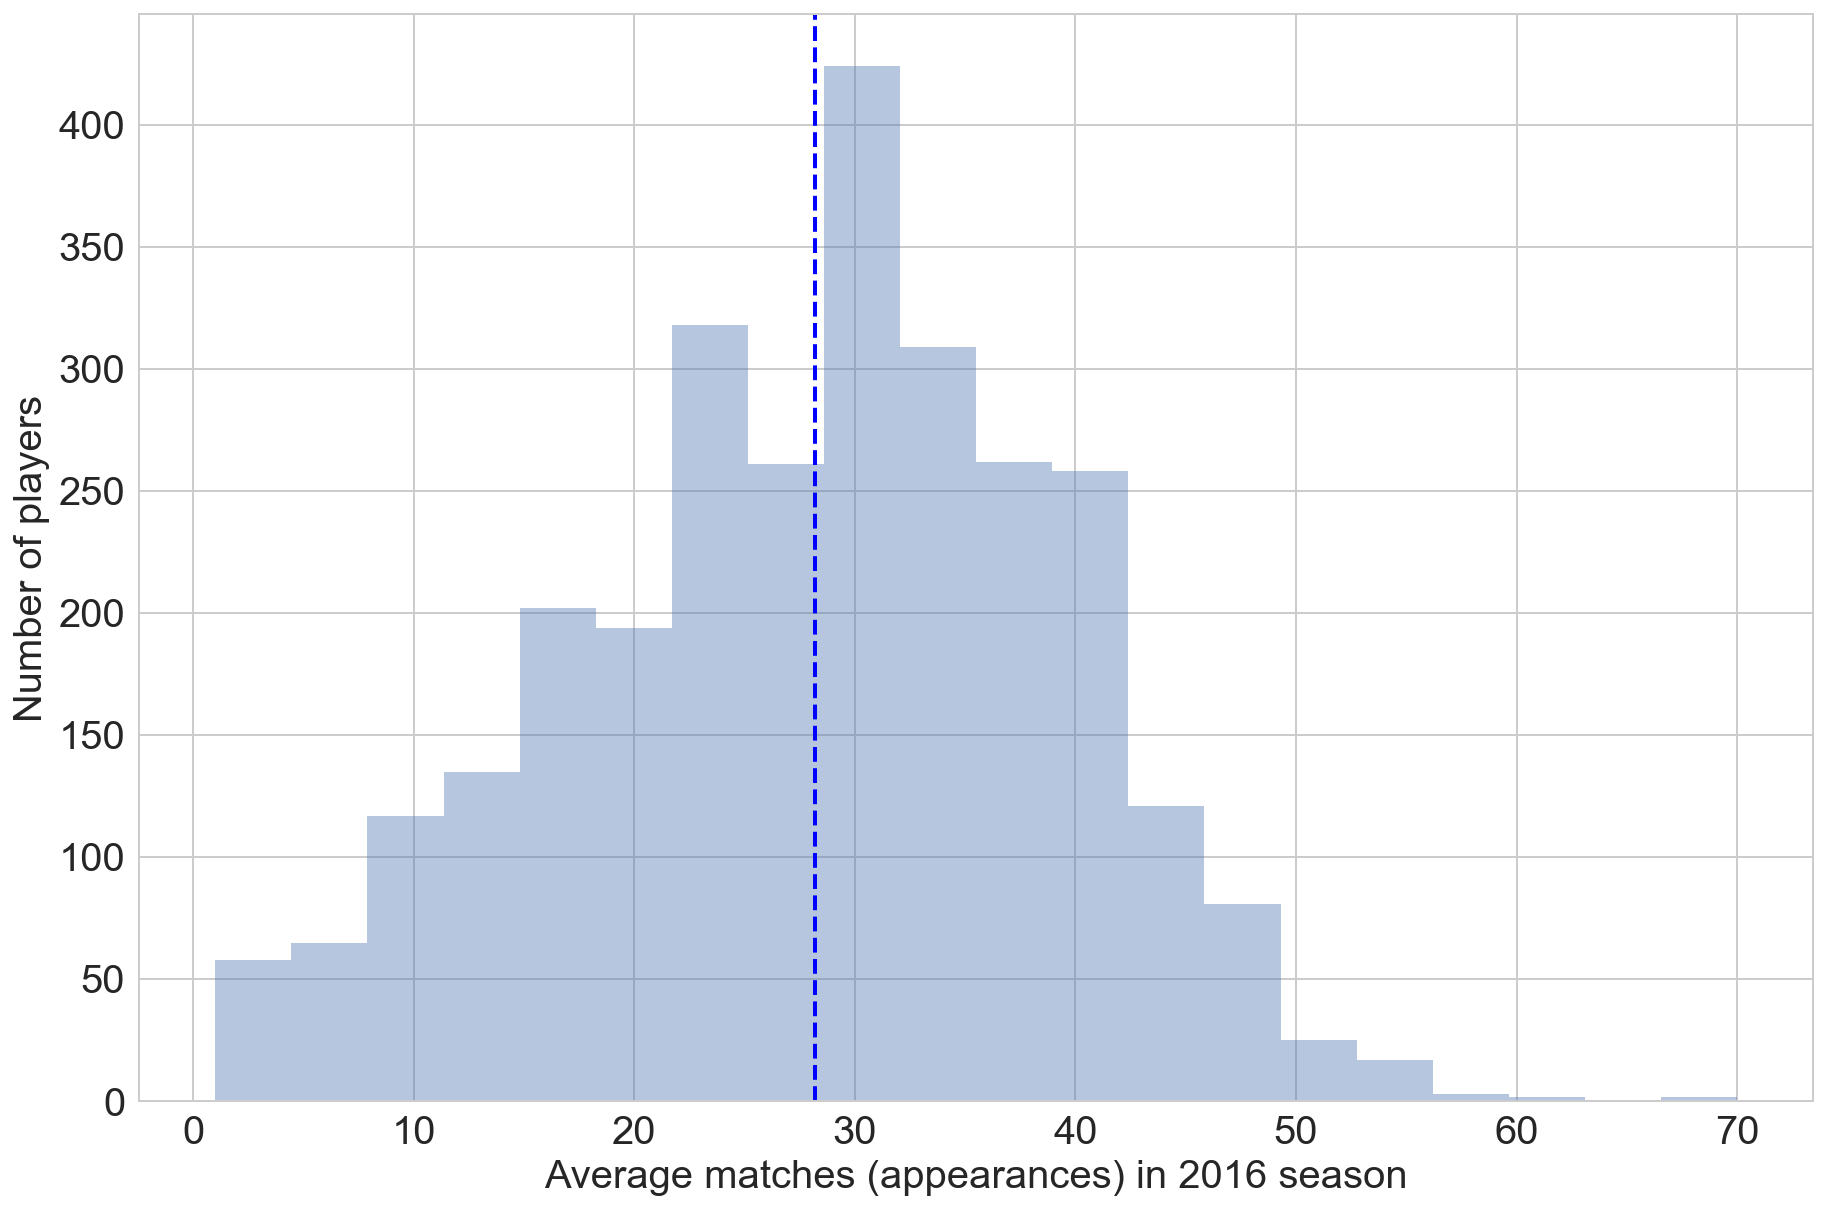

In [13]:
match_mean = df['apps_2016'].mean()

# Histogram of total matches
plt.figure(figsize=(15,10))
ax = sns.distplot(df['apps_2016'], kde=False, bins = 20)
ax.tick_params(labelsize=20)
ax.set_ylabel('Number of players', fontsize = 20)
ax.set_xlabel('Average matches (appearances) in 2016 season', fontsize = 20)
plt.axvline(match_mean, color='b', linestyle='dashed', linewidth=2)
plt.show()

#### <font color="#309eb2">Scatter plot of average player scores in 2016,  by age and by position</font>

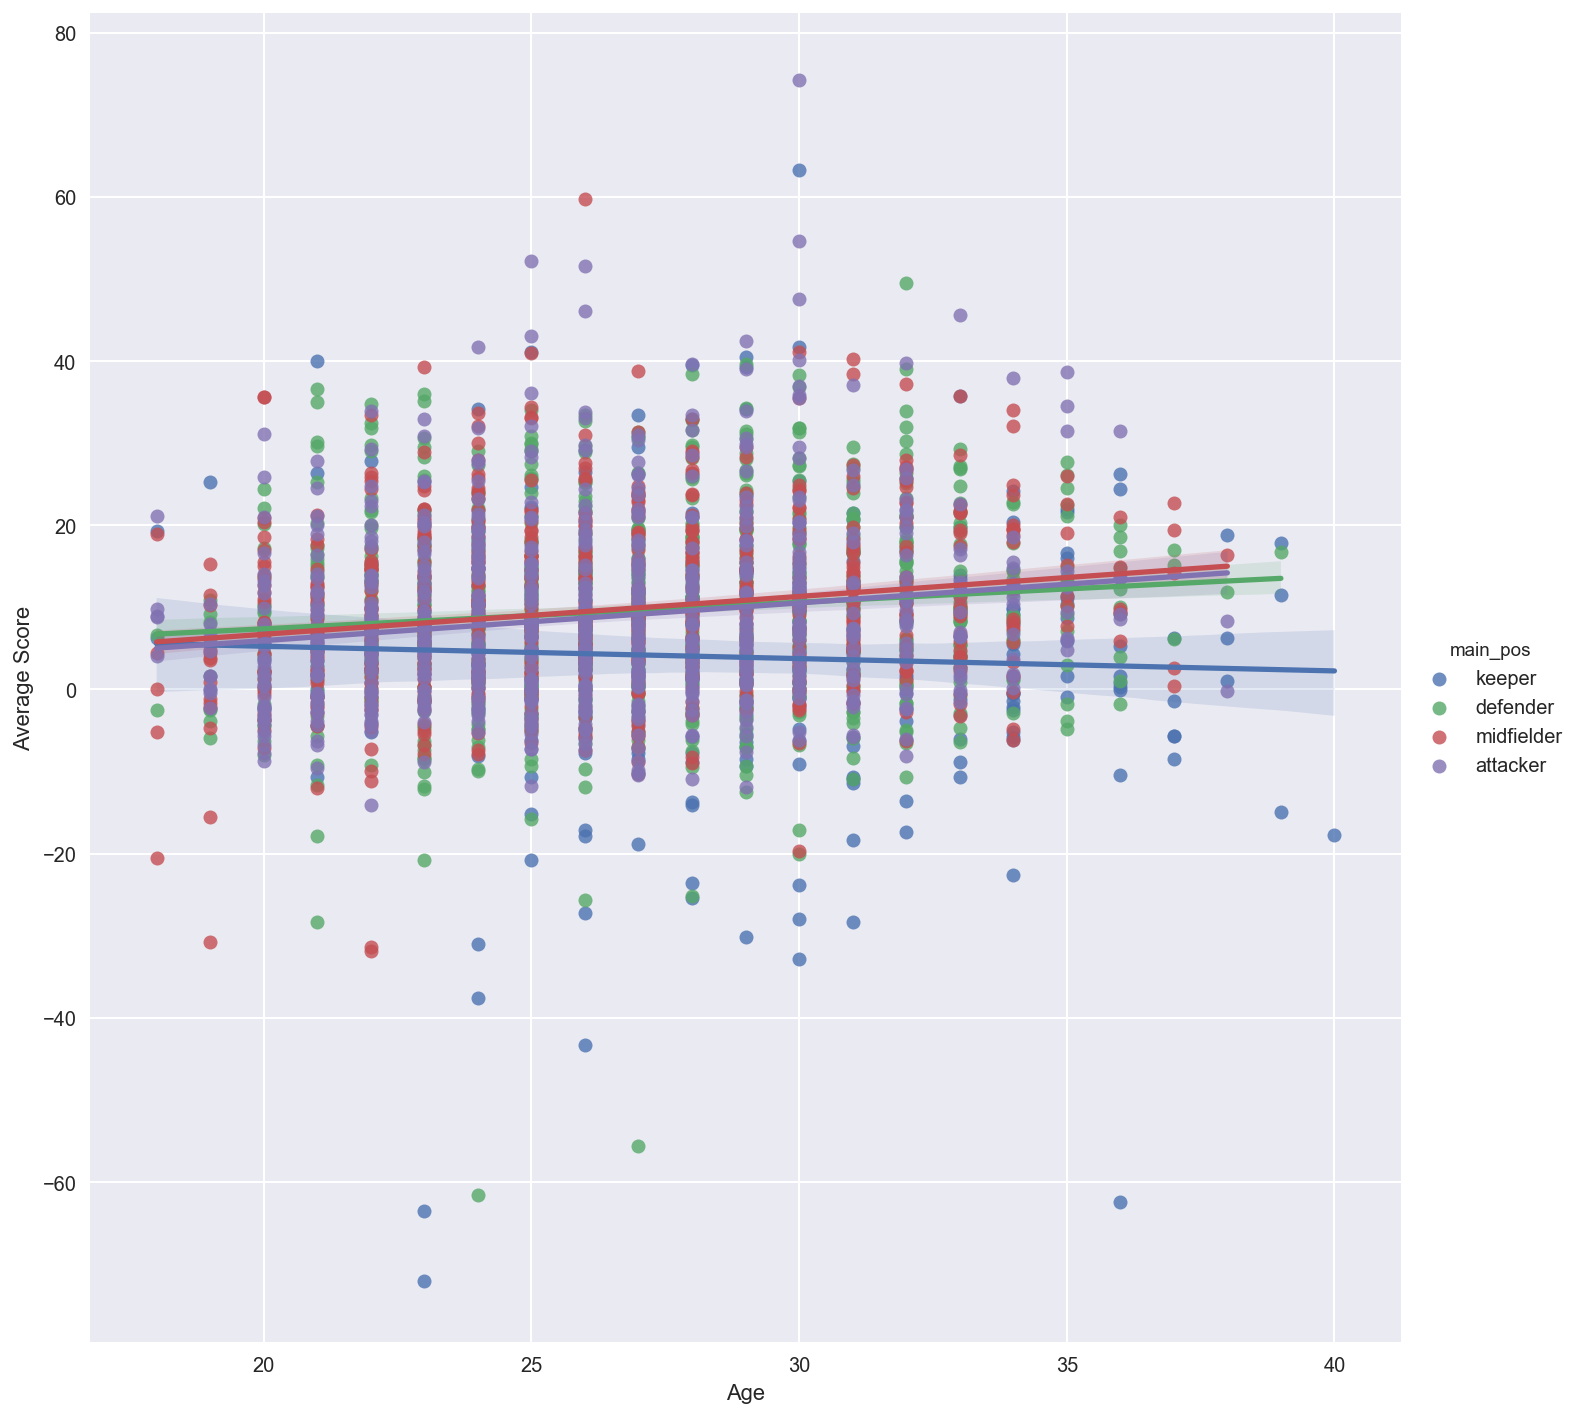

In [14]:
# Plot average score vs age
sns.set()
# Plot tip as a function of toal bill across days
g = sns.lmplot(x="age", y="score_2016", hue="main_pos",
               truncate=True, size=10, data=df)

# Use more informative axis labels than are provided by default
g.set_axis_labels("Age", "Average Score")

#### <font color="#309eb2">Distribution of player ages by position</font>

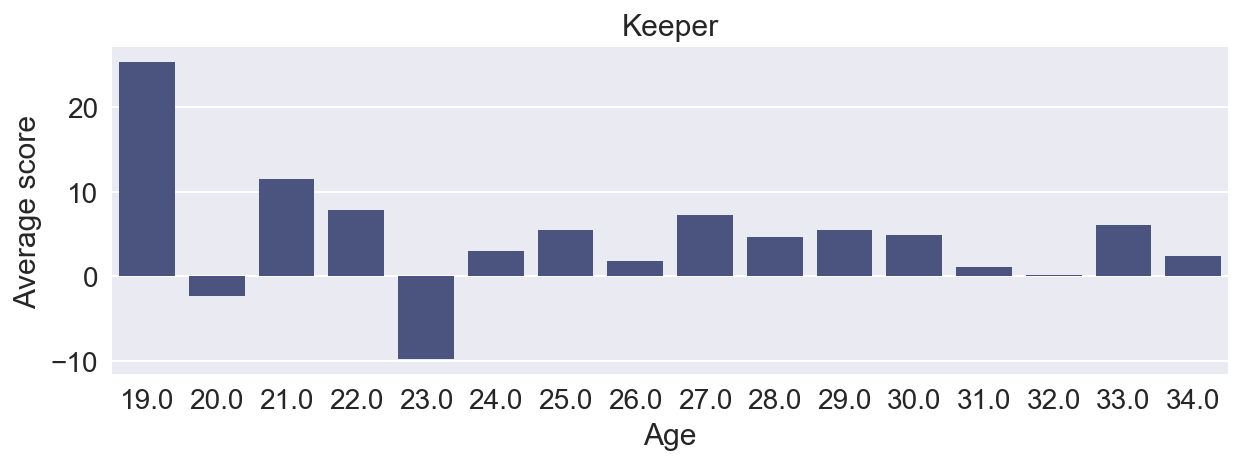

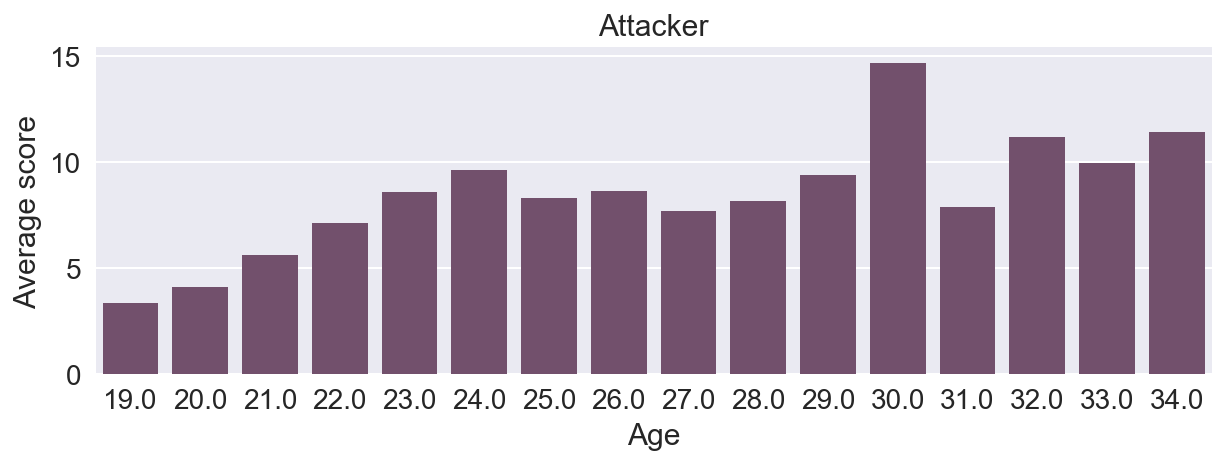

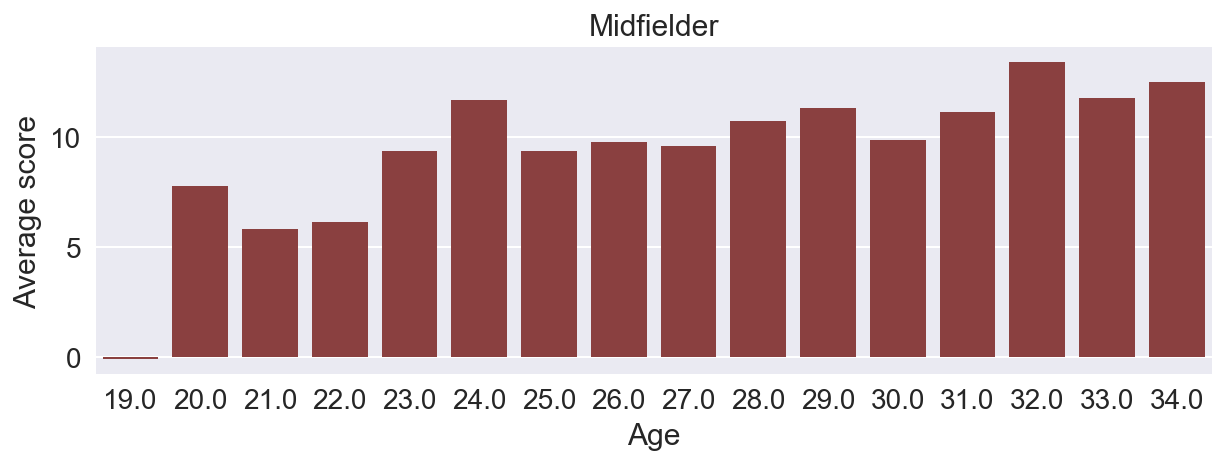

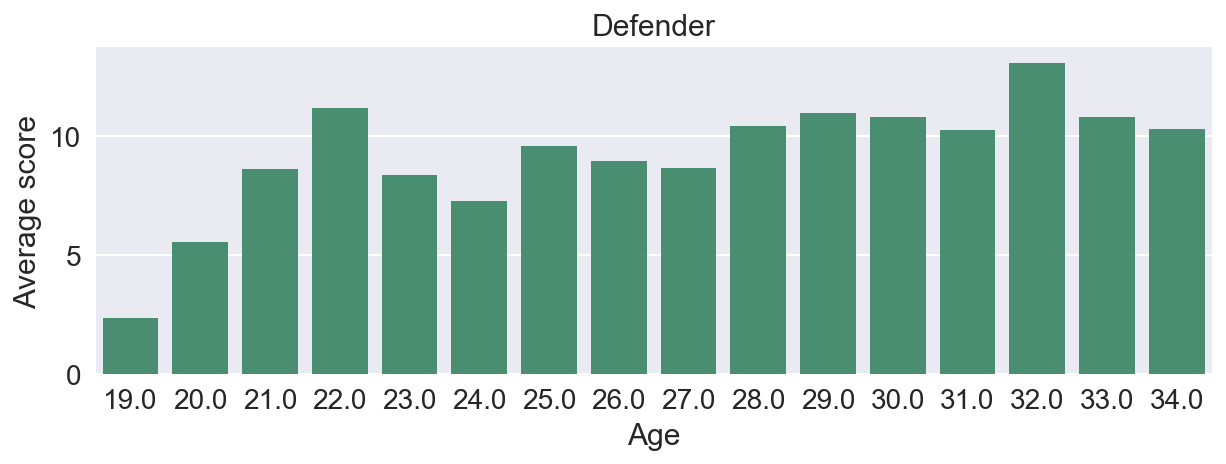

In [15]:
sns.set()

color_position_dict = {'keeper':'#424e87','attacker':'#774b70',
                       'defender': '#3d9973','midfielder': '#963434'}

for key, value in color_position_dict.iteritems():

    plt.figure(figsize=(10,3))
    ax = sns.barplot(x="age", y="score_2016", color=value, data=df[(df['main_pos'] == key) & 
                                                                      (df['age'] < 35 ) & (df['age'] > 18 )]
                     , ci=None, alpha = 1)
    ax.tick_params(labelsize=14)
    ax.set_ylabel('Average score', fontsize = 15)
    ax.set_xlabel('Age', fontsize = 15)
    ax.set_title(key.title(), fontsize = 15)

The above charts indicate that goal keeper scores are quite volatile over age groups. Accordingly, goalkeepers will be removed from the dataset since it may provide noise and hinder the efficacy of the model.

### Update country values

#### <font color="#309eb2">Distribution player market values at start of 2017/18 season, by country (league)</font>

In [16]:
# Code to update the country of clubs which compete in another country's league (e.g. Wellington Phoenix in
# New Zealand play in the Australian league, Monaco in the French league etc.)

def update_country(value):
    country_dict = {'New Zealand': 'Australia', 'Monaco': 'France', 'Wales': 'England', 'Canada': 'United States'}
    if value in country_dict.keys():
        country = country_dict[value]
    else:
        country = value
    return country

for col in ['country_2016','country']:
    df[col] = df[col].apply(update_country)

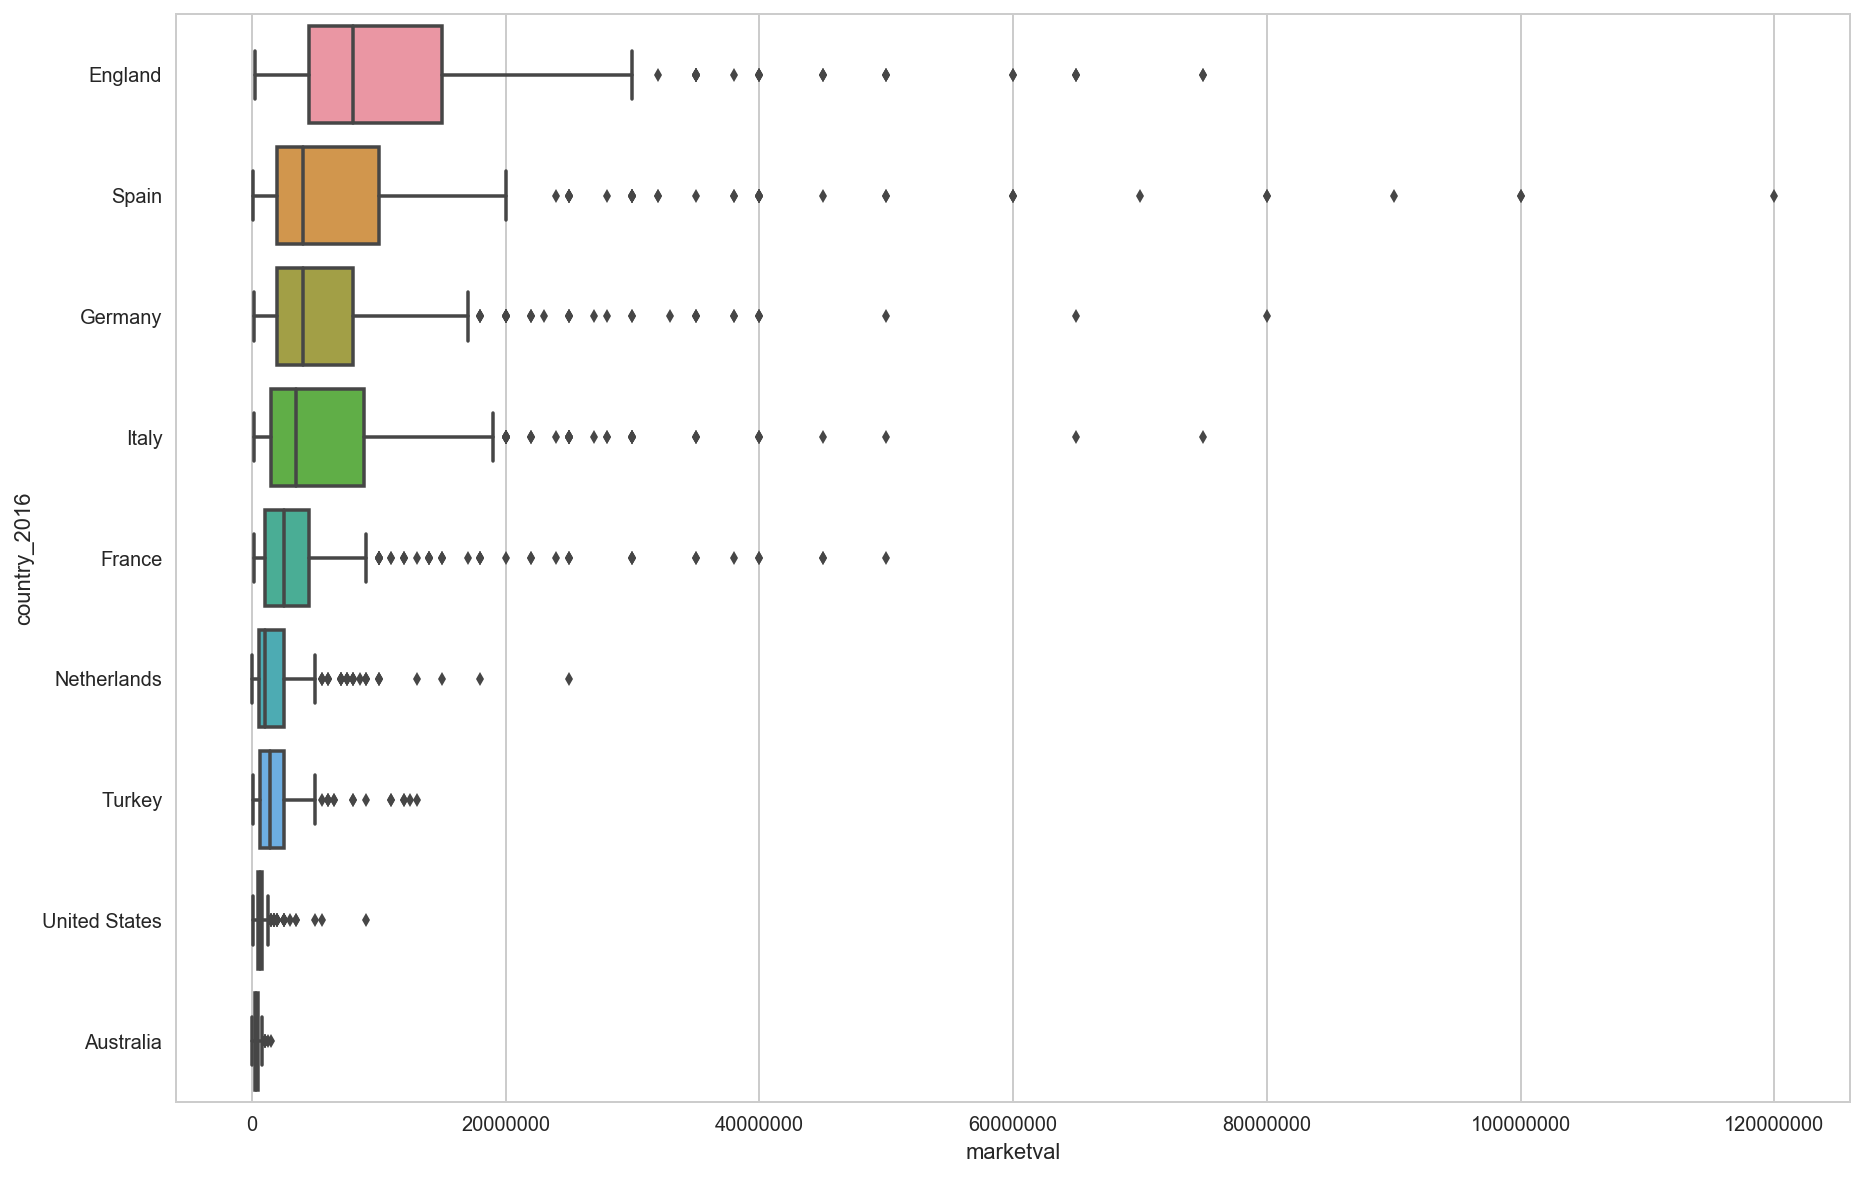

In [17]:
# Boxplot to explore market value differences between countries
xy = df.groupby(['country_2016']).marketval.mean()
xy_df = pd.DataFrame(xy)
xy_df = xy_df.sort_values(by = 'marketval', ascending= False)
sns.set_style('whitegrid')
plt.figure(figsize=(15,10))
plt.ticklabel_format(style='plain', axis='x')
ax = sns.boxplot(y='country_2016', x="marketval", data=df, order=xy_df.index)

This box plot validates that the big five league (England, Spain, Germany, Italy and France) have the highest valued players.

#### <font color="#309eb2">Distribution of player market values at start of 2017/18 season by position</font>

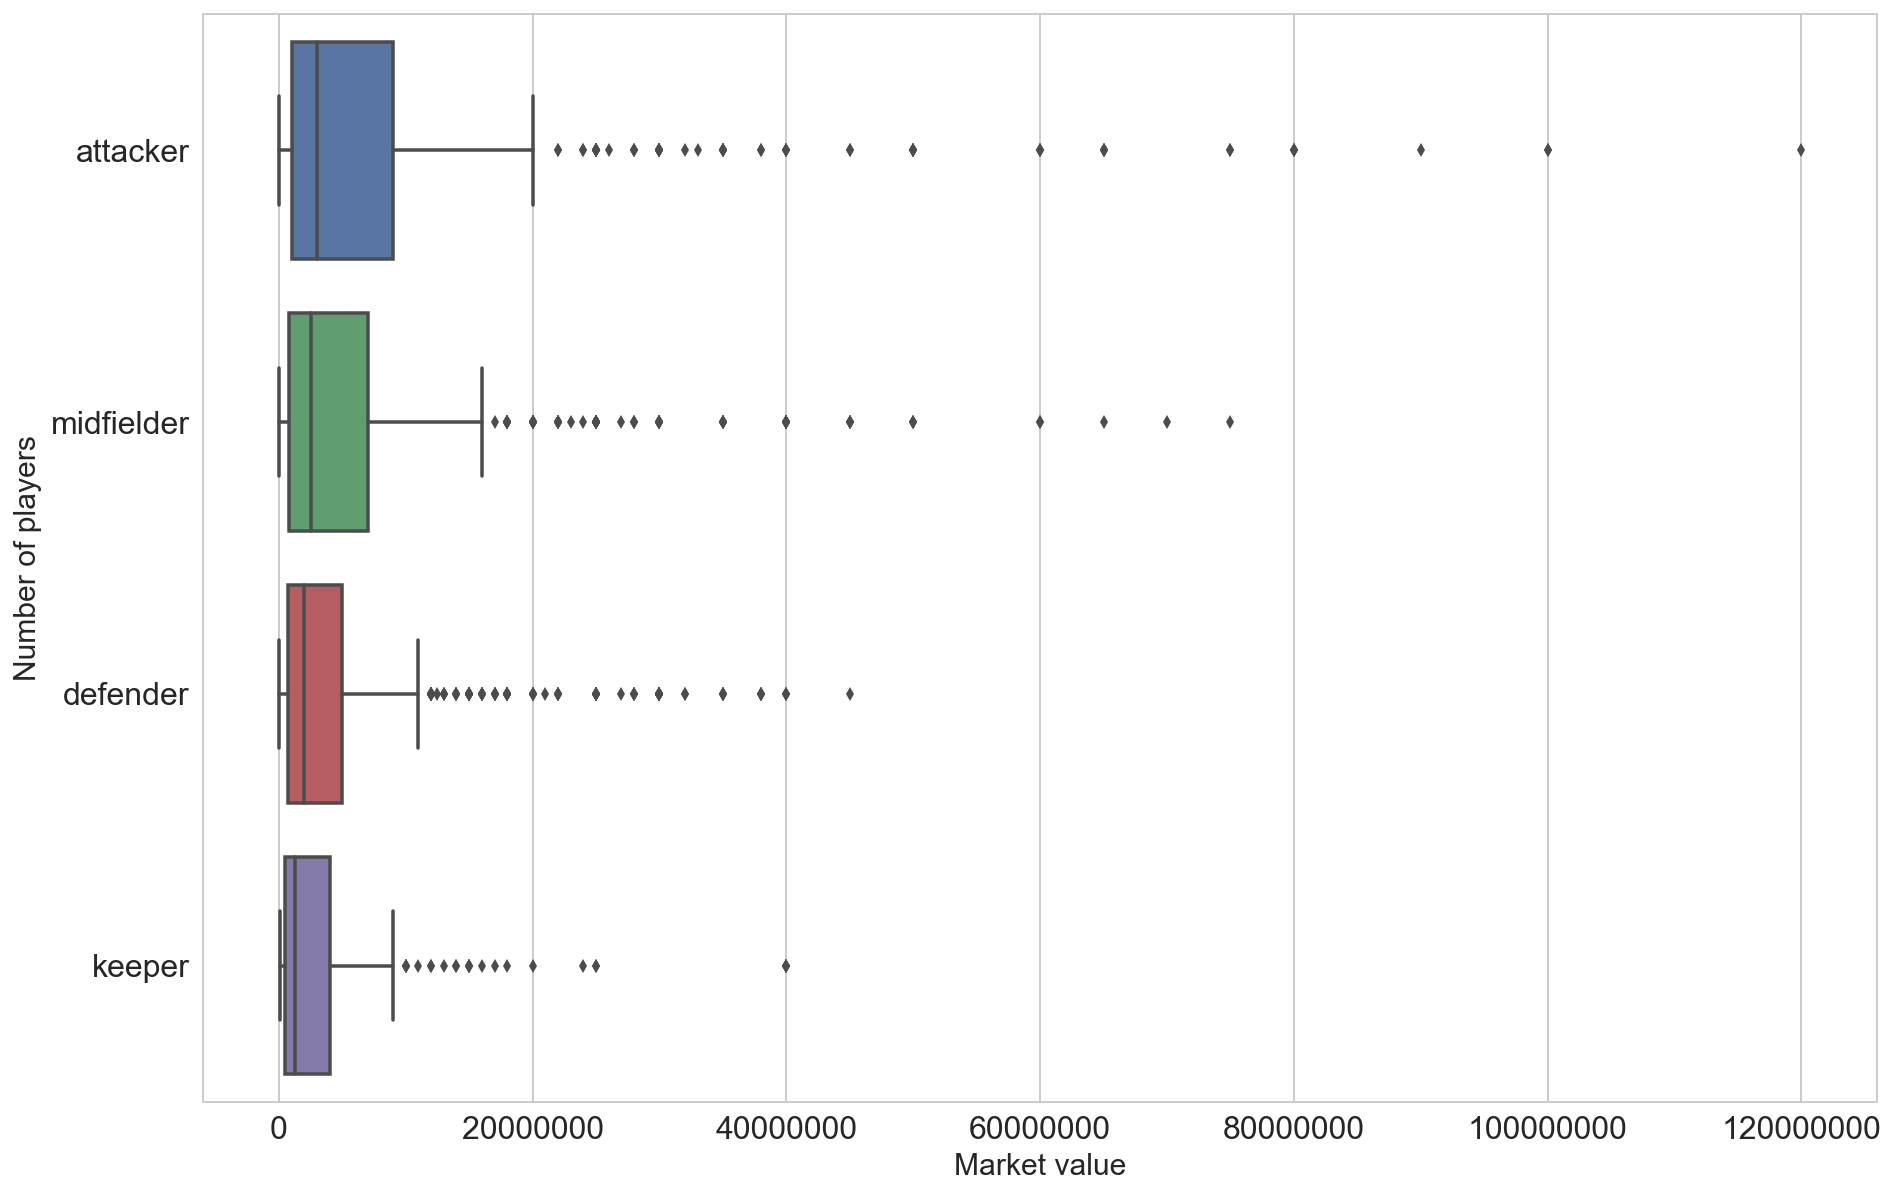

In [18]:
# Boxplot to explore market value by position
xy = df.groupby(['main_pos']).marketval.mean()
xy_df = pd.DataFrame(xy)
xy_df = xy_df.sort_values(by = 'marketval', ascending= False)
sns.set_style('whitegrid')
plt.figure(figsize=(15,10))
plt.ticklabel_format(style='plain', axis='x')
ax = sns.boxplot(y='main_pos', x="marketval", data=df, order = xy_df.index)
ax.set_ylabel('Number of players', fontsize = 15)
ax.set_xlabel('Market value', fontsize = 15)
ax.tick_params(labelsize=16)

The above box plot indicates that attackers and midfielders have generally higher market values than defenders and goal keepers.

### Update league names

In [19]:
# A number of players mainly played in cup competitions (with few games) instead of major leagues during the season.
# To convert this feature into a manageable dummy variable (i.e. not too many columns), code created to only dummy
# variable leagues / competitions whereby there are 15 players in the database who competed in them.

def update_league(value):
    if df[df['league_name'] == value].shape[0] < 15:
        league_name = np.NaN
    else:
        league_name = value
    return league_name

df['league_name'] = df['league_name'].apply(update_league)

### Drop goalkeepers from database

In [20]:
# As mentioned above, goal keepers may provide too much noise for the model & have accordingly been removed.

df.drop(df[df['main_pos'] == 'keeper'].index, inplace=True)
df.shape

(2590, 45)

In [21]:
# Review range of values for each feature (excluding specific columns with high 'uniqueness')

non_unique_cols = [x for x in df.columns if x not in ['pid']]

for col in non_unique_cols:
    if df[col].dtype == 'O':
        print(col)
        print(df[col].value_counts())
        print('Null values: {}'.format(df[col].isnull().sum()))
        #print('0 values: {}'.format(df[df[col] == 0].shape[0]))
        print('=====')

main_pos
defender      986
midfielder    841
attacker      763
Name: main_pos, dtype: int64
Null values: 0
=====
position
Centre-Back           507
Central Midfield      362
Centre-Forward        344
Right-Back            251
Defensive Midfield    234
Left-Back             228
Left Wing             195
Right Wing            192
Attacking Midfield    171
Left Midfield          43
Secondary Striker      32
Right Midfield         31
Name: position, dtype: int64
Null values: 0
=====
foot
right    1686
left      642
both      164
Name: foot, dtype: int64
Null values: 98
=====
country
Italy            355
England          351
Spain            319
Germany          318
Turkey           299
France           294
United States    291
Netherlands      229
Australia        134
Name: country, dtype: int64
Null values: 0
=====
country_2016
England          367
Italy            366
Spain            318
Germany          315
France           310
United States    277
Turkey           265
Netherlands     

### Create dummy variable columns

In [22]:
# Dummy variable the area and experience level columns

dummy_variables_A = ['foot','main_pos','country','country_2016','league_name','position']

# Create loop to create columns for dummy variables 

for variable in dummy_variables_A:
    # Get Dummy variables for colname and store in new dataframe
    dummies = pd.get_dummies(df[variable], prefix = variable, prefix_sep = '_', drop_first = True)

    # Join new dataframe on existing dataframe
    df = pd.concat([df, dummies], axis=1)

In [23]:
df.head()

pid  main_pos     position   age   foot  teamsince  transferfee  \
1   31111.0  defender  Centre-Back  28.0  right 2017-01-13          0.0   
2   43128.0  defender  Centre-Back  33.0  right 2016-07-01          0.0   
3   58120.0  defender  Centre-Back  28.0  right 2009-07-01          0.0   
4   55444.0  defender    Left-Back  28.0   left 2016-07-01          0.0   
5  108108.0  defender   Right-Back  26.0  right 2009-01-01          0.0   

   marketval  prevmarketval    year             ...              \
1   750000.0       600000.0  2017.0             ...               
2   650000.0       650000.0  2017.0             ...               
3   350000.0       350000.0  2017.0             ...               
4   500000.0       400000.0  2017.0             ...               
5   500000.0       350000.0  2017.0             ...               

  position_Centre-Back  position_Centre-Forward position_Defensive Midfield  \
1                    1                        0                           0   
2                    1                        0                           0   
3                    1                        0                           0   
4                    0                        0                           0   
5                    0                        0                           0   

   position_Left Midfield  position_Left Wing  position_Left-Back  \
1                       0                   0                   0   
2                       0                   0                   0   
3                       0                   0                   0   
4                       0                   0                   1   
5                       0                   0                   0   

   position_Right Midfield  position_Right Wing  position_Right-Back  \
1                        0                    0                    0   
2                        0                    0                    0   
3                        0                    0                    0   
4                        0                    0                    0   
5                        0                    0                    1   

   position_Secondary Striker  
1                           0  
2                           0  
3                           0  
4                           0  
5                           0  

[5 rows x 84 columns]

In [24]:
# Null columns to drop (since associated with goalkeepers)

cols_to_drop = ['conceded_2016','clean_sheets_2016','CS_R','GAPM','clean_sheets_career','conceded_goals_career']

df.drop(cols_to_drop, axis = 1, inplace = True)

In [25]:
# Drop rows where no player score is available

df = df.drop(df[df['score_2016'].isnull()].index)

In [26]:
# Columns to fill nulls with 0 (because it is assumed these are fields where 0 is the value, e.g. no goals)

fill_with_0 = ['assists_2016','goals_2016','GPM_2016','ucl_2016_apps','MPG_career','assists_career',
              'goals_career','intl_caps','intl_goals']

for col in fill_with_0:
    df[col] = df[col].fillna(0)

In [27]:
# Columns to fill nulls with averages (because it is assumed these values are missing vs 0, e.g. height!)

fill_with_mean = ['height_s','weight']

for col in fill_with_mean:
    df[col].fillna((df[col].mean()), inplace=True)

In [28]:
# Fill missing value for particular player

df.loc[2355, 'teamsince'] = datetime.date(2012, 6, 30)

## Additional EDA

In [29]:
std_marketval = df['marketval'].std()
mean_marketval = df['marketval'].mean()
median_marketval = df['marketval'].median()
print("Market value standard deviation: {}".format(std_marketval))
print("Market value mean: {}".format(mean_marketval))
print("Market value median: {}".format(median_marketval))

Market value standard deviation: 10259275.7134
Market value mean: 6141206.56371
Market value median: 2500000.0


#### Distribution of market values

Median market value: 2500000.0


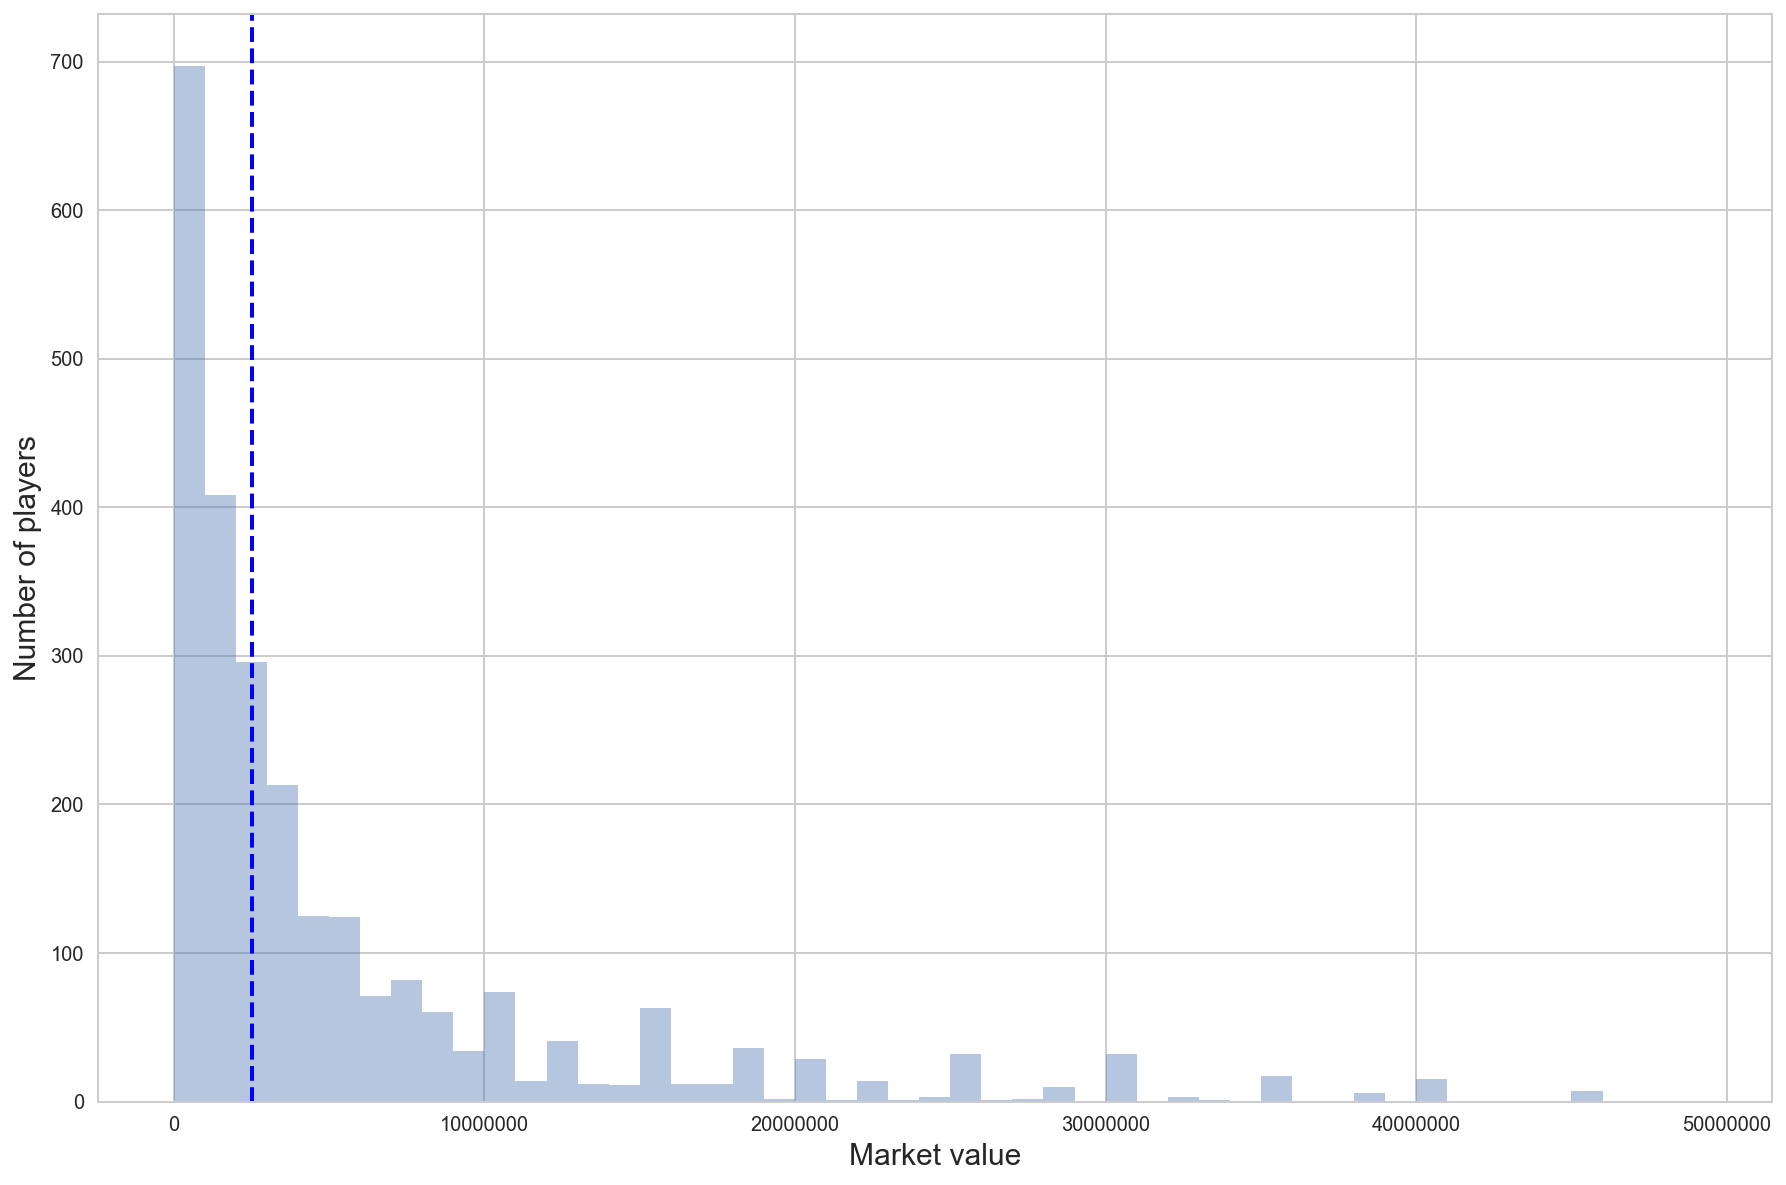

In [30]:
# Histogram to review distribution of median market values
plt.figure(figsize=(15,10))
ax = sns.distplot(df['marketval'], kde=False, bins = np.arange(0,50000000,1000000))
ax.tick_params(labelsize=10)
ax.set_ylabel('Number of players', fontsize = 15)
ax.set_xlabel('Market value', fontsize = 15)
ax.ticklabel_format(useOffset=False, style='plain')
plt.axvline(median_marketval, color='b', linestyle='dashed', linewidth=2)
print("Median market value: {}".format(median_marketval))

As indicated by the above histogram, the majority of players have a market value below $5,000,000.

### Market value below $2,000,000

Median market value: 2500000.0


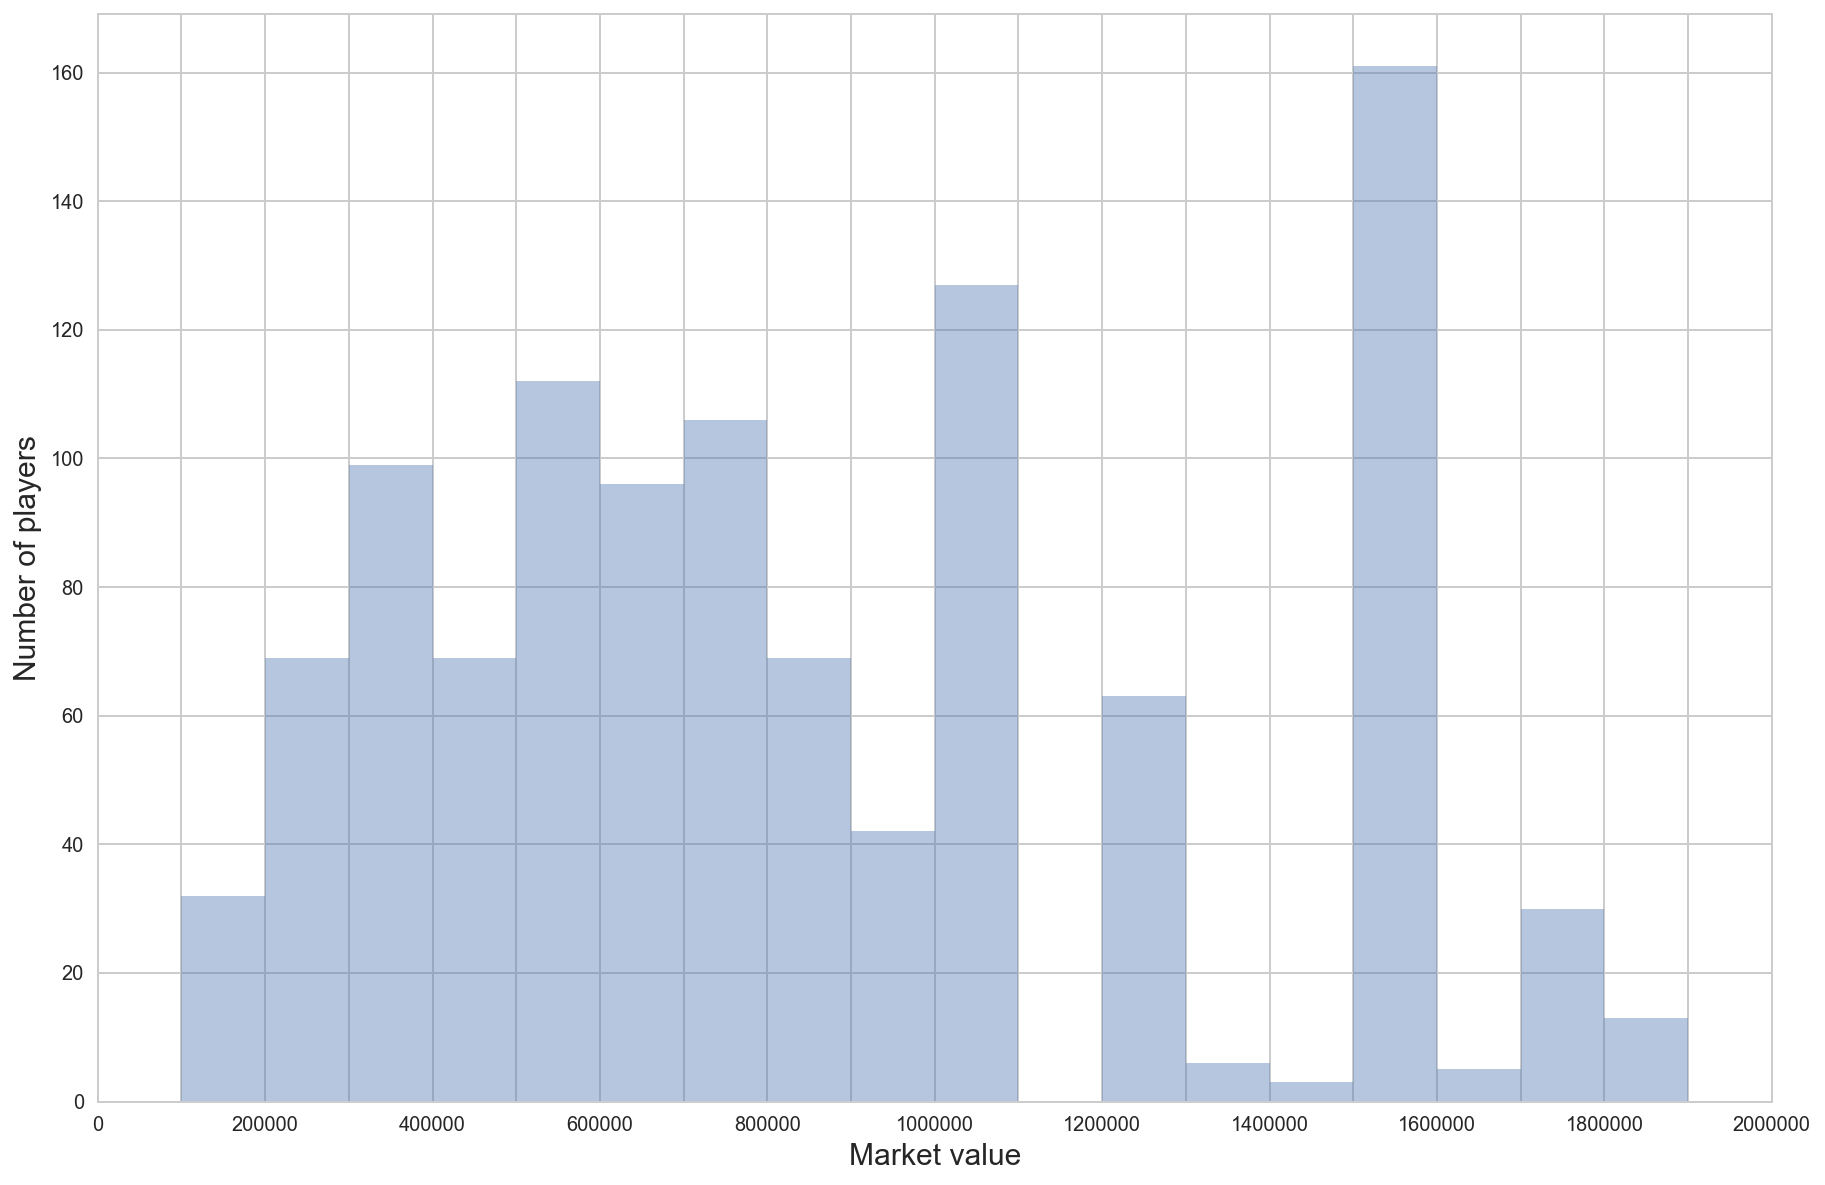

In [31]:
# Histogram to review distribution of median market values
plt.figure(figsize=(15,10))
ax = sns.distplot(df[df['marketval']<2000000]['marketval'], kde=False, bins = np.arange(100000,2000000,100000))
ax.tick_params(labelsize=10)
ax.set_ylabel('Number of players', fontsize = 15)
ax.set_xlabel('Market value', fontsize = 15)
major_ticks = np.arange(0,2200000,200000)                                            
minor_ticks = np.arange(0, 2000000, 100000)
ax.set_xticks(major_ticks) 
ax.set_xticks(minor_ticks, minor=True)  
ax.grid(which='both')                                                                                 
ax.grid(which='minor', alpha=1)                                                
ax.grid(which='major', alpha=1)                                                
ax.ticklabel_format(useOffset=False, style='plain')
#plt.axvline(median_marketval, color='b', linestyle='dashed', linewidth=2)
print("Median market value: {}".format(median_marketval))

##### Confirm no market values are nil

In [32]:
df[df['marketval'] == 0]

Empty DataFrame
Columns: [pid, main_pos, position, age, foot, teamsince, transferfee, marketval, prevmarketval, year, country, marketval_2016, country_2016, mins_2016, points_2016, apps_2016, assists_2016, goals_2016, MPM_2016, PPM_2016, GPM_2016, league_name, ucl_2016_apps, MPG_career, PPM_career, apps_career, assists_career, goals_career, intl_caps, intl_goals, minutes_career, attack_2016, defense_2016, poss_2016, gk_2016, score_2016, height_s, weight, bmi, foot_left, foot_right, main_pos_defender, main_pos_midfielder, country_England, country_France, country_Germany, country_Italy, country_Netherlands, country_Spain, country_Turkey, country_United States, country_2016_England, country_2016_France, country_2016_Germany, country_2016_Italy, country_2016_Netherlands, country_2016_Spain, country_2016_Turkey, country_2016_United States, league_name_A-League, league_name_Eredivisie, league_name_LaLiga, league_name_Ligue 1, league_name_MLS, league_name_Premier League, league_name_Serie A, league_name_Süper Lig, position_Central Midfield, position_Centre-Back, position_Centre-Forward, position_Defensive Midfield, position_Left Midfield, position_Left Wing, position_Left-Back, position_Right Midfield, position_Right Wing, position_Right-Back, position_Secondary Striker]
Index: []

[0 rows x 78 columns]

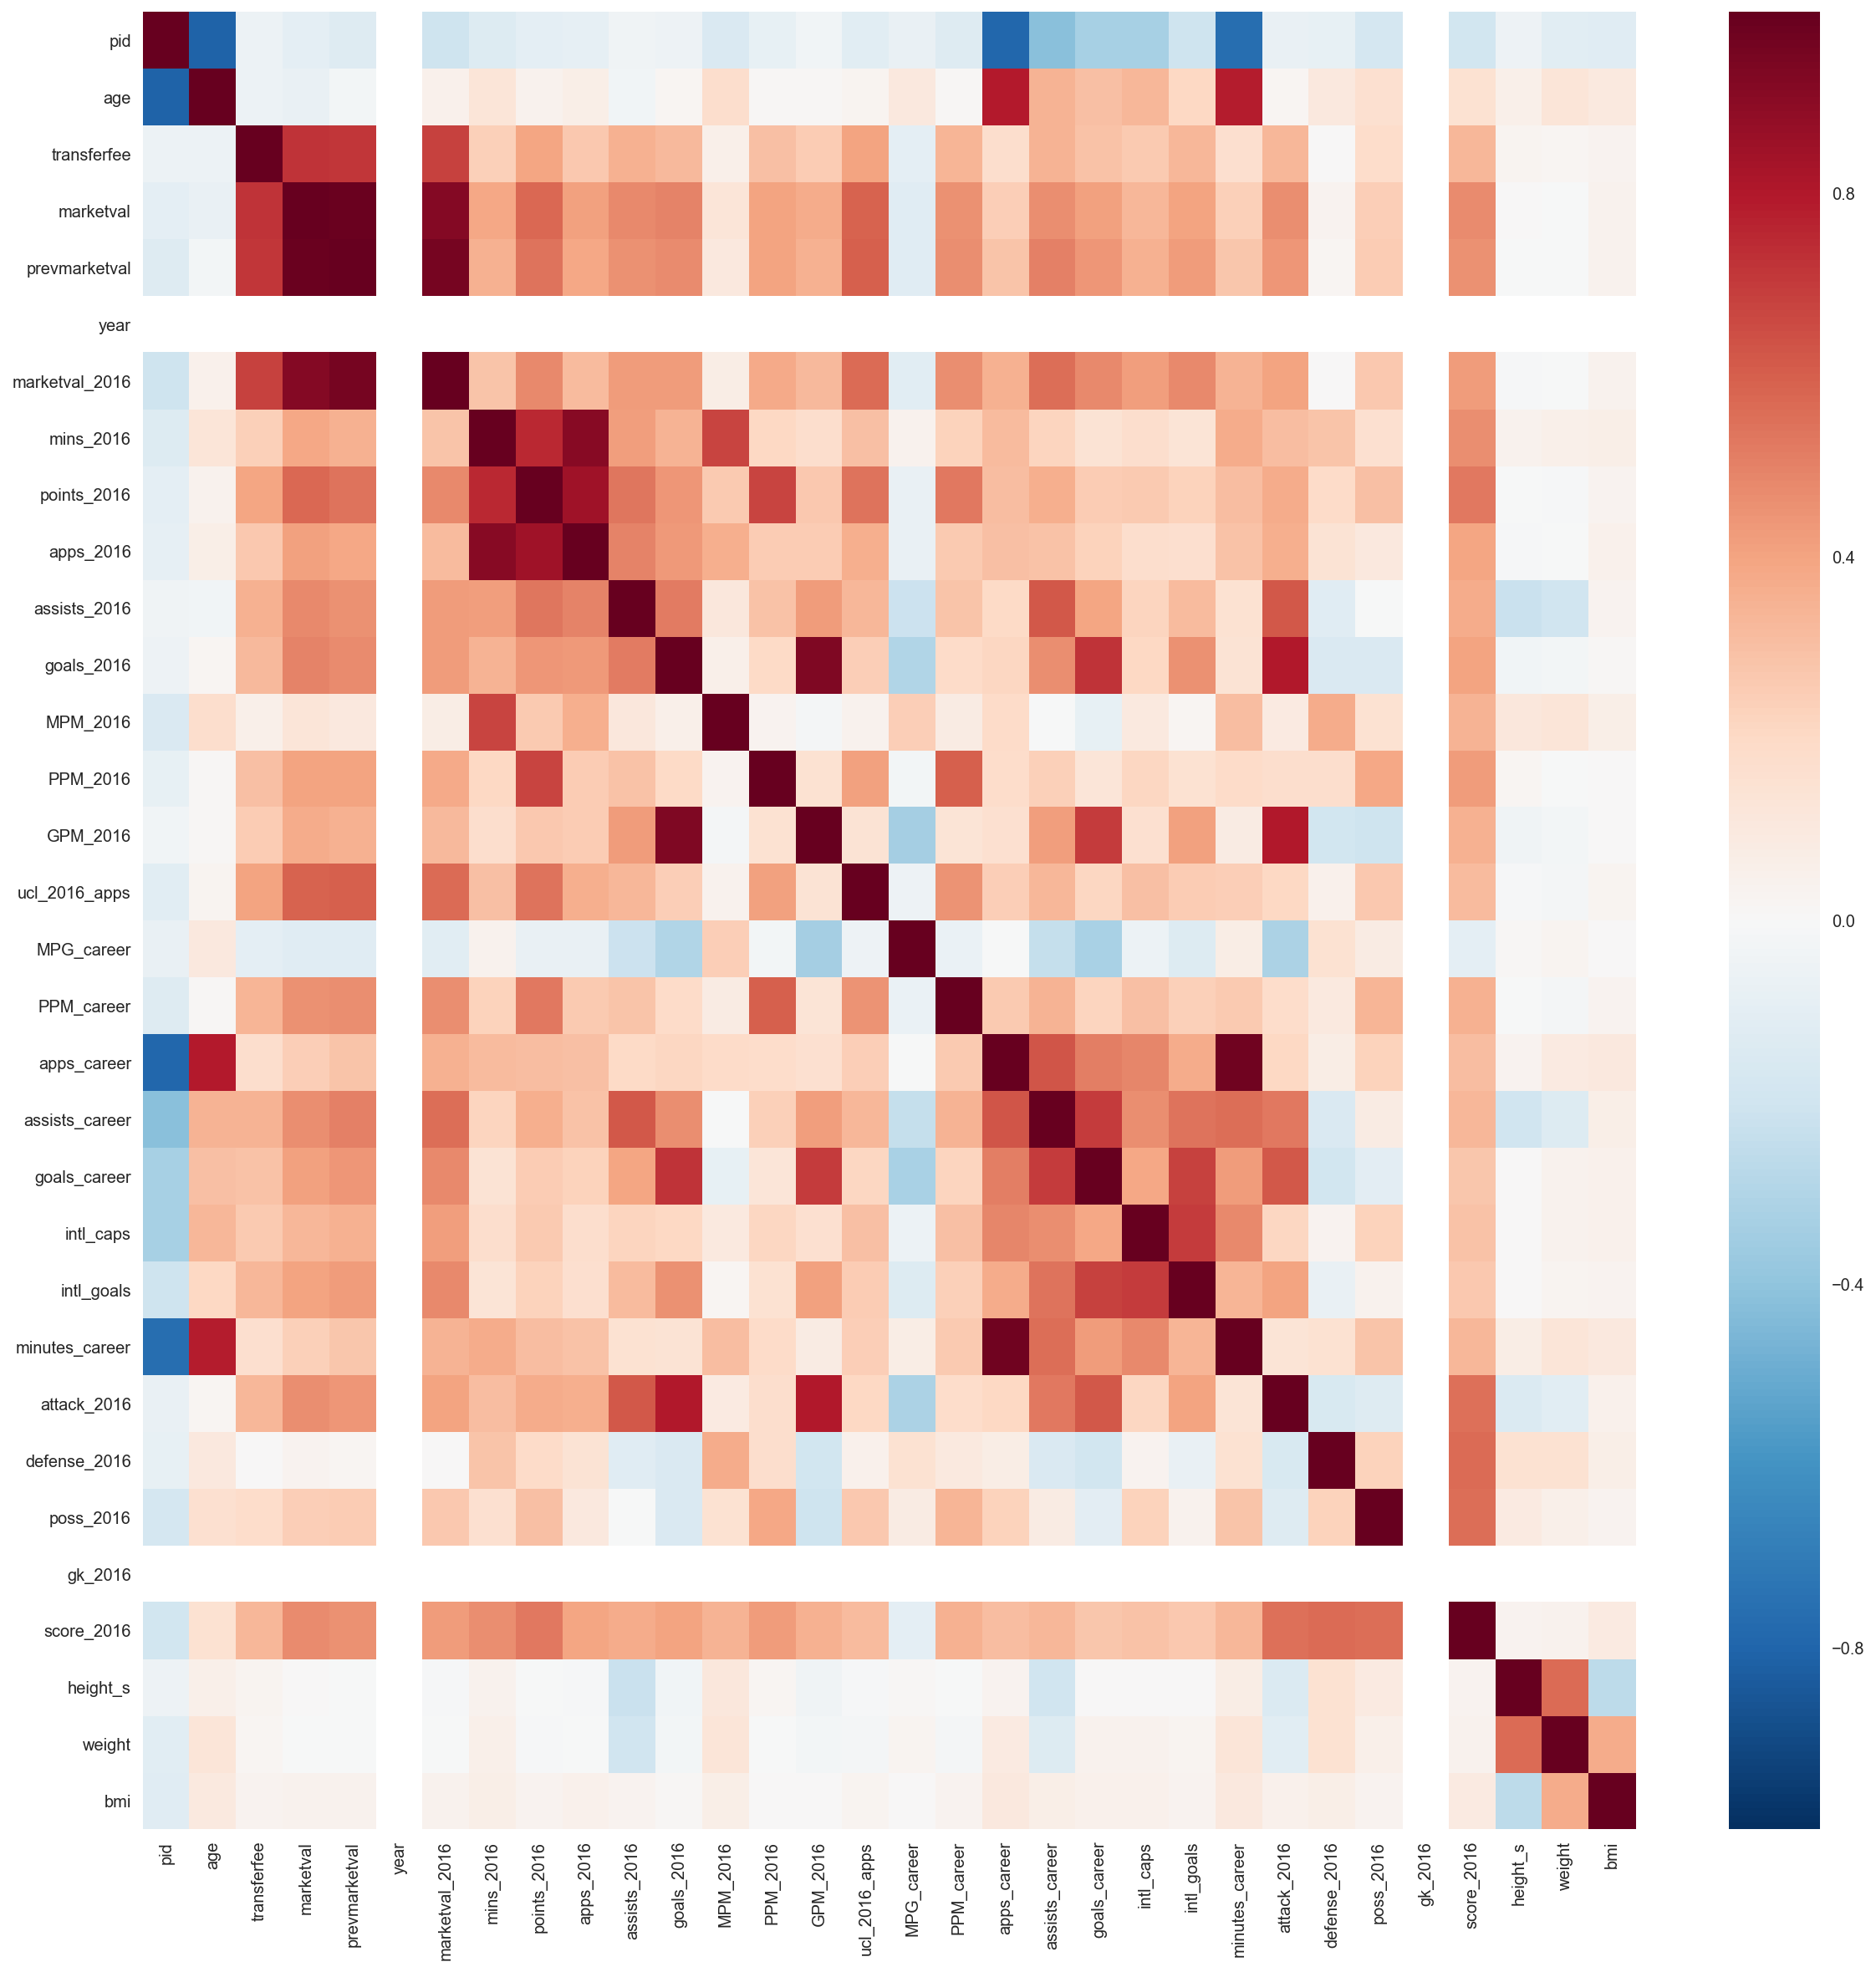

In [33]:
# Create heatmap of correlation relationship between non-categorical fields

plt.figure(figsize=(20,20))

non_categorical_fields = []

prefixes = ['main_pos_','foot_','country_','league_name_','position_','age_']

for col in df:
    count = 0
    for prefix in prefixes:
        if prefix in col:
            count += 1
    if count == 0:
        non_categorical_fields.append(col)

df_corr = df[non_categorical_fields].corr()
sns.heatmap(df_corr)

The above correlation heatmap shows that there is high correlation between the following features:
   * Previous market value and current market value
   * Transfer fee and market values
   * The number of appearances & minutes played and someone's age
   * The number of minutes a player has played in the season, match points earned and performance score

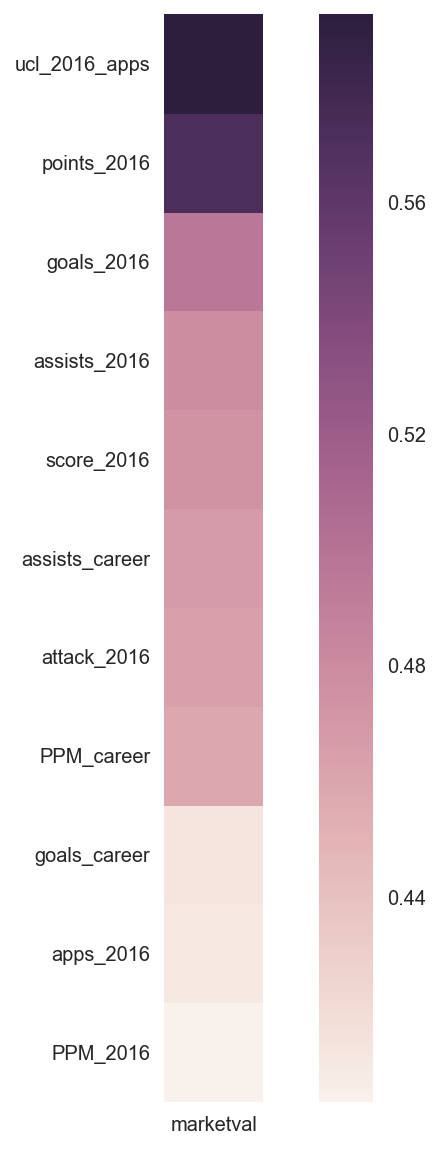

In [34]:
# Correlation column
plt.figure(figsize=(10,10))
marketval_corr = df[non_categorical_fields].corr().loc[:,'marketval']
marketval_2 = df[non_categorical_fields].corr()
#df_gender_corr = df.corr().loc[:,'gender']
x = np.absolute(marketval_corr).sort_values(ascending = False)
y = marketval_2[marketval_2['marketval'] > 0.4]
y2 = y[['marketval']]
y2 = y2.drop('marketval', axis = 0)
y2 = y2.sort_values('marketval', ascending = False)
sns.heatmap(y2[3:], square = True)

The above correlation slice shows that the following features are more highly correlated with market values:
   * Player transfer fee
   * Appearances in the UEFA Champions League in 2016
   * The number of points won by their team during 2016 (whereby 3 points for a win, 1 for a draw)
   * The number of goals scored by the player in 2016
   * The number of assists provided by the player in 2016
   * The player's calculated average performance score in 2016

# <font color="#2c86c1"> Model creation and statistical analysis </font>

This section of the notebook contains model creation and statistical analysis to address the project's objectives of predicting market value of footballers and inferring value for money.

The best performing model to predict market value of players appears to be the Random Forest model.  This has been selected due to the small cross validation range, despite the r-squared score on the data being 0.70 (which is lower than some of the other models which have a 0.74 score).

## <font color = "#f47741"> Model A: Create model to predict market value </font>

### Create linear regression model

In [35]:
def regression_model(X_matrix, target, testsize=0.25):

    ''' 
    The coef_in_output is to choose how many variables to display in the co-efficients table.
    This doesn't change the model itself, just what is displayed in the co-efficients dataframe!
    I thought this was useful in case I wanted to 
    '''
    
    # Scale the data using standardisation

    ss = StandardScaler()
    X_s = pd.DataFrame(ss.fit_transform(X_matrix))


    # Create a test train split of the dataset
    X_train, X_test, y_train, y_test = train_test_split(X_s, target, test_size = testsize)

    # Create DataFrame to store regression scores

    reg_score_df= pd.DataFrame(columns = ['Test_name','CV_mean','CV_min','CV_max',
                                          'CV_std','train_r^2_score','test_r^2_score','notes'])

    # Create empty DataFrame to store coefficients

    coef_df = pd.DataFrame(index=range(0,10))

    # Specify training and test matrices for the models

    X1 = X_train
    X2 = X_test
    y1 = y_train
    y2 = y_test

    # Calculate optimal alphas

    ridge_alphas = np.logspace(0, 5, 200)
    optimal_ridge = RidgeCV(alphas=ridge_alphas, cv=10)
    optimal_ridge.fit(X1, y1)

    optimal_lasso = LassoCV(n_alphas=500, cv=10, verbose=1)
    optimal_lasso.fit(X1, y1)

    l1_ratios = np.linspace(0.01, 1.0, 25)
    optimal_enet = ElasticNetCV(l1_ratio=l1_ratios, n_alphas=100, cv=10, verbose=1)
    optimal_enet.fit(X1, y1)

    # Create list of different model types to run

    model_types = [LinearRegression(),Ridge(alpha=optimal_ridge.alpha_),Lasso(alpha=optimal_lasso.alpha_),
                   ElasticNet(alpha=optimal_enet.alpha_, l1_ratio=optimal_enet.l1_ratio_)]

    # Create a for loop to run all of the models

    for model_type in model_types:

        # Calculate CV scores and model r^2 scores

        m = model_type
        test_name = str(m)[:str(m).index('(')]
        scores = cross_val_score(m, X1, y1, cv=5)
        CV_mean = scores.mean()
        CV_max = scores.max()
        CV_min = scores.min()
        CV_std = scores.std()
        m.fit(X1, y1)
        train_score = m.score(X1, y1)
        test_score = m.score(X2, y2)
        notes = "no notes"

        # Take results and put into a DataFrame
        reg_score_df.loc[len(reg_score_df)] = [test_name,CV_mean, CV_min, CV_max, CV_std, train_score,
                                               test_score, notes]
        pd.set_option('display.float_format', lambda x: '%.4f' % x)

        # Create co-efficient matrix

        # Review the coefficients 

        coefs = pd.DataFrame({'variable':X_feature_names,
                              'coef':m.coef_,
                              'abs_coef':np.abs(m.coef_)})

        # Rename columns
        coefs.columns = ['abs_coef','coef',test_name]

        coefs.sort_values('abs_coef',inplace = True, ascending = False)
        coefs.drop('abs_coef',axis = 1, inplace=True)
        coefs.reset_index(inplace = True, drop=True)
        
        # Re-order absolute co-efficient column and re-order columns (so variable displayed first)
        coefs = coefs[[test_name,'coef']]
        
        coefs.loc[-1] = ['intercept',m.intercept_]  # adding intercept row
        coefs.index = coefs.index + 1  # shifting index
        coefs = coefs.sort_index()  # sorting by index

        coef_df = pd.concat([coef_df, coefs], axis=1)

    # Remove results that don't make sense

    def removelargevalues(value):
        if value > 1000 or value < -1000:
            return np.NaN
        else:
            return value

    for col in reg_score_df.columns[1:]:
        reg_score_df[col] = reg_score_df[col].apply(removelargevalues)

    # Insert note into notes if value converted to np.NaN

    reg_score_df['notes'] = reg_score_df[reg_score_df.columns[1:7]].apply(lambda x: (x.isnull()).sum(), axis=1)
    reg_score_df['notes'] = reg_score_df['notes'].map(lambda x: '{} values out of range'.format(x) if x > 0 else "no notes")

    # Print DataFrame of model results

    return reg_score_df, coef_df

#### Model 1: All features; no split

In [77]:
# Create feature matrix and target

# Select column names for predictor matrix
X_feature_names = [x for x in df.columns if x not in ['pid','teamsince','marketval','prevmarketval','year',
                                                 'marketval_2016'] + dummy_variables_A]

# Create predictor matrix
X_features = df[X_feature_names]

# Create target matrix
y = df['marketval']

X_features = X_features.as_matrix().astype(np.float)
y = y.as_matrix().astype(np.float)

regdf, coefdf = regression_model(X_features, y, 0.25)

regdf

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

Test_name  CV_mean  CV_min  CV_max  CV_std  train_r^2_score  \
0  LinearRegression   0.7755  0.7259  0.7959  0.0254           0.7974   
1             Ridge   0.7753  0.7261  0.7968  0.0254           0.7971   
2             Lasso   0.7765  0.7284  0.7976  0.0248           0.7967   
3        ElasticNet   0.7765  0.7283  0.7976  0.0248           0.7967   

   test_r^2_score     notes  
0          0.6806  no notes  
1          0.6828  no notes  
2          0.6859  no notes  
3          0.6859  no notes

#### Create separate dataframes to assess whether removing outliers improves model

In [78]:
# Dataframes to segment values 3 standard deviations above mean

df_mv_3std = df[df['marketval'] < (mean_marketval + 3 * std_marketval)]
print(df_mv_3std.shape)

(2533, 78)


In [79]:
# Dataframes to segment values 2 standard deviations above mean

df_mv_2std = df[df['marketval'] < (mean_marketval + 2 * std_marketval)]
print(df_mv_2std.shape)

(2468, 78)


In [80]:
# Dataframes to segment values 1 standard deviation above mean

df_mv_1std = df[df['marketval'] < (mean_marketval + 1 * std_marketval)]
print(df_mv_1std.shape)

(2337, 78)


#### Model 2a, 2b, 2c: Remove high market value outliers

In [81]:
dfs = [df_mv_1std, df_mv_2std, df_mv_3std]

dfs_dict = {0: 'Market values less than 1 standard deviation above the mean',
           1: 'Market values less than 2 standard deviations above the mean',
           2: 'Market values less than 3 standard deviations above the mean'}

for index, df_name in enumerate(dfs):
    X_feature_names = [x for x in df_name.columns if x not in ['pid','teamsince','marketval','prevmarketval','year',
                                                 'marketval_2016'] + dummy_variables_A]

    # Create predictor matrix
    X_features = df_name[X_feature_names]

    # Create target matrix
    y = df_name['marketval']

    X_features = X_features.as_matrix().astype(np.float)
    y = y.as_matrix().astype(np.float)
    
    regdf_loop, coefdf_loop = regression_model(X_features, y, 0.25)
    
    print("===== {}=====\n".format(dfs_dict[index]))
    
    print(regdf_loop.to_string())
    

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    6.3s finished


===== Market values less than 1 standard deviation above the mean=====

          Test_name  CV_mean  CV_min  CV_max  CV_std  train_r^2_score  test_r^2_score     notes
0  LinearRegression   0.6356  0.6112  0.6629  0.0187           0.6780          0.6394  no notes
1             Ridge   0.6433  0.6299  0.6586  0.0091           0.6715          0.6374  no notes
2             Lasso   0.6482  0.6371  0.6641  0.0101           0.6698          0.6408  no notes
3        ElasticNet   0.6482  0.6369  0.6642  0.0102           0.6700          0.6408  no notes


........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

===== Market values less than 2 standard deviations above the mean=====

          Test_name  CV_mean  CV_min  CV_max  CV_std  train_r^2_score  test_r^2_score     notes
0  LinearRegression   0.6557  0.6271  0.6846  0.0204           0.6854          0.7213  no notes
1             Ridge   0.6567  0.6296  0.6747  0.0175           0.6833          0.7232  no notes
2             Lasso   0.6578  0.6345  0.6760  0.0170           0.6806          0.7267  no notes
3        ElasticNet   0.6578  0.6346  0.6760  0.0170           0.6805          0.7268  no notes


........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

===== Market values less than 3 standard deviations above the mean=====

          Test_name  CV_mean  CV_min  CV_max  CV_std  train_r^2_score  test_r^2_score     notes
0  LinearRegression   0.7026  0.6128  0.7532  0.0512           0.7323          0.7261  no notes
1             Ridge   0.7050  0.6292  0.7575  0.0452           0.7274          0.7201  no notes
2             Lasso   0.7082  0.6244  0.7624  0.0490           0.7307          0.7262  no notes
3        ElasticNet   0.7082  0.6245  0.7624  0.0490           0.7307          0.7262  no notes


**Outcome**: removing the higher outliers did not improve the model.

### Additional data cleaning

**Option 1**: Convert the 'age' feature to a dummy variable

In [36]:
# Dummy variable the age feature

dummy_variables_B = ['age']

# Create loop to create columns for dummy variables 

for variable in dummy_variables_B:
    # Get Dummy variables for colname and store in new dataframe
    dummies = pd.get_dummies(df[variable], prefix = variable, prefix_sep = '_', drop_first = True)

    # Join new dataframe on existing dataframe
    df = pd.concat([df, dummies], axis=1)

#### Model 3: re-run model 1 (with 'age' converted to dummy variables)

In [83]:
# Create feature matrix and target

# Select column names for predictor matrix
X_feature_names = [x for x in df.columns if x not in ['pid','teamsince','marketval','prevmarketval','year',
                                                 'marketval_2016'] + dummy_variables_A + dummy_variables_B]

# Create predictor matrix
X_features = df[X_feature_names]

# Create target matrix
y = df['marketval']

X_features = X_features.as_matrix().astype(np.float)
y = y.as_matrix().astype(np.float)

regdf_3, coefdf_3 = regression_model(X_features, y, 0.25)

regdf_3

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

Test_name  CV_mean  CV_min  CV_max  CV_std  train_r^2_score  \
0  LinearRegression      nan     nan  0.7963     nan           0.7784   
1             Ridge   0.7473  0.6848  0.7972  0.0415           0.7782   
2             Lasso   0.7484  0.6853  0.7987  0.0415           0.7767   
3        ElasticNet   0.7484  0.6853  0.7987  0.0415           0.7767   

   test_r^2_score                  notes  
0          0.7958  3 values out of range  
1          0.7951               no notes  
2          0.7923               no notes  
3          0.7923               no notes

**Outcome**: Converting age to dummy variables improved model performance.

**Option 2**: Convert 2016 statistic columns to either above or below average instead of continuous variables

In [84]:
# Convert statistic columns into dummy variables based on either above or below average

stat_features = ['mins_2016','points_2016','apps_2016','assists_2016','goals_2016','MPM_2016',
                 'PPM_2016','GPM_2016','ucl_2016_apps','attack_2016','defense_2016',
                 'poss_2016','gk_2016','score_2016']

for stat in stat_features:
    stat_mean = df[stat].mean()
    df[stat + "_avg"] = df[stat].map(lambda x: 1 if x > stat_mean else 0)

In [85]:
# Create list of these new column names

cols_with_avgs = []

for col in df.columns:
    if '_avg' in col:
        cols_with_avgs.append(col)

#### Model 4: Re-run model 3 with 2016 stats converted to comparisons vs averages

In [86]:
# Create feature matrix and target

# Select column names for predictor matrix
X_feature_names = [x for x in df.columns if x not in ['pid','teamsince','marketval','prevmarketval','year',
                                                 'marketval_2016'] + stat_features + dummy_variables_A + dummy_variables_B]

# Create predictor matrix
X_features = df[X_feature_names]

# Create target matrix
y = df['marketval']

X_features = X_features.as_matrix().astype(np.float)
y = y.as_matrix().astype(np.float)

regdf_4, coefdf_4 = regression_model(X_features, y, 0.25)

regdf_4

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    7.2s finished


Test_name  CV_mean  CV_min  CV_max  CV_std  train_r^2_score  \
0  LinearRegression      nan     nan  0.7058     nan           0.7278   
1             Ridge   0.6737  0.6325  0.7280  0.0391           0.7203   
2             Lasso   0.6683  0.6395  0.7115  0.0297           0.7268   
3        ElasticNet   0.6683  0.6396  0.7116  0.0298           0.7268   

   test_r^2_score                  notes  
0          0.7212  3 values out of range  
1          0.7181               no notes  
2          0.7232               no notes  
3          0.7233               no notes

**Outcome**: Converting the stats 2016 columns reduced model performance but tightened the CV range

### Create Gradient Boosting model

#### Model 5: Gradient Boosting with stats converted to comparisons vs averages

In [87]:
# Select column names for predictor matrix
X_feature_names = [x for x in df.columns if x not in ['pid','teamsince','marketval','prevmarketval','year',
                                                 'marketval_2016'] + stat_features + dummy_variables_A + dummy_variables_B]

# Create predictor matrix
X_features = df[X_feature_names]

# Create target matrix
y = df['marketval']

X_features = X_features.as_matrix().astype(np.float)
y = y.as_matrix().astype(np.float)

X_train, X_test, y_train, y_test = train_test_split(X_features, y, test_size = 0.25)
est = GradientBoostingRegressor(n_estimators=100, learning_rate=0.5, max_depth=5, random_state=0, loss='ls').fit(X_train, y_train)
est_CVscores = cross_val_score(est, X_train, y_train, cv=5)
print("Train model score: {}".format(est.score(X_train, y_train)))
print("Test model score: {}".format(est.score(X_test, y_test)))
print("Cross validation scores: mean: {}, range: {} to {}"
      .format(est_CVscores.mean(), est_CVscores.min(), est_CVscores.max()))

Train model score: 0.998876147434
Test model score: 0.672130707993
Cross validation scores: mean: 0.627767492172, range: 0.462274893496 to 0.713253022191


#### Model 6: Gradient Boosting without stats converted to comparisons vs averages

In [88]:
# Select column names for predictor matrix
X_feature_names = [x for x in df.columns if x not in ['pid','teamsince','marketval','prevmarketval','year',
                                                 'marketval_2016'] + cols_with_avgs + dummy_variables_A + dummy_variables_B]

# Create predictor matrix
X_features = df[X_feature_names]

# Create target matrix
y = df['marketval']

X_features = X_features.as_matrix().astype(np.float)
y = y.as_matrix().astype(np.float)

X_train, X_test, y_train, y_test = train_test_split(X_features, y, test_size = 0.25)
est = GradientBoostingRegressor(n_estimators=100, learning_rate=0.5, max_depth=5, random_state=0, loss='ls').fit(X_train, y_train)
est_CVscores = cross_val_score(est, X_train, y_train, cv=5)
print("Train model score: {}".format(est.score(X_train, y_train)))
print("Test model score: {}".format(est.score(X_test, y_test)))
print("Cross validation scores: mean: {}, range: {} to {}"
      .format(est_CVscores.mean(), est_CVscores.min(), est_CVscores.max()))

Train model score: 0.99969359239
Test model score: 0.686335646263
Cross validation scores: mean: 0.723159658408, range: 0.674399450111 to 0.797731508718


In [89]:
# Drop the created stats columns since they are low performing

df.drop(cols_with_avgs, axis = 1, inplace = True)

### Create Random Forest Regressor

#### Model 7: Random Forest

In [37]:
# Create feature matrix and target
# Select column names for predictor matrix
X_feature_names = [x for x in df.columns if x not in ['pid','teamsince','marketval','prevmarketval','year',
                                                 'marketval_2016'] + dummy_variables_A + dummy_variables_B]

# Create predictor matrix
X_features = df[X_feature_names]

# Create target matrix
y = df['marketval']

X_features_best_model = X_features.as_matrix().astype(np.float)
y = y.as_matrix().astype(np.float)

X_train, X_test, y_train, y_test = train_test_split(X_features_best_model, y, test_size = 0.25, random_state = 26)

regr = RandomForestRegressor(max_depth=None, random_state=0, min_samples_split = 2)
trained_rf_model = regr.fit(X_train, y_train)
print("Train score: {}".format(regr.score(X_train, y_train)))
print("Test score: {}".format(regr.score(X_test, y_test)))
rf_CVscores = cross_val_score(regr, X_train, y_train, cv=5)
print("Cross validation scores: mean: {}, range: {} to {}, std: {}"
      .format(rf_CVscores.mean(), rf_CVscores.min(), rf_CVscores.max(), rf_CVscores.std()))

Train score: 0.955278810718
Test score: 0.699713961744
Cross validation scores: mean: 0.731363672362, range: 0.707151807789 to 0.749087809043, std: 0.0140063478217


In [91]:
rf_feature_importance_table = pd.DataFrame({
        'feature':X_feature_names,
        'importance':regr.feature_importances_
    })

rf_feature_importance_table.sort_values('importance', ascending=False, inplace=True)
rf_feature_importance_table[0:20]

feature  importance
0      transferfee      0.4030
2      points_2016      0.1860
18     attack_2016      0.1107
9    ucl_2016_apps      0.0558
22      score_2016      0.0335
13  assists_career      0.0251
14    goals_career      0.0139
8         GPM_2016      0.0124
11      PPM_career      0.0114
10      MPG_career      0.0108
1        mins_2016      0.0106
7         PPM_2016      0.0092
5       goals_2016      0.0086
4     assists_2016      0.0082
3        apps_2016      0.0081
20       poss_2016      0.0076
6         MPM_2016      0.0067
23        height_s      0.0066
25             bmi      0.0065
15       intl_caps      0.0056

### GridSearch Pipeline with Random Forest Regressor

In [142]:
# Select column names for predictor matrix
X_feature_names = [x for x in df.columns if x not in ['pid','teamsince','marketval','prevmarketval','year',
                                                 'marketval_2016'] + dummy_variables_A + dummy_variables_B]

# Create predictor matrix
X_features = df[X_feature_names]

# Create target matrix
y = df['marketval']

X_features = X_features.as_matrix().astype(np.float)
y = y.as_matrix().astype(np.float)

X_train, X_test, y_train, y_test = train_test_split(X_features, y, test_size=0.25, random_state=123)
 
# Declare data preprocessing steps
pipeline = make_pipeline(preprocessing.StandardScaler(), RandomForestRegressor(n_estimators=200))
 
# 6. Declare hyperparameters to tune
hyperparameters = { 'randomforestregressor__max_features' : ['auto', 'sqrt', 'log2'],
                  'randomforestregressor__max_depth': [None, 10, 5, 3, 1]}
 
# 7. Tune model using cross-validation pipeline
clf = GridSearchCV(pipeline, hyperparameters, cv=5)
 
clf.fit(X_train, y_train)
 
# 8. Refit on the entire training set
# No additional code needed if clf.refit == True (default is True)
 
# 9. Evaluate model pipeline on test data
pred = clf.predict(X_test)
print r2_score(y_test, pred)
print mean_squared_error(y_test, pred)
print("Train score: {}".format(clf.score(X_train,y_train)))
print("Test score: {}".format(clf.score(X_test,y_test)))

rf_2_CVscores = cross_val_score(clf, X_train, y_train, cv=5)
print("Cross validation scores: mean: {}, range: {} to {}"
      .format(rf_2_CVscores.mean(), rf_2_CVscores.min(), rf_2_CVscores.max()))

0.738854313432
3.75907732444e+13
Train score: 0.964715102146
Test score: 0.738854313432
Cross validation scores: mean: 0.743400093663, range: 0.677251885712 to 0.792742717065


## Visualise model results

The best performing model appears to be Model 7 - Random Forest, due to the small cross validation range, despite the r-squared score on the data being 0.70 (i.e. lower than some of the other models which have a 0.74 score).

In [38]:
# Create a column in the dataframe which predicts market values based on this model

df['predicted_mv'] = regr.predict(X_features_best_model)

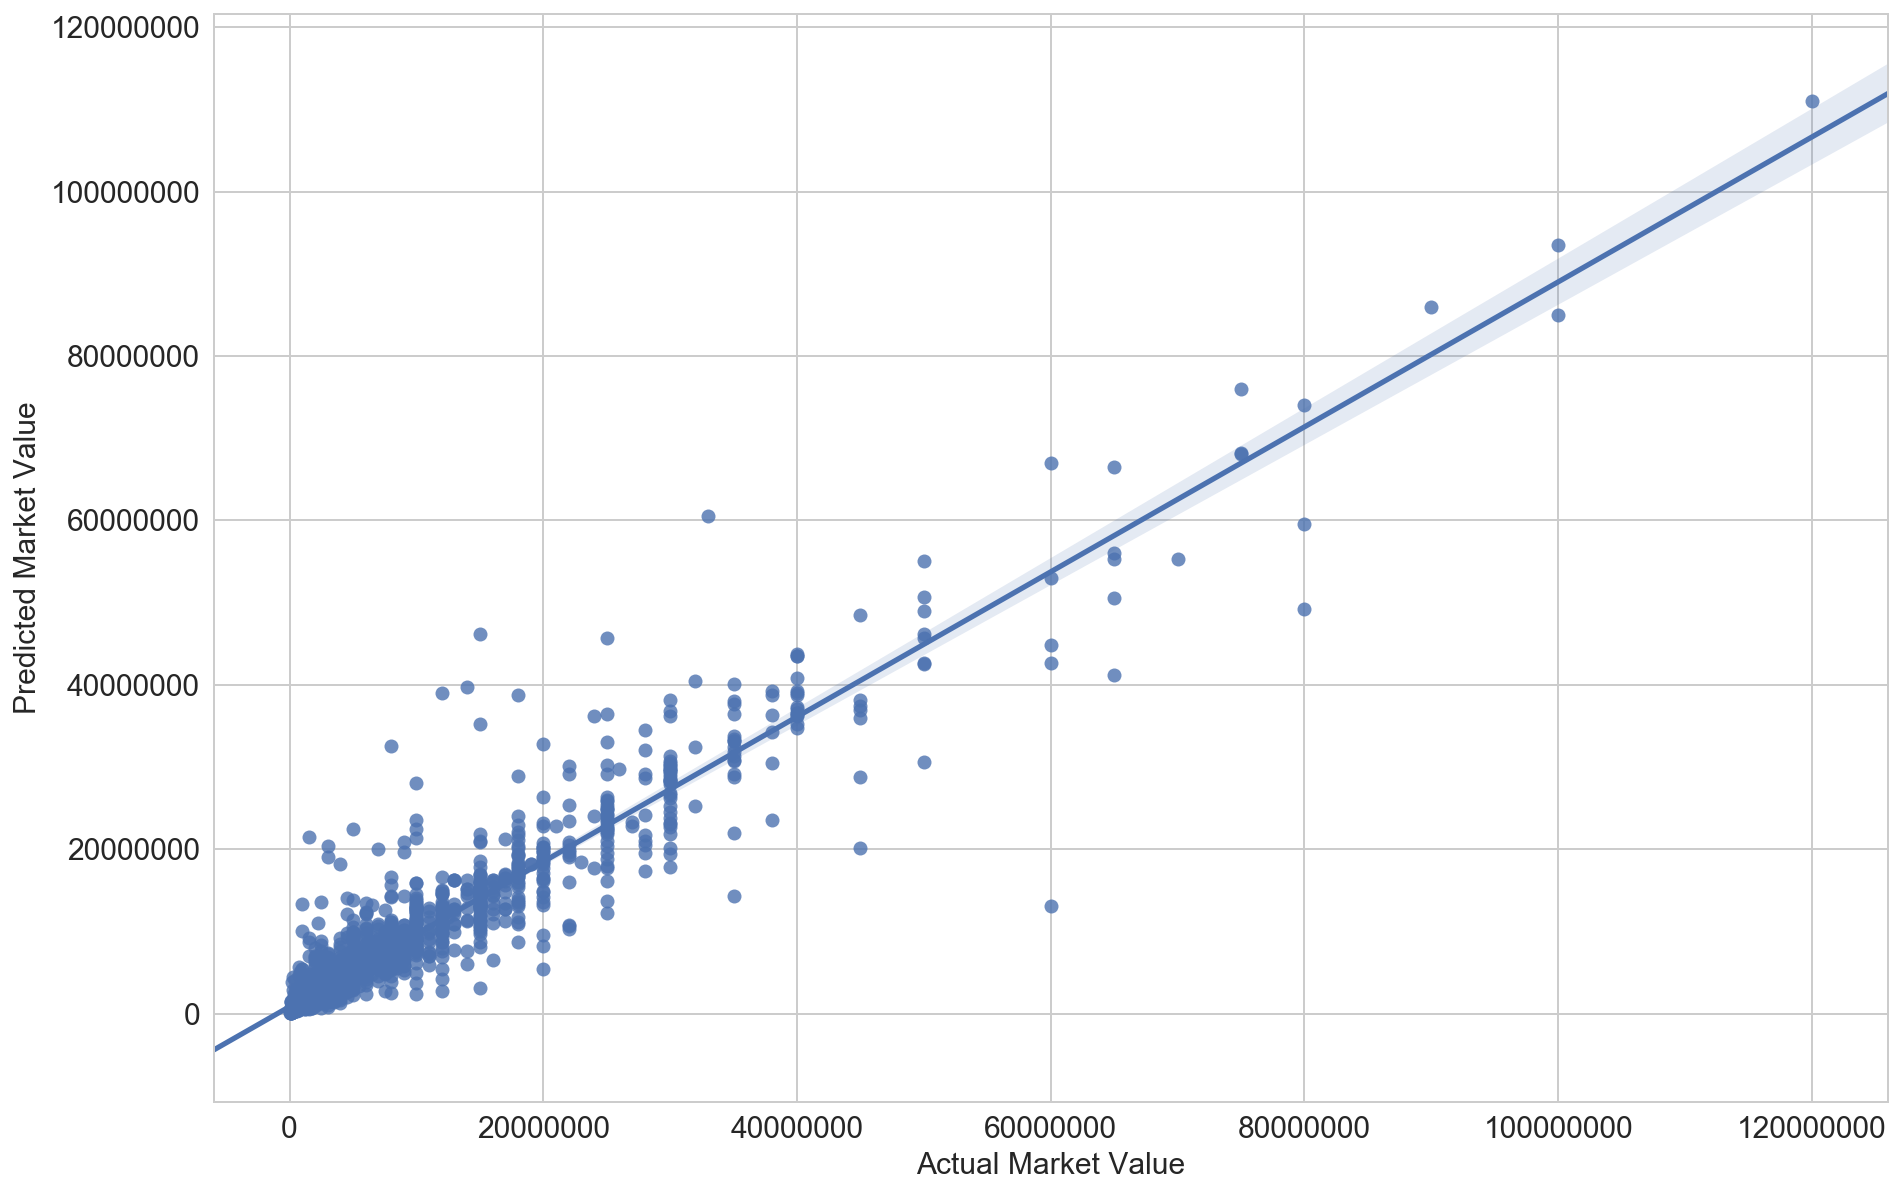

In [39]:
# Scatter plot unique actual market value vs predictions
plt.figure(figsize=(15,10))
ax = sns.regplot(x="marketval", y="predicted_mv", data=df)
ax.ticklabel_format(useOffset=False, style='plain')
ax.set_ylabel('Predicted Market Value', fontsize = 15)
ax.set_xlabel('Actual Market Value', fontsize = 15)
ax.tick_params(labelsize=15)

==== Australia ==== 



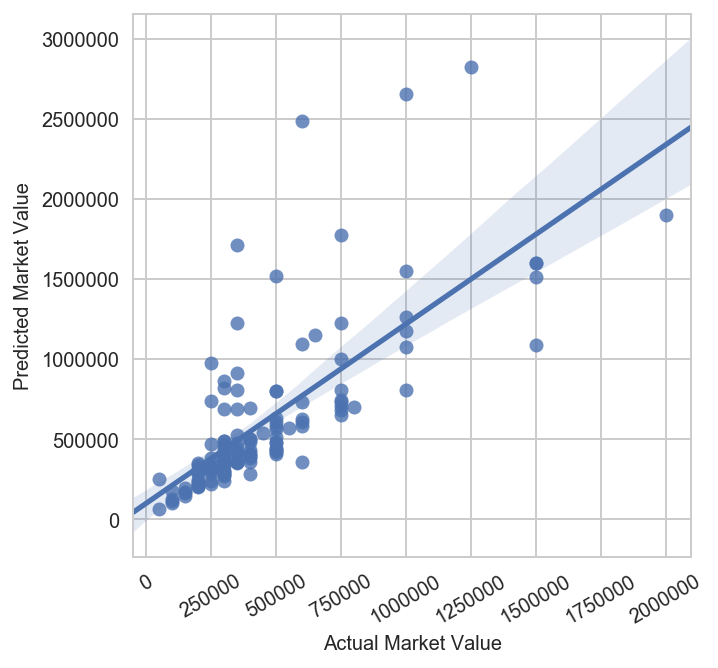

==== England ==== 



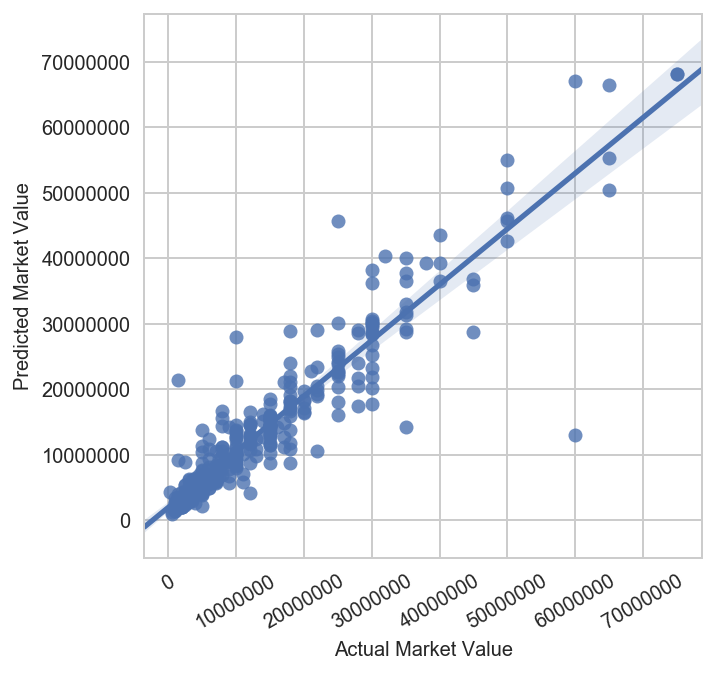

==== United States ==== 



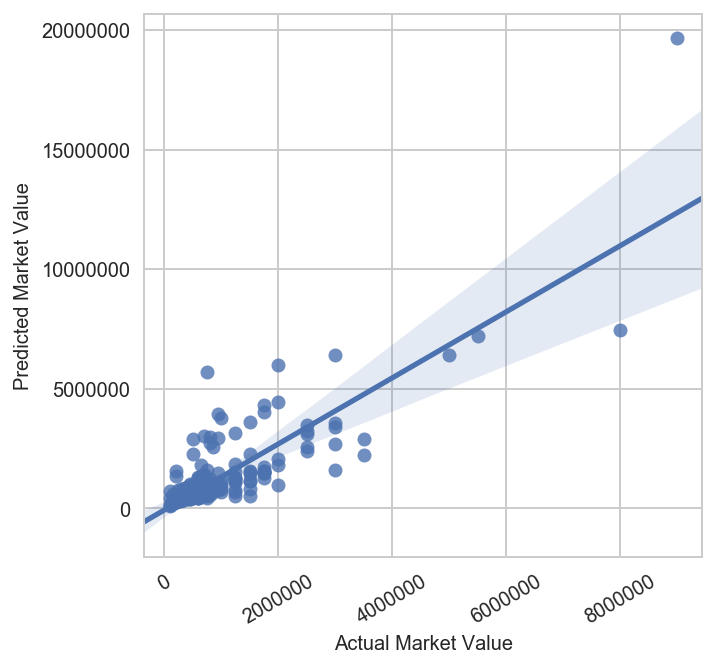

==== Turkey ==== 



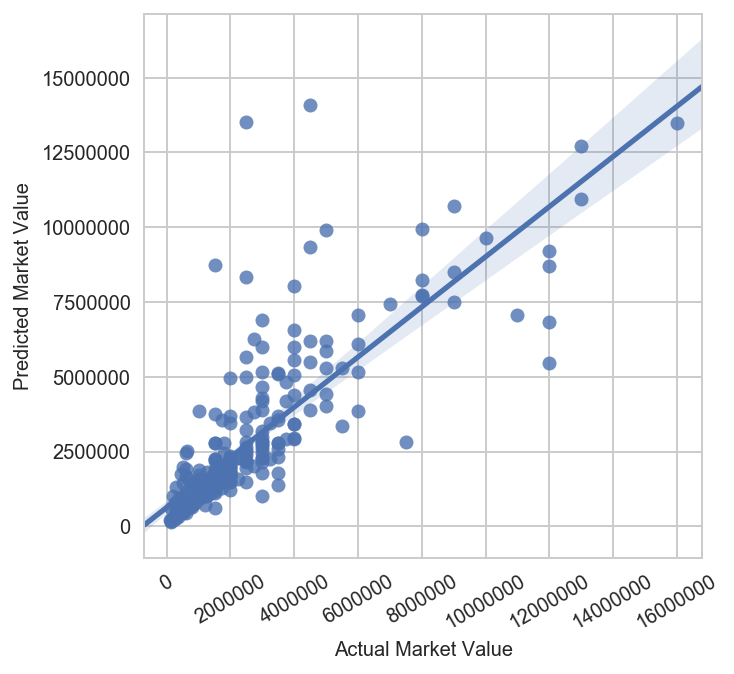

==== Netherlands ==== 



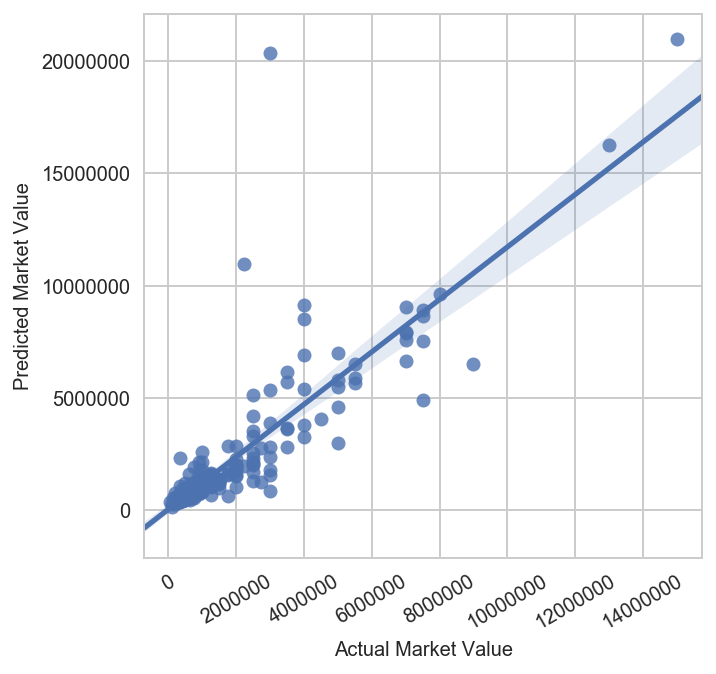

==== France ==== 



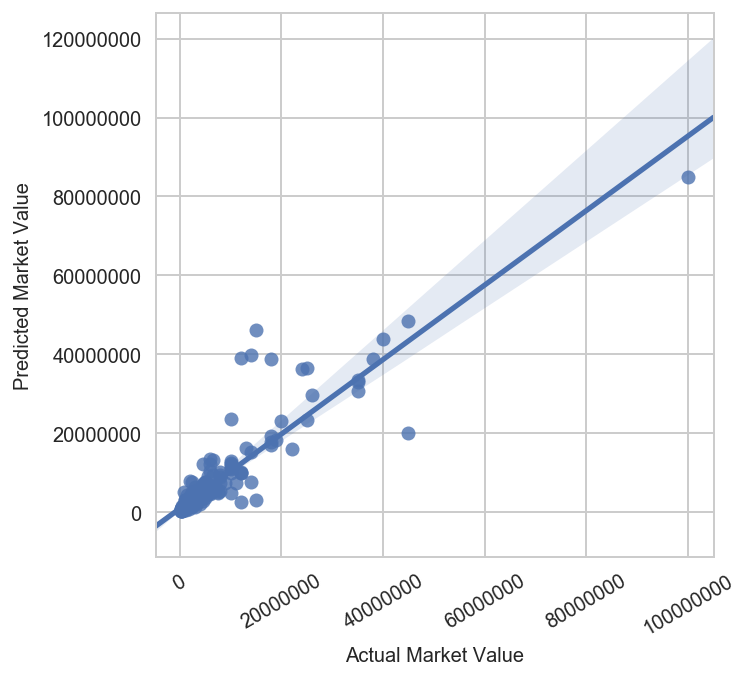

==== Spain ==== 



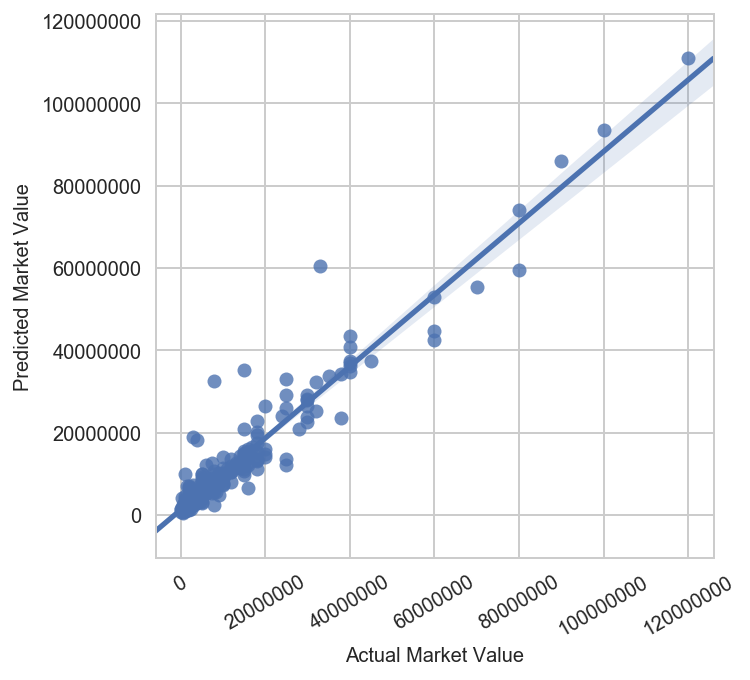

==== Italy ==== 



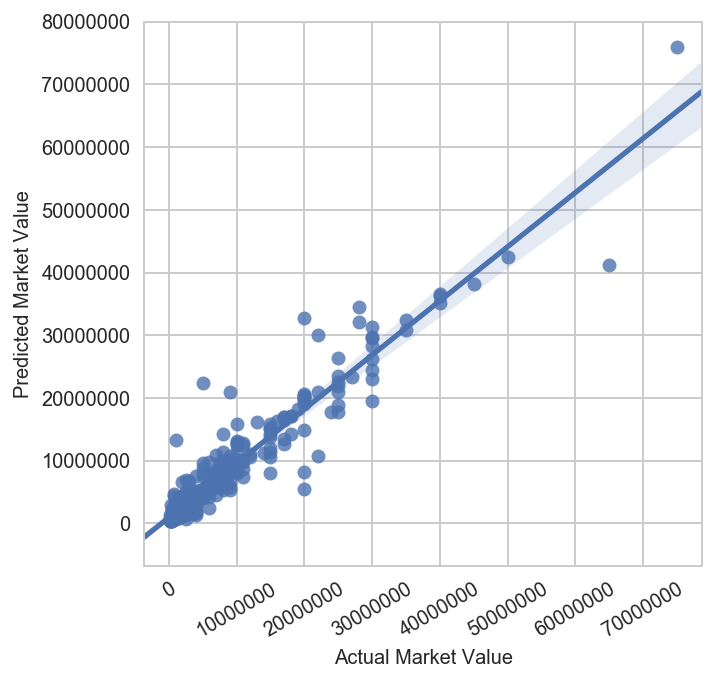

==== Germany ==== 



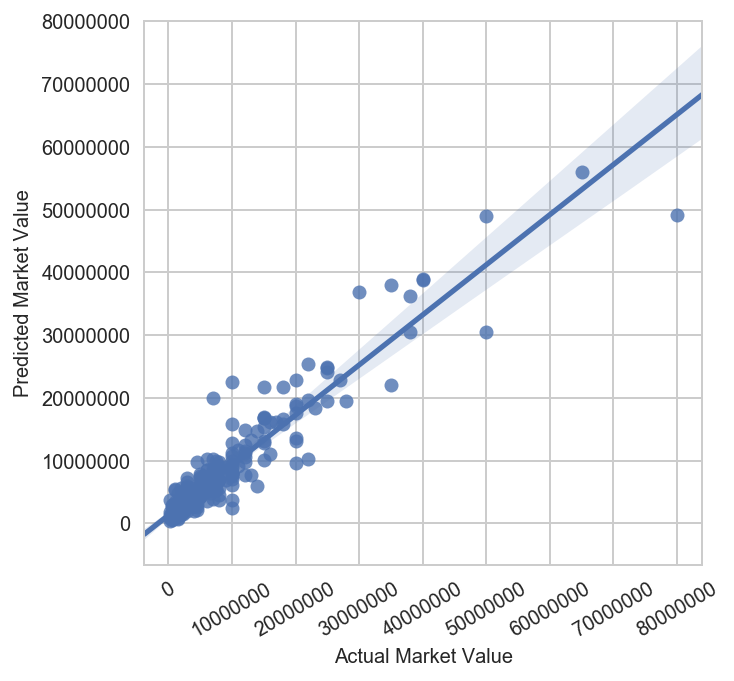

In [94]:
# Visualise results by league

country_names = df['country'].unique()

# Scatter plot unique actual market value vs predictions
for country in country_names:    
    print("==== {} ==== \n".format(country))
    plt.figure(figsize=(5,5))
    ax = sns.regplot(x="marketval", y="predicted_mv", data=df[df['country'] == country])
    ax.ticklabel_format(useOffset=False, style='plain')
    ax.set_ylabel('Predicted Market Value', fontsize = 10)
    plt.xticks(rotation=30)
    ax.set_xlabel('Actual Market Value', fontsize = 10)
    ax.tick_params(labelsize=10)
    plt.show()

In [ ]:
# Scatter plot unique actual market value vs predictions
plt.figure(figsize=(15,10))
ax = sns.regplot(x="age", y="m_1b_predictions", data=df)
ax.ticklabel_format(useOffset=False, style='plain')
ax.set_ylabel('Predicted Market Value', fontsize = 20)
ax.set_xlabel('Age', fontsize = 20)
ax.tick_params(labelsize=20)

In [43]:
df.columns

Index([                        u'pid',                    u'main_pos',
                          u'position',                         u'age',
                              u'foot',                   u'teamsince',
                       u'transferfee',                   u'marketval',
                     u'prevmarketval',                        u'year',
                           u'country',              u'marketval_2016',
                      u'country_2016',                   u'mins_2016',
                       u'points_2016',                   u'apps_2016',
                      u'assists_2016',                  u'goals_2016',
                          u'MPM_2016',                    u'PPM_2016',
                          u'GPM_2016',                 u'league_name',
                     u'ucl_2016_apps',                  u'MPG_career',
                        u'PPM_career',                 u'apps_career',
                    u'assists_career',                u'goals_career',
      

In [45]:
# Create dataframe to export

df_small = df[['marketval','predicted_mv','country','pid','age','score_2016','main_pos','apps_2016','goals_2016','foot']]
df_small = pd.merge(df_small,master_data[['pid','name']], how = "left", on = 'pid')
df_small.to_csv("small_test.csv", encoding="utf-8", index = False)

## <font color = "#f47741"> Model B: Create model to predict whether an increase in market value </font>

In [95]:
# Create column in dataframe which assesses the change in market value and then create an additional column
# which assesses whether this change was an increase

df['marketval_change'] = df['marketval'] - df['marketval_2016']
df['marketval_increase'] = df['marketval_change'].map(lambda x: 1 if x > 0 else 0)

### EDA on features potentially associated with increase in market value

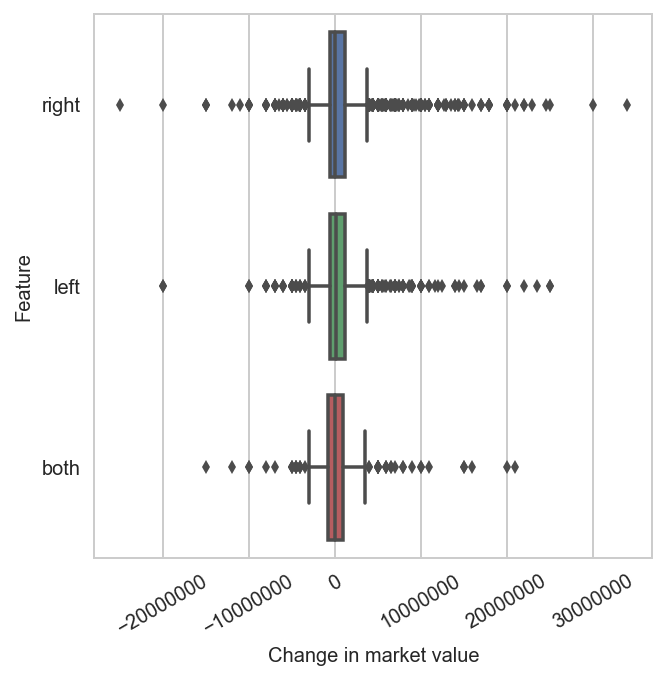

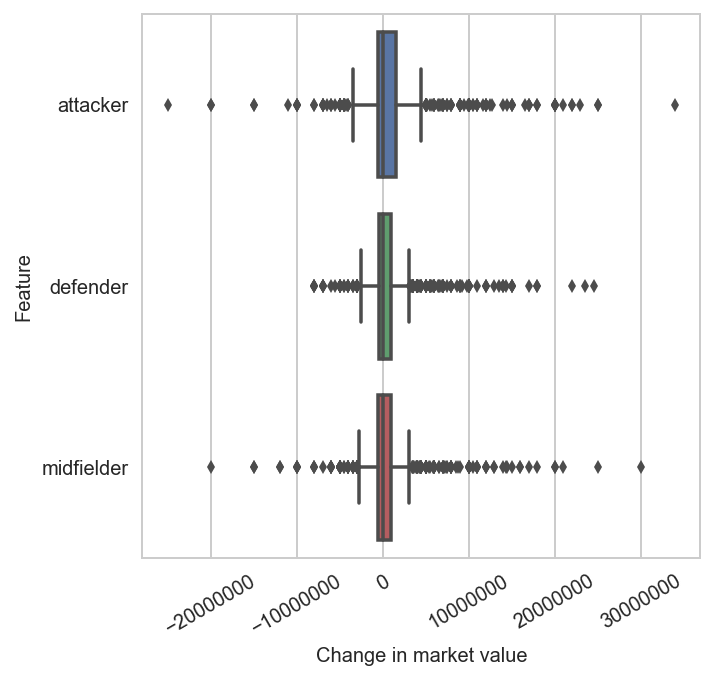

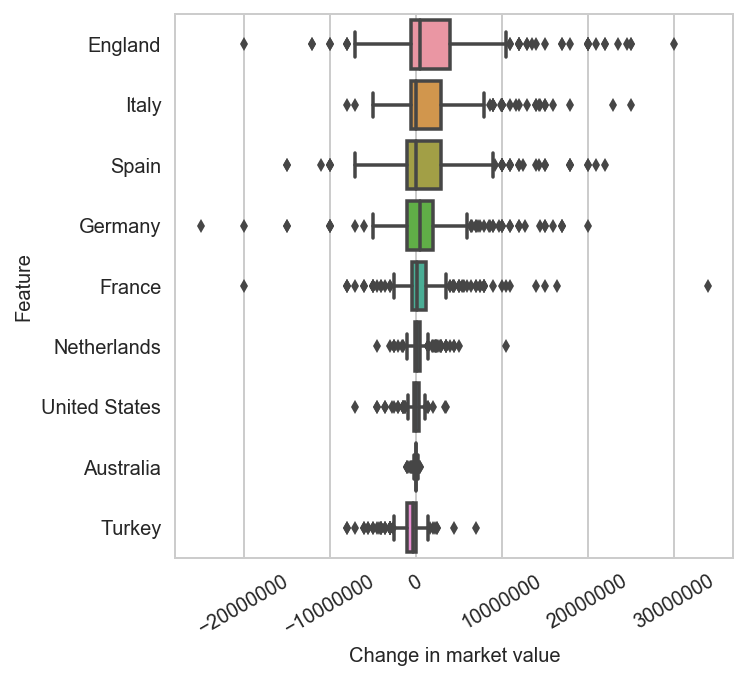

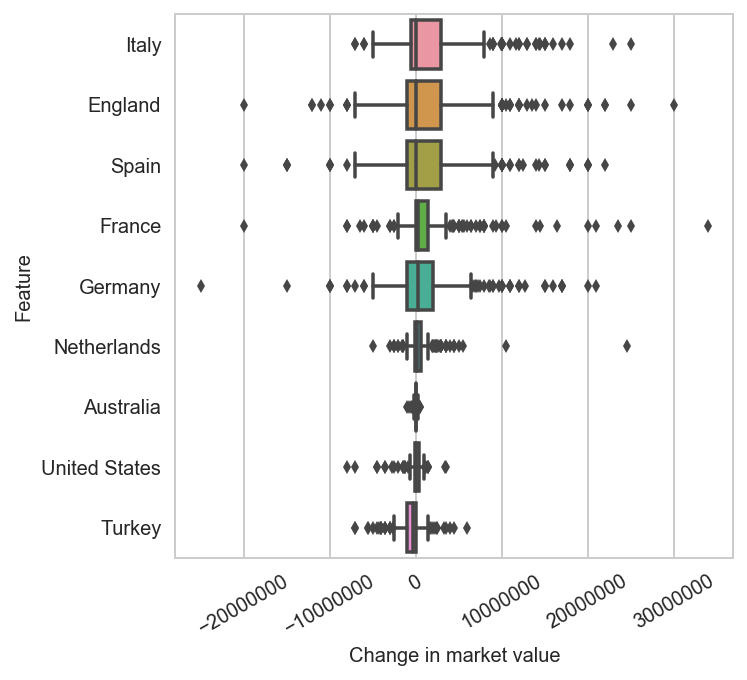

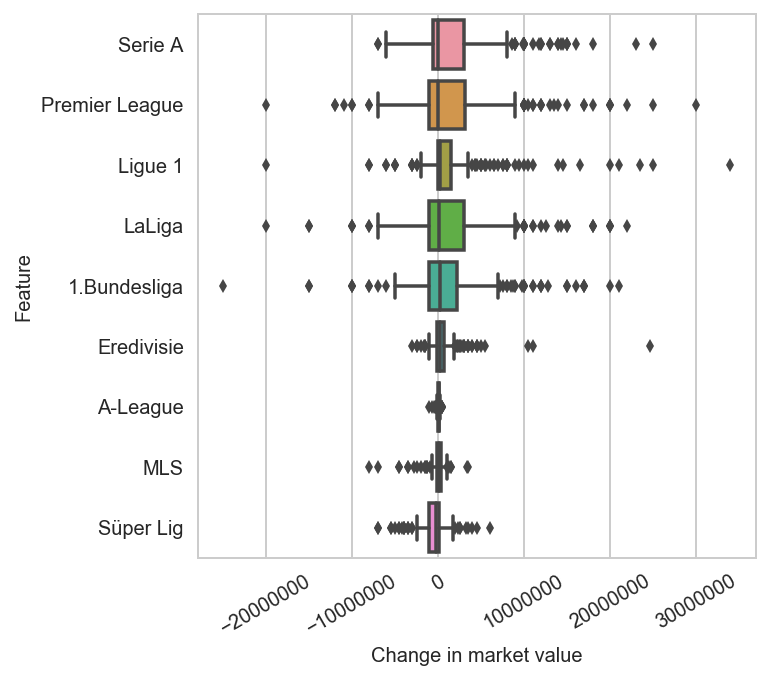

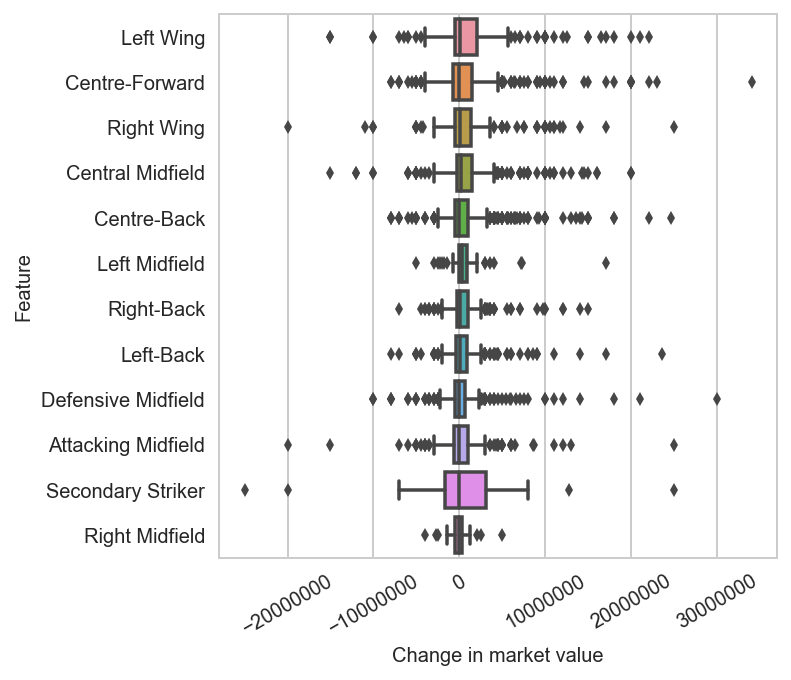

In [101]:
# Create box plots of features vs change in market value for categorical variables (ie the dummy variable categories)

for variable in dummy_variables_A:

    # Boxplot to explore market value by position
    xy = df.groupby([variable]).marketval_change.mean()
    xy_df = pd.DataFrame(xy)
    xy_df = xy_df.sort_values(by = 'marketval_change', ascending= False)
    sns.set_style('whitegrid')
    plt.figure(figsize=(5,5))
    plt.ticklabel_format(style='plain', axis='x')
    ax = sns.boxplot(y=variable, x="marketval_change", data=df, order = xy_df.index)
    ax.set_ylabel('Feature', fontsize = 10)
    ax.set_xlabel('Change in market value', fontsize = 10)
    plt.xticks(rotation=30)
    ax.tick_params(labelsize=10)

In [102]:
df.columns[0:50]

Index([u'pid', u'main_pos', u'position', u'age', u'foot', u'teamsince',
       u'transferfee', u'marketval', u'prevmarketval', u'year', u'country',
       u'marketval_2016', u'country_2016', u'mins_2016', u'points_2016',
       u'apps_2016', u'assists_2016', u'goals_2016', u'MPM_2016', u'PPM_2016',
       u'GPM_2016', u'league_name', u'ucl_2016_apps', u'MPG_career',
       u'PPM_career', u'apps_career', u'assists_career', u'goals_career',
       u'intl_caps', u'intl_goals', u'minutes_career', u'attack_2016',
       u'defense_2016', u'poss_2016', u'gk_2016', u'score_2016', u'height_s',
       u'weight', u'bmi', u'foot_left', u'foot_right', u'main_pos_defender',
       u'main_pos_midfielder', u'country_England', u'country_France',
       u'country_Germany', u'country_Italy', u'country_Netherlands',
       u'country_Spain', u'country_Turkey'],
      dtype='object')

==== mins_2016 ==== 



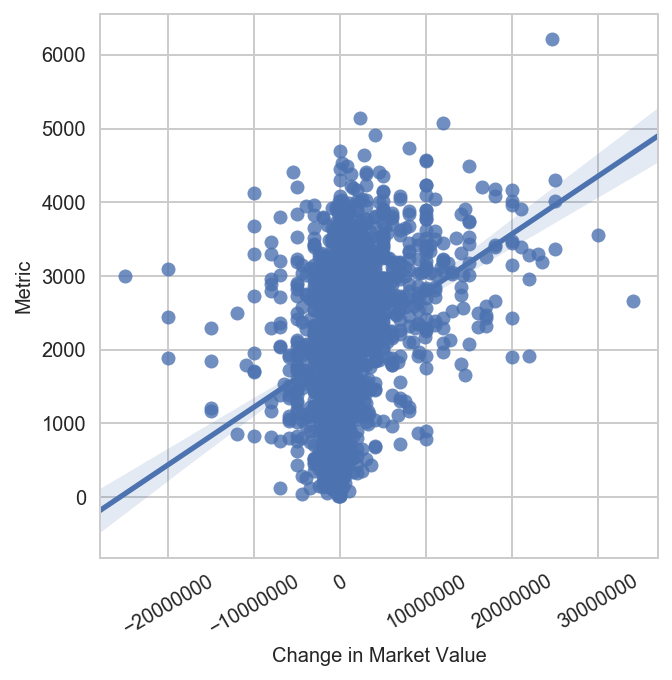

==== points_2016 ==== 



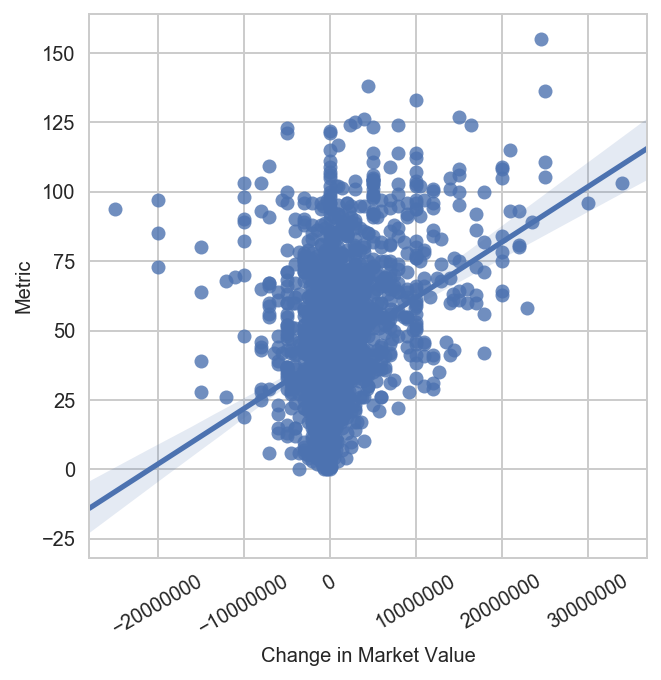

==== apps_2016 ==== 



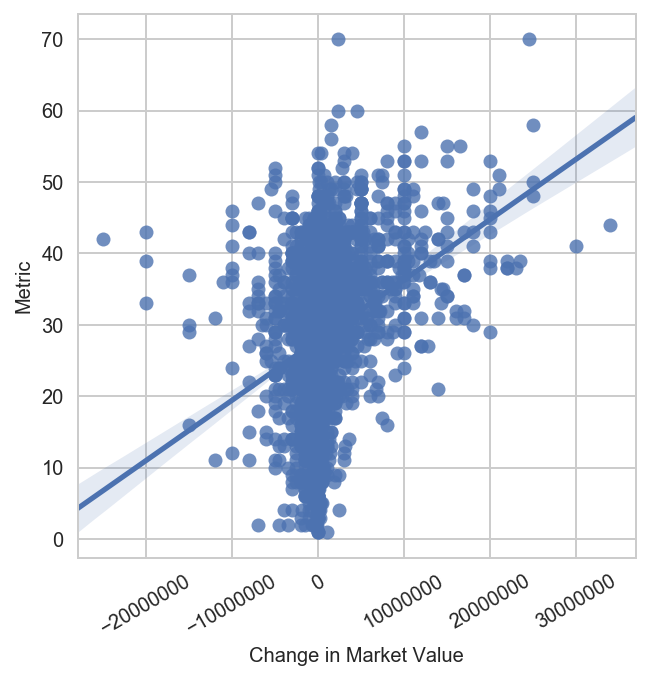

==== assists_2016 ==== 



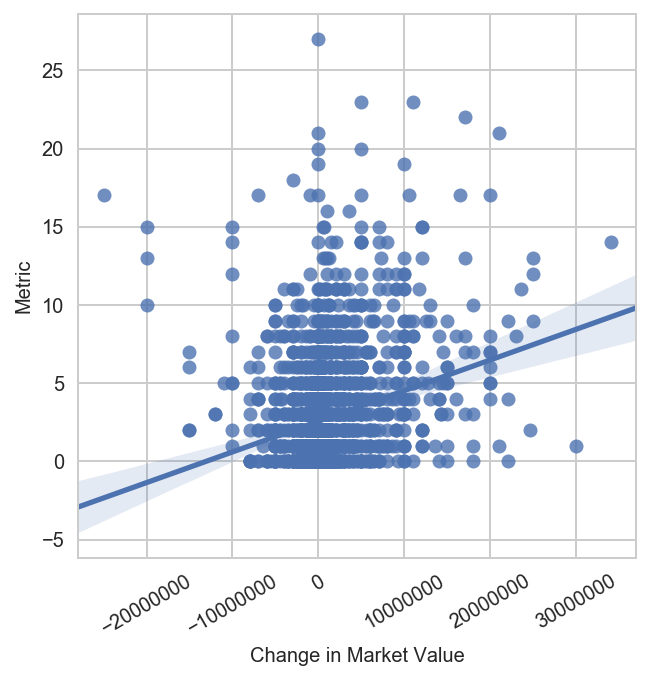

==== goals_2016 ==== 



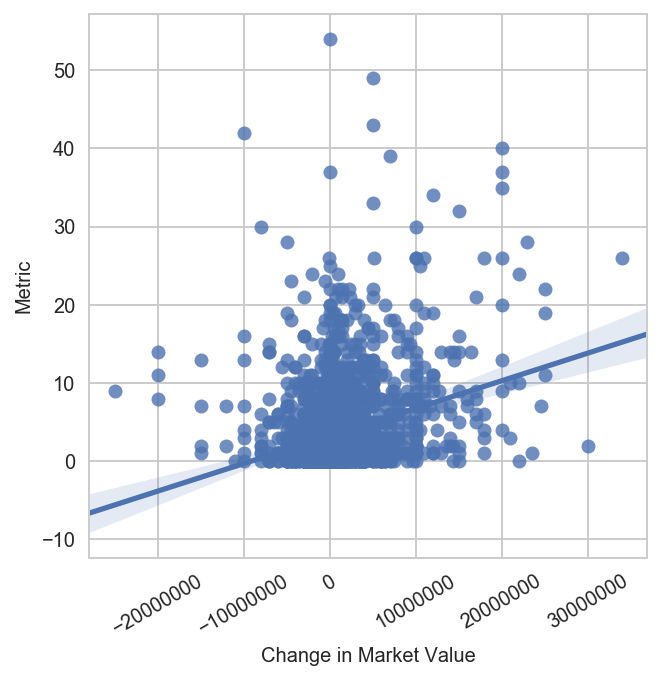

==== GPM_2016 ==== 



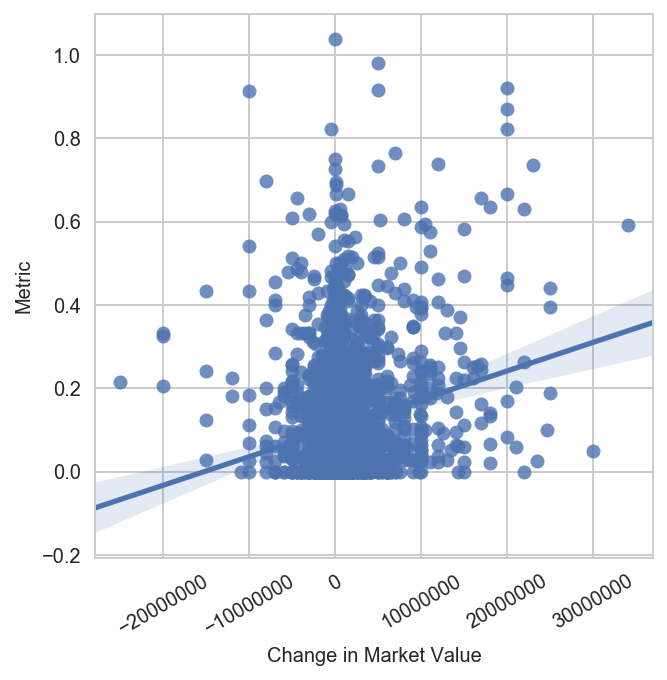

==== ucl_2016_apps ==== 



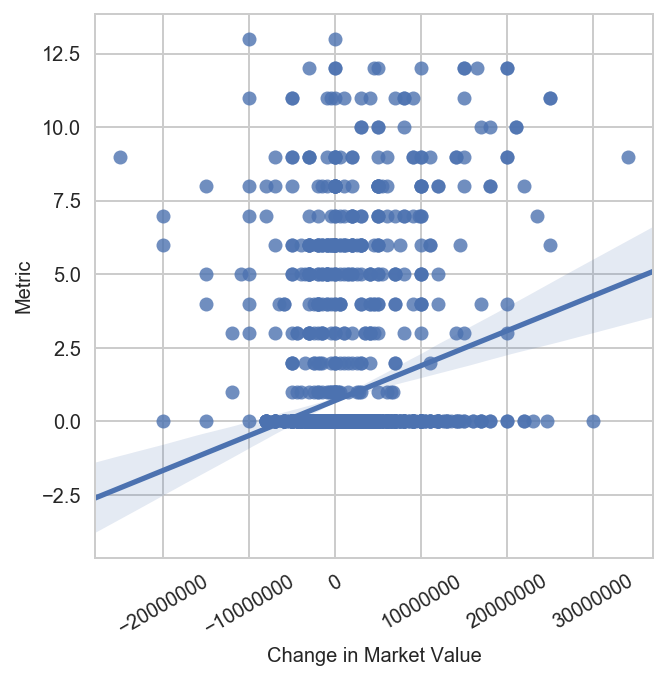

==== MPG_career ==== 



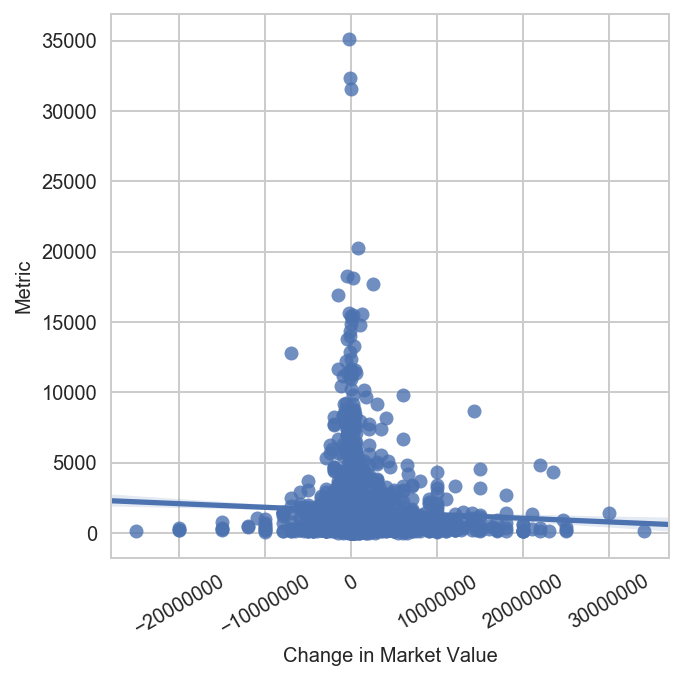

==== assists_career ==== 



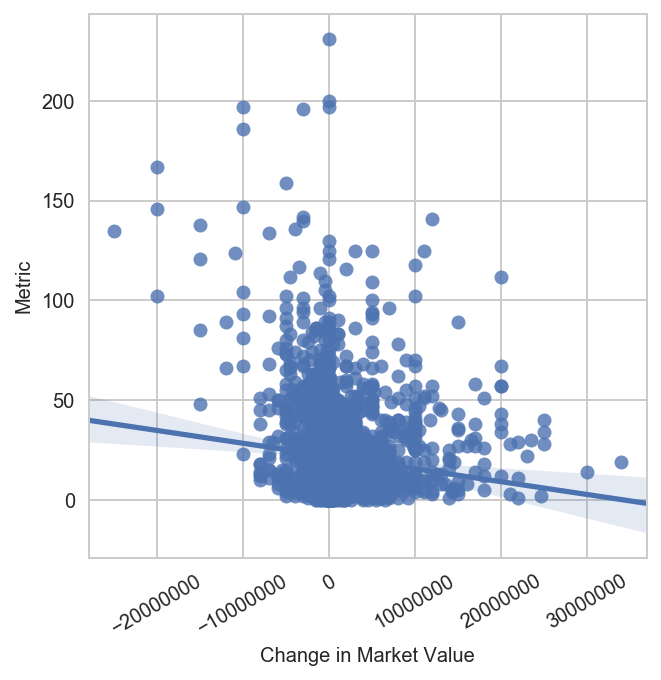

==== attack_2016 ==== 



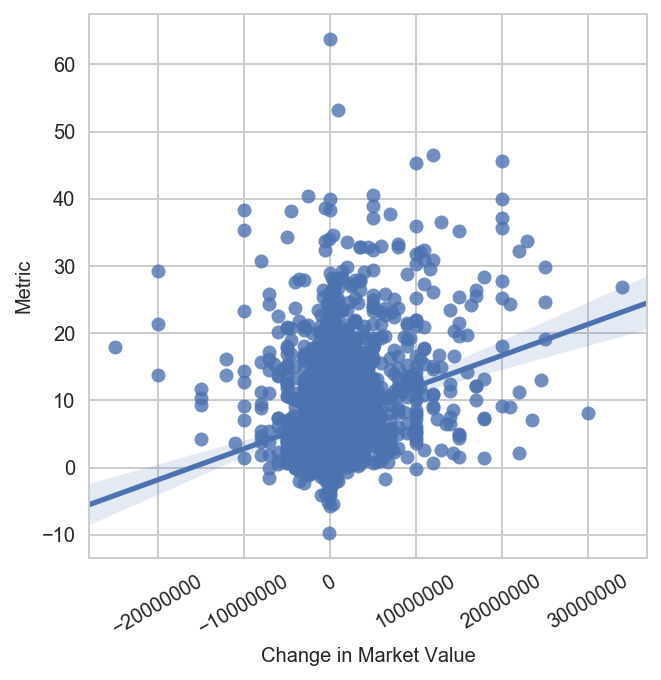

==== defense_2016 ==== 



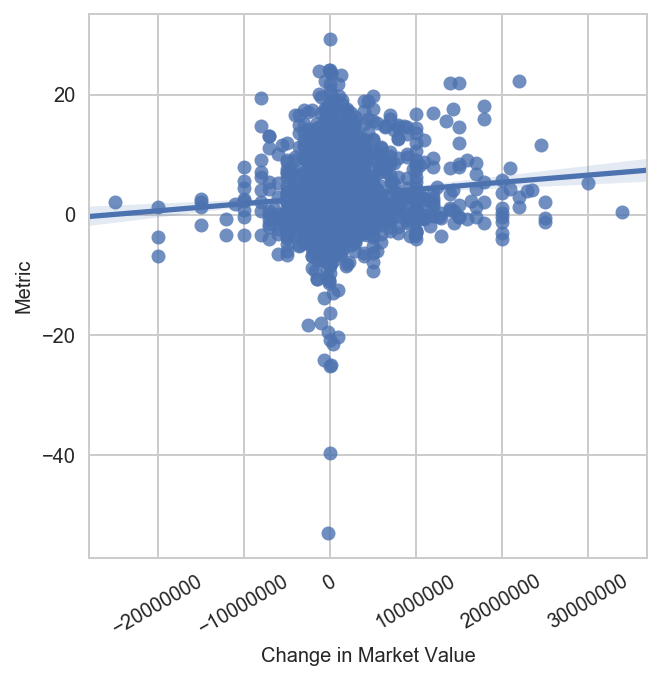

==== poss_2016 ==== 



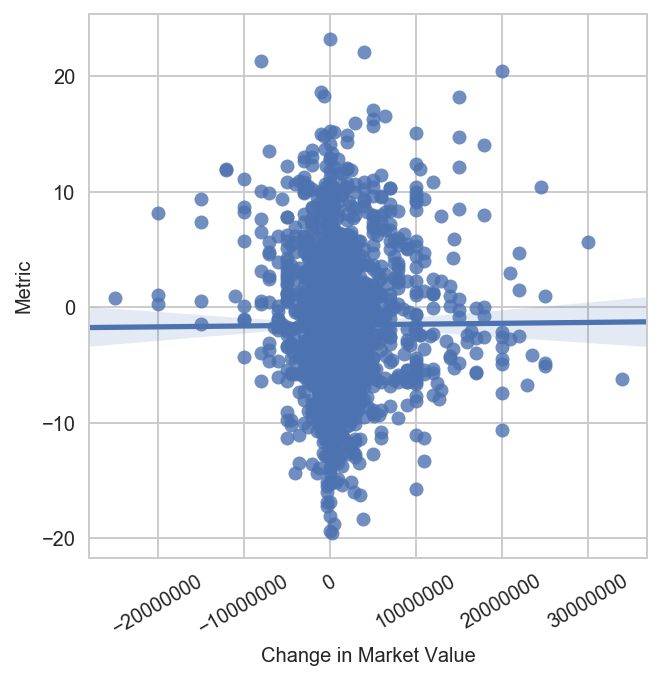

==== score_2016 ==== 



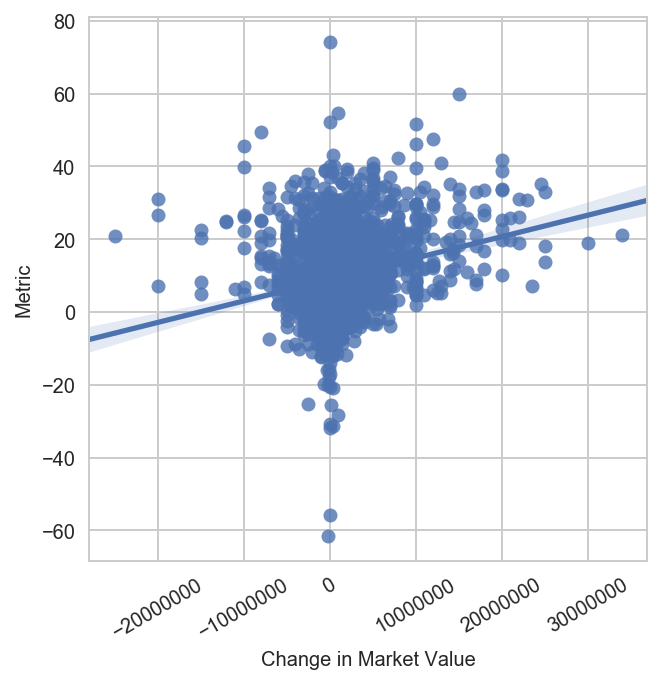

==== goals_career ==== 



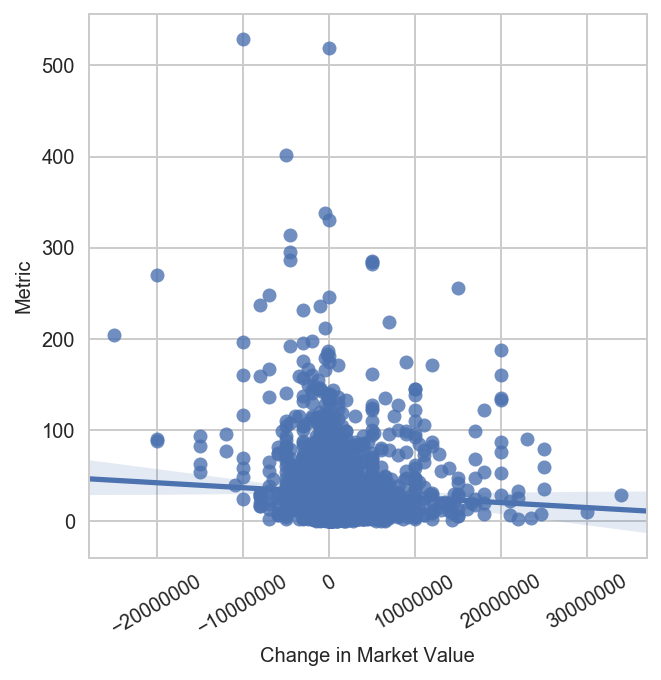

==== intl_caps ==== 



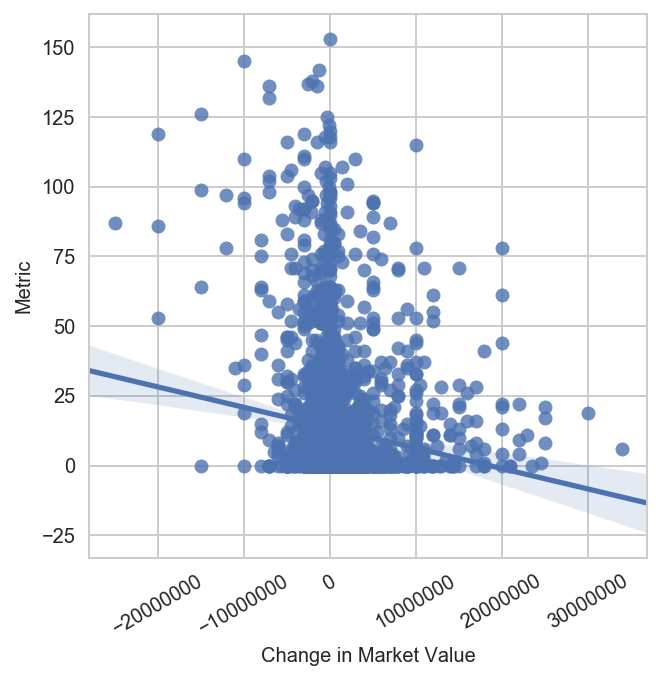

==== intl_goals ==== 



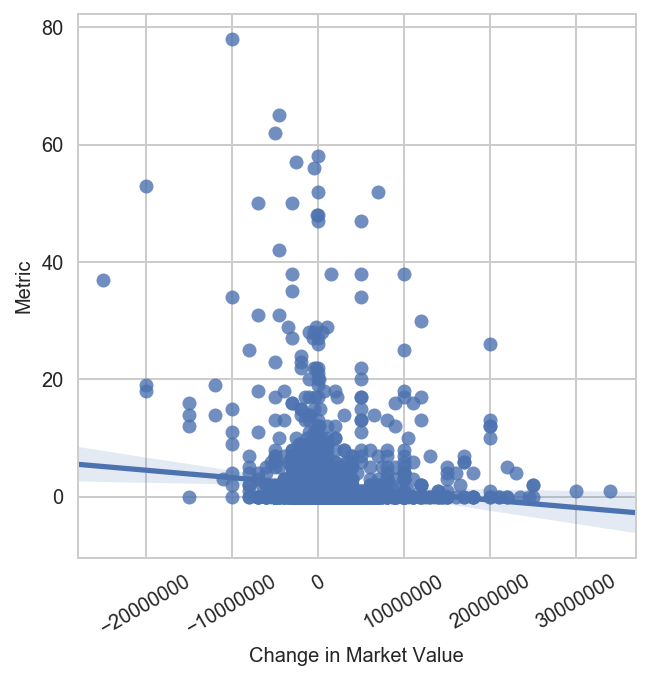

In [104]:
# Create scatter plots of features vs change in market value

performance_metrics = ['mins_2016','points_2016','apps_2016','assists_2016','goals_2016','GPM_2016',
                       'ucl_2016_apps','MPG_career','assists_career','attack_2016','defense_2016','poss_2016',
                       'score_2016','goals_career','intl_caps','intl_goals']

for metric in performance_metrics:  
    print("==== {} ==== \n".format(metric))
    plt.figure(figsize=(5,5))
    ax = sns.regplot(x="marketval_change", y=metric, data=df)
    ax.ticklabel_format(useOffset=False, style='plain')
    ax.set_ylabel('Metric', fontsize = 10)
    plt.xticks(rotation=30)
    ax.set_xlabel('Change in Market Value', fontsize = 10)
    ax.tick_params(labelsize=10)
    plt.show()

### Random Forest Classifier

In [138]:
# I will use the X_features predictor matrix already created in Model A 7

X_feature_names = [x for x in df.columns if x not in ['pid','teamsince','marketval','prevmarketval','year',
                                                      'marketval_2016','marketval_change','marketval_inc_predition',
                                                      'marketval_move','move_prediction',
                                                      'marketval_increase'] + dummy_variables_A + dummy_variables_B]
# Create predictor matrix
X_features = df[X_feature_names]

# Create target matrix
y = df['marketval_increase']

X_features = X_features.as_matrix().astype(np.float)
y = y.as_matrix().astype(np.float)

# Target will be whether market value has increased

# Split dataset into train and test dataset (stratifying on whether market value has increased)

train_x, test_x, train_y, test_y = train_test_split(X_features, df['marketval_increase'], random_state=26,
                                                        train_size=0.75, stratify = df['marketval_increase'] )

B_clf = RandomForestClassifier(n_estimators=30, max_depth=5, random_state=26)
trained_model = B_clf.fit(train_x, train_y)

predictions = trained_model.predict(test_x)
yhat_pp = B_clf.predict_proba(test_x)

print "Train Accuracy: ", accuracy_score(train_y, trained_model.predict(train_x))
print "Test Accuracy: ", accuracy_score(test_y, predictions)

df['marketval_inc_prediction'] = trained_model.predict(X_features)
conmat = np.array(confusion_matrix(test_y, predictions, labels=[1,0]))

confusion = pd.DataFrame(conmat, index=['increase', 'no_increase'],
                         columns=['predicted_increase','predicted_no_increse'])
confusion

Train Accuracy:  1.0
Test Accuracy:  0.844135802469


predicted_increase  predicted_no_increse
increase                    283                    41
no_increase                  60                   264

### Grid Search to find best Decision Tree Classifier

In [137]:
X_feature_names = [x for x in df.columns if x not in ['pid','teamsince','marketval','prevmarketval','year',
                                                      'marketval_2016','marketval_change','marketval_inc_predition',
                                                      'marketval_move','move_prediction',
                                                      'marketval_increase'] + dummy_variables_A + dummy_variables_B]

# Create predictor matrix
X_features = df[X_feature_names]

# Create target matrix
y = df['marketval_increase']

X_features = X_features.as_matrix().astype(np.float)
y = y.as_matrix().astype(np.float)

# Target will be whether market value has increased

# Split dataset into train and test dataset (stratifying on whether market value has increased)

train_x, test_x, train_y, test_y = train_test_split(X_features, df['marketval_increase'], random_state=26,
                                                        train_size=0.75, stratify = df['marketval_increase'] )

decision_tree_params = {
    'max_depth':[None,1,2,3,4],
    'max_features':[None,'log2','sqrt',2,3,4,5],
    'min_samples_split':[2,3,4,5,10,15,20,25,30,40,50]
}

# Initiate decision tree grid search
decision_tree_grid_search = GridSearchCV(DecisionTreeClassifier(), decision_tree_params, cv=5, verbose=1)

# Fit the decision tree to the prediction data and the target
decision_tree_grid_search.fit(train_x, train_y)

predict_y = decision_tree_grid_search.predict(test_x)

from sklearn.metrics import accuracy_score

print(accuracy_score(test_y, predict_y))

Fitting 5 folds for each of 385 candidates, totalling 1925 fits
0.844135802469


[Parallel(n_jobs=1)]: Done 1925 out of 1925 | elapsed:   10.6s finished


### K Neighbours Classifier model

In [191]:
# Create a new column which assigns categorises whether the market value has increased, decreased or remained the same

def assess_change(value):
    if value < 0:
        return 0
    elif value == 0:
        return 1
    elif value > 0:
        return 2
    
df['marketval_move'] = df['marketval_change'].apply(assess_change)

In [139]:
X_feature_names = [x for x in df.columns if x not in ['pid','teamsince','marketval','prevmarketval','year',
                                                      'marketval_2016','marketval_change','marketval_inc_predition',
                                                      'marketval_move','move_prediction',
                                                      'marketval_increase'] + dummy_variables_A + dummy_variables_B]
# Create predictor matrix
X_features = df[X_feature_names]

# Create target matrix
y = df['marketval_move']

X_features = X_features.as_matrix().astype(np.float)
y = y.as_matrix().astype(np.float)

# Target will be whether market value has increased

# STEP 1: Split dataset into train and test dataset (stratifying on whether market value has increased)

X_train, X_test, y_train, y_test = train_test_split(X_features, df['marketval_move'], random_state=26,
                                                        train_size=0.75, stratify = df['marketval_move'] )

# STEP 2: train the model on the training set (using K=1)
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

# STEP 3: test the model on the testing set, and check the accuracy
y_pred_class = knn.predict(X_test)

print("Accuracy score of model: {}".format(metrics.accuracy_score(y_test, y_pred_class)))

df['move_prediction'] = knn.predict(X_features)

Accuracy score of model: 0.429012345679


In [140]:
X_feature_names = [x for x in df.columns if x not in ['pid','teamsince','marketval','prevmarketval','year',
                                                      'marketval_2016','marketval_change',
                                                      'marketval_increase'] + dummy_variables_A + dummy_variables_B]

# Create predictor matrix
X_features = df[X_feature_names]

# Create target matrix
y = df['marketval_move']

X_features = X_features.as_matrix().astype(np.float)
y = y.as_matrix().astype(np.float)

# Target will be whether market value has increased

# Split dataset into train and test dataset (stratifying on whether market value has increased)

train_x, test_x, train_y, test_y = train_test_split(X_features, df['marketval_move'], random_state=26,
                                                        train_size=0.75, stratify = df['marketval_move'] )

decision_tree_params = {
    'max_depth':[None,1,2,3,4],
    'max_features':[None,'log2','sqrt',2,3,4,5],
    'min_samples_split':[2,3,4,5,10,15,20,25,30,40,50]
}

# Initiate decision tree grid search
decision_tree_grid_search = GridSearchCV(DecisionTreeClassifier(), decision_tree_params, cv=5, verbose=1)

# Fit the decision tree to the prediction data and the target
decision_tree_grid_search.fit(train_x, train_y)

predict_y = decision_tree_grid_search.predict(test_x)

print(accuracy_score(test_y, predict_y))

Fitting 5 folds for each of 385 candidates, totalling 1925 fits
0.429012345679


[Parallel(n_jobs=1)]: Done 1925 out of 1925 | elapsed:   10.9s finished


In [175]:
# Add prediction to dataframe

move_matrix = df.groupby(by = 'marketval_move').count()[['marketval']]

level_names = [0,1,2]
level_values = [0,1,2]
level_combo = zip(level_names,level_values)

for name, value in level_combo:
    list_of_values = []
    for num in move_matrix.index:
        # Create temporary dataframe which only stores actual level value and predicted level value
        temp_df = df[ (df['marketval_move'] == num) & (df['move_prediction'] == value)]
        # Append the length of this dataframe as the number of matched results
        list_of_values.append(temp_df.shape[0])
    move_matrix[name] = list_of_values
    
move_matrix.index = ['Market value decrease','No change', 'Market value increase']
move_matrix.columns = ['Actual change', 'Predicted decrease','Predicted no change','Predicted increase']

In [176]:
move_matrix

Actual change  Predicted decrease  Predicted no change  \
Market value decrease            931                 779                   40   
No change                        363                  38                  283   
Market value increase           1296                  88                   50   

                       Predicted increase  
Market value decrease                 112  
No change                              42  
Market value increase                1158

### It's difficult to determine what the most important features are, so implement a feature selection method

In [203]:
X_feature_names = [x for x in df.columns if x not in ['pid','teamsince','marketval','prevmarketval','year',
                                                      'marketval_2016','marketval_change','market_move',
                                                      'marketval_increase'] + dummy_variables_A + dummy_variables_B]

# Create predictor matrix
X_features = df[X_feature_names]

# Create target matrix
y = df['marketval_move']

X_features = X_features.as_matrix().astype(np.float)
y = y.as_matrix().astype(np.float)

# ss = StandardScaler()
# X_s = pd.DataFrame(ss.fit_transform(X_features))

scaler = MinMaxScaler(copy=True, feature_range=(0, 1))
scaler.fit(X_features)
X_s = scaler.transform(X_features)

# Target will be whether market value has increased

# Split dataset into train and test dataset (stratifying on whether market value has increased)

train_x, test_x, train_y, test_y = train_test_split(X_s, df['marketval_move'], random_state=26,
                                                        train_size=0.75, stratify = df['marketval_move'] )

# Build a SelectK best selector, assessing both F classif and chi
skb_f = SelectKBest(f_classif, k=5)
skb_chi2 = SelectKBest(chi2, k=5)

# train the selector on our data
skb_f.fit(X_s, y)
skb_chi2.fit(X_s, y)

# examine results
kbest = pd.DataFrame([X_feature_names, list(skb_f.scores_), list(skb_chi2.scores_)], 
                     index=['feature','f_classif','chi2 score']).T.sort_values('chi2 score', ascending=False)
kbest[0:20]

feature f_classif chi2 score
87  marketval_inc_prediction 7388.7188  1085.0471
88            marketval_move       inf   953.4188
89           move_prediction 1961.1606   560.5872
36            country_Turkey   53.6116    91.1760
44       country_2016_Turkey   48.4112    83.8774
53     league_name_Süper Lig   37.4131    65.8638
78                  age_32.0   30.9250    57.5572
79                  age_33.0   25.8319    49.0664
80                  age_34.0   22.7837    43.8958
66                  age_20.0   22.3932    42.3565
77                  age_31.0   21.6035    40.3617
46      league_name_A-League   20.9697    39.4198
90               age_strings  256.0585    37.5204
68                  age_22.0   18.8725    34.8294
69                  age_23.0   18.9676    34.6556
12               apps_career  176.3759    27.5297
81                  age_35.0   12.8513    25.1644
17            minutes_career  141.1006    23.9296
82                  age_36.0   11.8779    23.3758
39       country_2016_France   13.2969    23.1994

In [204]:
# Based on the top 100 features from Chi2 - re-run the K Nearest Neighbours model

# Set up move as the target

y = df['marketval_move']

# Set up predictor matrix

selected_features = [x for x in kbest[0:100]['feature']]
                                
X_new = df[selected_features].copy()

In [226]:
# STEP 1: split X and y into training and testing sets (using random_state for reproducibility)
X_train, X_test, y_train, y_test = train_test_split(X_new, y, random_state=99,
                                                    test_size=0.25, stratify = y)

# STEP 2: train the model on the training set (using K=1)
knn3 = KNeighborsClassifier(n_neighbors=1)
knn3.fit(X_train, y_train)

# STEP 3: test the model on the testing set, and check the accuracy
y_pred_class = knn3.predict(X_test)

print("Accuracy score of model: {}".format(metrics.accuracy_score(y_test, y_pred_class)))

df['marketval_move_new_prediction'] = knn3.predict(X_new)

Accuracy score of model: 0.449074074074


In [227]:
# Add prediction to dataframe

move_matrix_2 = df.groupby(by = 'marketval_move').count()[['marketval']]

level_names = [0,1,2]
level_values = [0,1,2]
level_combo = zip(level_names,level_values)

for name, value in level_combo:
    list_of_values = []
    for num in move_matrix_2.index:
        # Create temporary dataframe which only stores actual level value and predicted level value
        temp_df = df[ (df['marketval_move'] == num) & (df['marketval_move_new_prediction'] == value)]
        # Append the length of this dataframe as the number of matched results
        list_of_values.append(temp_df.shape[0])
    move_matrix_2[name] = list_of_values
    
move_matrix_2.index = ['Market value decrease','No change', 'Market value increase']
move_matrix_2.columns = ['Actual change', 'Predicted decrease','Predicted no change','Predicted increase']
move_matrix_2

Actual change  Predicted decrease  Predicted no change  \
Market value decrease            931                 799                   36   
No change                        363                  35                  285   
Market value increase           1296                  99                   48   

                       Predicted increase  
Market value decrease                  96  
No change                              43  
Market value increase                1149

# <font color = "#7742f4"> Inference and use of model </font>

Some of the **key financial objectives** of player management at a football club relates to:
   1. Value for money (i.e. identifying players that are likely to increase in value, ensuring the club is not over-paying for a footballer relative to their ability, identifying players that may be undervalued relative to their performance)<br><br>
   2. Maximising income for player sales (i.e. ensuring the club is being **fairly** compensated for any player sale)<br><br>
   3. Consider any future expected increase of player market values when negotiating with existing players to extend contracts (i.e. if the club has intentions of making money from the sale of the player in the future, consider factors which indicate whether a player's market value is more likely to increase rather than decrease)

### <font color = "#f48342">1. Value for money</font>

a. The market value prediction model is able to predict the market value of players with an accuracy of **70%**.  Accordingly, players which have a predicted value above the published market value _may_ indicate that they are currently under-valued & represent a good opportunity to acquire a player that is 'good value for money'.

b. The market value database on TransferMarkt.com is largely based on actual market values that are updated when a player moves to a new club or during an end of season update.  Accordingly, the prediction model presents an opprotunity to obtain an updated player value ahead of time. This can assist with clubs making timely, better informed, competitive offers for players.

c. In conjuction with the model, an interactive dashboard has been developed that identifies potentially under / over valued players and their associated recent performance.

### <font color = "#f48342">2. Maximising income for player sales</font>

Using the market value prediction model, a club is able to obtain an updated player market value to better inform the club during any player sale negotiation.

### <font color = "#f48342">3. Consider potential future movement in existing player market values</font>

Players can be considered a valuable asset for football clubs, whereby they can be acquired and developed relatively cheaply and then sold to another club for a profit. Various data visualisations may be able to identify player attributes which indicate whether a player is likely to continue increasing in value or may be expected to decrease in value.

#### Visualise whether there is a relationship between age and market value change

In [170]:
df['age_strings'] = df['age'].astype('category')

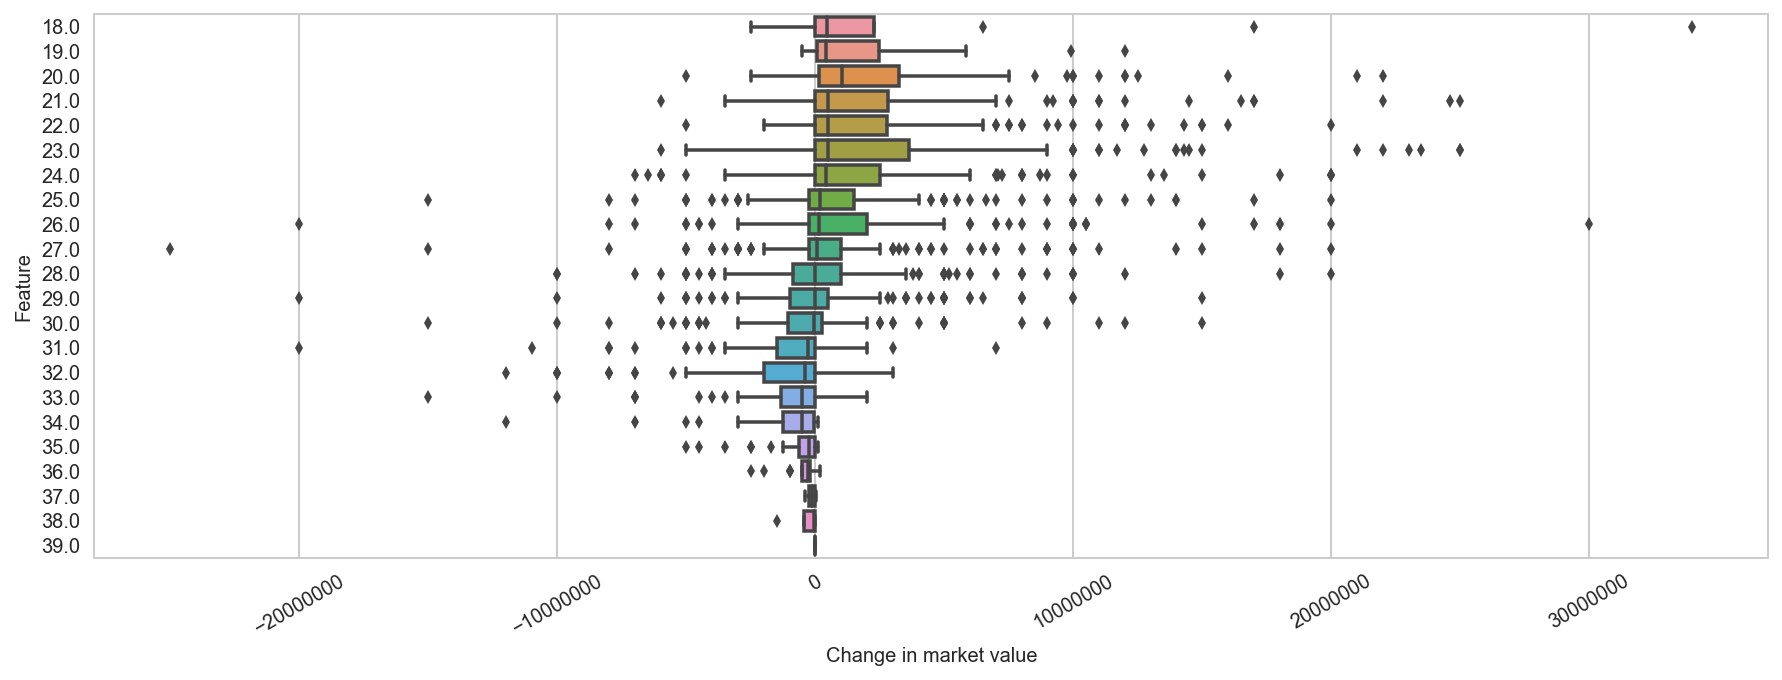

In [169]:
# Create box plots of features vs change in market value for categorical variables (ie the dummy variable categories)

for variable in ['age_strings']:

    # Boxplot to explore market value by position
    xy = df.groupby([variable]).marketval_change.mean()
    xy_df = pd.DataFrame(xy)
    xy_df = xy_df.sort_values(by = 'marketval_change', ascending= False)
    sns.set_style('whitegrid')
    plt.figure(figsize=(15,5))
    plt.ticklabel_format(style='plain', axis='x')
    ax = sns.boxplot(y=variable, x="marketval_change", data=df)
    ax.set_ylabel('Feature', fontsize = 10)
    ax.set_xlabel('Change in market value', fontsize = 10)
    plt.xticks(rotation=30)
    ax.tick_params(labelsize=10)

defender


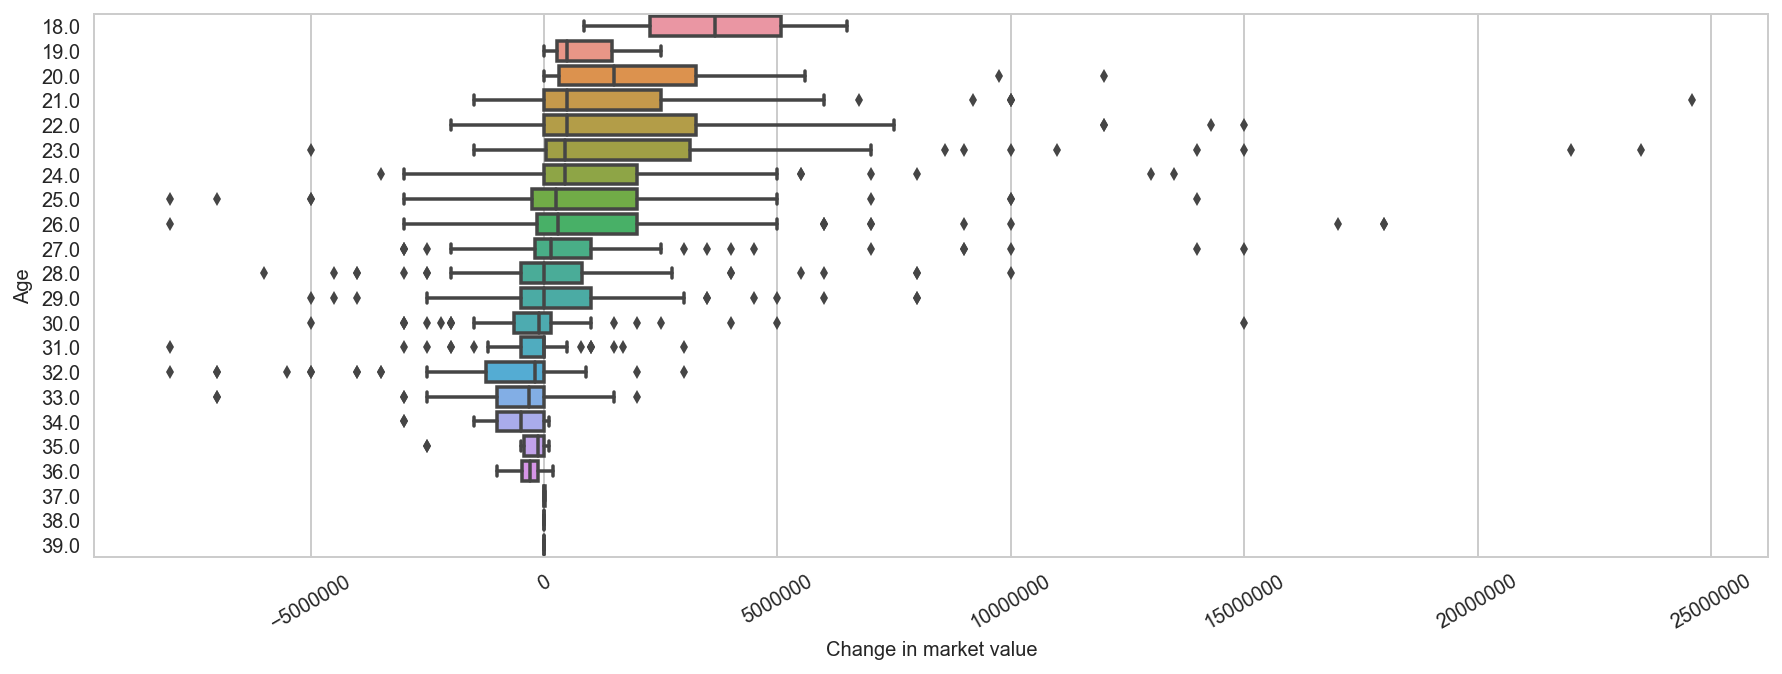

midfielder


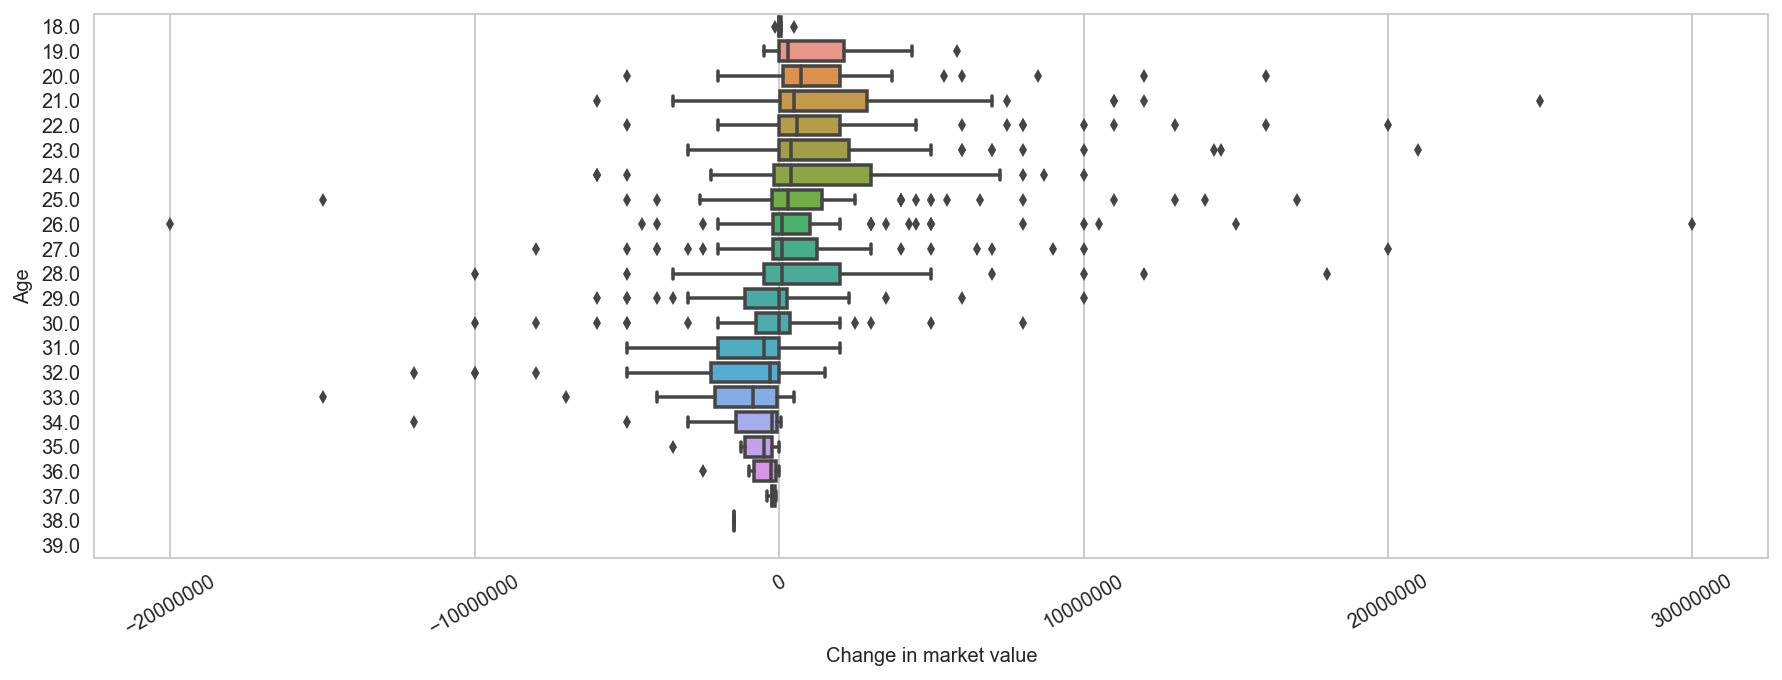

attacker


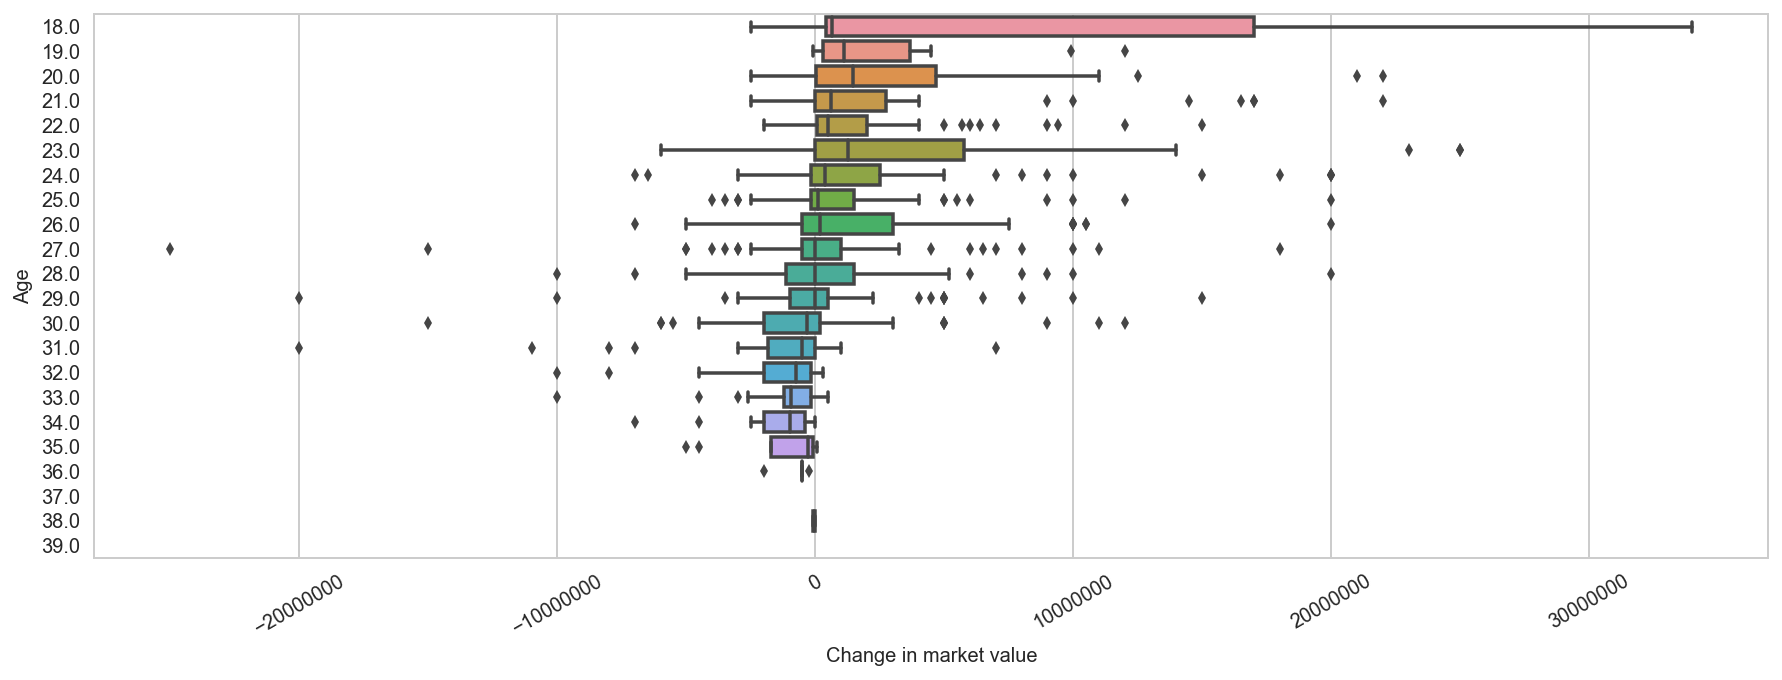

In [166]:
# Create box plots of features vs change in market value for categorical variables (ie the dummy variable categories)

for variable in ['age_strings']:
    for position in df['main_pos'].unique():
        # Boxplot to explore market value by position
        print(position)
        xy = df.groupby([variable]).marketval_change.mean()
        xy_df = pd.DataFrame(xy)
        xy_df = xy_df.sort_values(by = 'marketval_change', ascending= False)
        sns.set_style('whitegrid')
        plt.figure(figsize=(15,5))
        plt.ticklabel_format(style='plain', axis='x')
        ax = sns.boxplot(y=variable, x="marketval_change", data=df[df['main_pos'] == position])
        ax.set_ylabel('Age', fontsize = 10)
        ax.set_xlabel('Change in market value', fontsize = 10)
        plt.xticks(rotation=30)
        ax.tick_params(labelsize=10)
        plt.show()

The above box plots indicate the players across all positions are generally likely to continue increasing in value until around 27 to 28 years old. The market value of attackers appears to increase more significantly earlier in their careers whilst midfielder market values are likely to keep increasing later in their careers.

#### Chi2 test to validate that after the age of 28, market value does not increase (i.e. stays same or decreases)

In [239]:
# Create new column in data frame that assesses 28 and younger (young) or 29 and older (old)

df['age_group'] = df['age'].map(lambda x: 'young' if x <= 28 else 'old')

# Create separate columns for market value change

df['mv_inc'] = df['marketval_change'].map(lambda x: 1 if x > 0 else 0)
df['mv_not_inc'] = df['marketval_change'].map(lambda x: 1 if x <= 0 else 0)

# Code to summarise data to be used in a contingency table for a Chi Test

age_mv_summary = df.groupby('age_group')['mv_inc','mv_not_inc'].apply(np.sum)
age_mv_summary.head()

mv_inc  mv_not_inc
age_group                    
old           211         634
young        1085         660

[<matplotlib.text.Text at 0x125619cd0>, <matplotlib.text.Text at 0x111ba3450>]

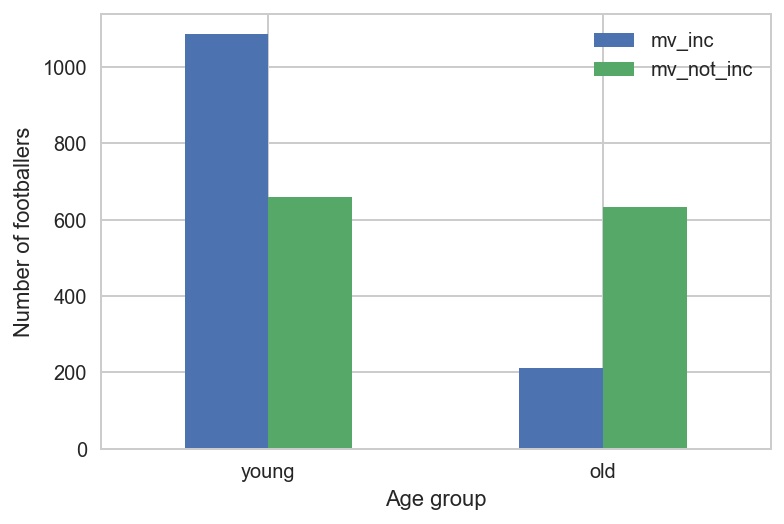

In [240]:
# Code to visualise the data to be used in a Contingency Table

plt.figure(figsize=(8,5))
age_mv_summary = age_mv_summary.sort_index(ascending=False)
ax = age_mv_summary.plot(kind='bar')
plt.xticks(rotation=0)
ax.set(ylabel='Number of footballers', xlabel='Age group')

In [241]:
# Code to extract the values from the DataFrame to be used in a Contingency Table in order to be used in a Chi Test

old_inc = int(df[(df['age_group'] == 'old')]['mv_inc'].sum())
young_inc = int(df[(df['age_group'] == 'young')]['mv_inc'].sum())
old_no_inc = int(df[(df['age_group'] == 'old')]['mv_not_inc'].sum())
young_no_inc = int(df[(df['age_group'] == 'young')]['mv_not_inc'].sum())

In [242]:
# Print contingency table
table = np.matrix([[old_inc,old_no_inc],[young_inc,young_no_inc]])
print(table)
table.shape

[[ 211  634]
 [1085  660]]


(2, 2)

In [243]:
g, p, dof, expctd = stats.chi2_contingency(table)
print('Chi = {}, p = {}'.format(g,p))
print(p < 0.05)

Chi = 313.772434259, p = 3.29185755203e-70
True


**Null hypothesis**: That player market values generally increase after the age of 28

Since the p-value from the Chi test is less than 0.05, I am able to reject the Null Hypothesis and we can reject the notion that "player market values increase after the age of 28".

## Create modified dataframe for Bokeh viz

In [251]:
df.columns

Index([                          u'pid',                      u'main_pos',
                            u'position',                           u'age',
                                u'foot',                     u'teamsince',
                         u'transferfee',                     u'marketval',
                       u'prevmarketval',                          u'year',
       ...
            u'marketval_inc_prediction',                u'marketval_move',
                     u'move_prediction',                   u'age_strings',
       u'marketval_move_new_prediction',                     u'age_group',
                              u'mv_inc',                        u'mv_dec',
                                u'mv_0',                    u'mv_not_inc'],
      dtype='object', length=112)

In [258]:
df_small = df[['marketval','predicted_mv','country','pid','name','age']]
df_small.to_csv("small_test.csv", encoding="utf-8", index = False)

In [261]:
df_small = pd.merge(df_small,master_data[['pid','name']], how = "left", on = 'pid')

In [262]:
df_small.to_csv("small_test.csv", encoding="utf-8", index = False)